***
# Model Deployment : Detecting and Analyzing Machine Learning Model Drift Using Open-Source Monitoring Tools

***
### [**John Pauline Pineda**](https://github.com/JohnPaulinePineda) <br> <br> *October 25, 2025*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Splitting](#1.4.1)
        * [1.4.2 Outlier and Distributional Shape Analysis](#1.4.2)
        * [1.4.3 Collinearity](#1.4.3)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Premodelling Data Preparation](#1.6)
        * [1.6.1 Preprocessed Data Description](#1.6.1)
        * [1.6.2 Preprocessing Pipeline Development](#1.6.2)
    * [1.7 Model Development and Validation](#1.7)
        * [1.7.1 Random Forest](#1.7.1)
        * [1.7.2 AdaBoost](#1.7.2)
        * [1.7.3 Gradient Boosting](#1.7.3)
        * [1.7.4 XGBoost](#1.7.4)
        * [1.7.5 Light GBM](#1.7.5)
        * [1.7.6 CatBoost](#1.7.6)
    * [1.8 Model Selection](#1.8)
    * [1.9 Model Monitoring using the NannyML Framework](#1.9)
        * [1.9.1 Baseline Control](#1.9.1)
        * [1.9.2 Simulated Covariate Drift](#1.9.2)
        * [1.9.3 Simulated Prior Shift](#1.9.3)
        * [1.9.4 Simulated Concept Drift](#1.9.4)
        * [1.9.5 Simulated Missingness Spike](#1.9.5)
        * [1.9.6 Simulated Seasonal Pattern](#1.9.6)
    * [1.10 Consolidated Findings](#1.10)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project investigates **open-source frameworks for post-deployment model monitoring and performance estimation**, with a particular focus on **NannyML** or detecting and interpreting shifts in machine learning pipelines using <mark style="background-color: #CCECFF"><b>Python</b></mark>. The objective was to systematically analyze how different types of drift and distribution changes manifest after model deployment, and to demonstrate how robust monitoring mitigates risks of performance degradation and biased decision-making. The workflow began with the development and selection of a baseline predictive model, which serves as a reference for stability. The dataset was then deliberately perturbed to simulate a range of realistic post-deployment scenarios: **Covariate Drift** (shifts in feature distributions), **Prior Shift** (changes in target label proportions), **Concept Drift** (evolving relationships between features and outcomes), **Missingness Spikes** (abrupt increases in absent data), and **Seasonal Patterns** (periodic variations in distributions). NannyML’s statistical tests, visualization capabilities, and performance estimation methods were subsequently applied to diagnose these shifts, evaluate their potential impact, and provide interpretable insights into model reliability. By contrasting baseline and perturbed conditions, the experiment demonstrated how continuous monitoring augments traditional offline evaluation, offering a safeguard against hidden risks. The findings highlighted how tools like NannyML can integrate seamlessly into MLOps workflows to enable proactive governance, early warning systems, and sustainable deployment practices. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document.

[Post-Deployment Monitoring](https://www.nannyml.com/) refers to the continuous oversight of machine learning models once they are integrated into production systems. Unlike offline evaluation, which relies on static validation datasets, monitoring addresses the challenges of evolving real-world data streams where underlying distributions may shift. Effective monitoring ensures that models remain accurate, unbiased, and aligned with business objectives. In MLOps, monitoring encompasses data integrity checks, drift detection, performance estimation, and alerting mechanisms. NannyML operationalizes this concept by focusing on performance estimation without ground truth, and by offering statistical methods to detect when data or predictions deviate from expected baselines. The challenges of post-deployment monitoring include delayed or missing ground truth labels, non-stationary data, hidden feedback loops, and difficulties distinguishing natural fluctuations from problematic drifts. Common solutions involve deploying drift detection algorithms, conducting regular audits of data pipelines, simulating counterfactuals, and retraining models on updated data. Monitoring frameworks must balance sensitivity (detecting real problems quickly) with robustness (avoiding false alarms caused by natural noise). Another key challenge is explainability: stakeholders need interpretable signals that justify interventions such as retraining or rolling back models. Tools like NannyML address these challenges through statistical tests for data drift, performance estimation without labels, missingness tracking, and visual diagnostics, making monitoring actionable for data scientists and business teams alike.

[Covariate Drift](https://www.nannyml.com/) occurs when the distribution of input features changes over time compared to the data used to train the model. Also known as data drift, it does not necessarily imply that the model’s predictive mapping is invalid, but it often precedes performance degradation. Detecting covariate drift requires comparing feature distributions between baseline (reference) data and incoming production data. NannyML provides multiple statistical tests and visualization tools to flag significant changes. Key signatures of covariate drift include shifts in summary statistics (mean, variance), changes in distributional shape, or increased divergence between reference and production feature distributions. These shifts may lead to poor generalization, as the model has not been exposed to the altered feature ranges. Detection techniques include univariate statistical tests (e.g., Kolmogorov–Smirnov, Chi-square), multivariate distance measures (e.g., Jensen–Shannon divergence, Population Stability Index), and density estimation methods. Remediation approaches involve domain adaptation, re-weighting training samples, or retraining models on updated data distributions. NannyML implements univariate and multivariate tests, provides drift magnitude quantification, and visualizes feature-level changes, allowing practitioners to pinpoint which features are most responsible for the detected drift.

[Prior Shift](https://www.nannyml.com/) arises when the distribution of the target variable changes, while the conditional relationship between features and labels remains stable. This is also referred to as label shift. Models trained on the original distribution may underperform because their predictions no longer match the new class priors. Detecting prior shifts is crucial, especially in imbalanced classification tasks where small changes in priors can lead to large performance impacts. Prior shift is typically characterized by systematic increases or decreases in class frequencies without corresponding changes in feature distributions. Its impact includes skewed decision thresholds, inflated false positives/negatives, and degraded calibration of predicted probabilities. Detection approaches include monitoring predicted class proportions, estimating priors using EM-based algorithms, and re-weighting predictions to align with new distributions. Correction strategies may involve resampling, threshold adjustment, or cost-sensitive learning. NannyML assists by tracking predicted probability distributions and comparing them against reference priors, using techniques such as KL divergence and PSI to quantify the magnitude of shift.

[Concept Drift](https://www.nannyml.com/) occurs when the underlying relationship between input features and target labels evolves over time. Unlike covariate drift, where features change independently, concept drift implies that the model’s mapping function itself becomes outdated. Concept drift is among the most damaging forms of drift because it directly undermines predictive accuracy. Detecting it often requires monitoring model outputs or inferred performance over time. NannyML addresses this by estimating performance even when ground truth labels are unavailable. Concept drift is typically signaled by a gradual or sudden decline in performance metrics, inconsistent error patterns, or misalignment between expected and actual prediction behavior. Its impact is severe: models may lose predictive power entirely if they cannot adapt. Detection methods include window-based performance monitoring, hypothesis testing, adaptive ensembles, and statistical monitoring of residuals. Corrective actions include periodic retraining, incremental learning, and online adaptation strategies. NannyML leverages Confidence-Based Performance Estimation (CBPE) and other statistical techniques to estimate performance degradation without labels, making it possible to detect concept drift in real-time production environments.

[Missingness Spike](https://www.nannyml.com/) refers to sudden increases in missing values within production data. Missing features can destabilize preprocessing pipelines, distort predictions, and signal upstream data collection failures. Monitoring missingness is critical for ensuring both model reliability and data pipeline health. NannyML provides built-in mechanisms to track and visualize changes in missing data patterns, alerting stakeholders before downstream impacts occur. Key indicators of missingness spikes include abrupt rises in null counts, missing categorical levels, or structural breaks in feature completeness. The consequences range from biased predictions to outright system failures if preprocessing pipelines cannot handle unexpected missingness. Detection methods include statistical monitoring of missing value proportions, anomaly detection on completeness metrics, and threshold-based alerts. Solutions typically involve robust imputation, pipeline hardening, and upstream data validation. NannyML offers automated missingness detection, completeness trend visualization, and configurable thresholds, ensuring that missingness issues are surfaced early.

[Seasonal Pattern Shift](https://www.nannyml.com/) represents periodic fluctuations in data distributions or outcomes that follow predictable cycles. If models are not trained with sufficient historical data to capture these patterns, their predictions may systematically underperform during certain periods. NannyML’s monitoring can reveal recurring deviations, helping teams distinguish between natural seasonality and genuine drift that requires retraining. Seasonality is often characterized by cyclic patterns in data features, prediction distributions, or performance metrics. Its impact includes systematic biases, recurring error peaks, and difficulty distinguishing drift from natural variability. Detection techniques include autocorrelation analysis, Fourier decomposition, and seasonal-trend decomposition. Mitigation strategies involve training with longer historical datasets, adding time-related features, or developing seasonally adaptive models. NannyML highlights recurring deviations in drift metrics, making it easier for practitioners to separate cyclical behavior from true degradation, ensuring that alerts are contextually relevant.

[Performance Estimation Without Labels](https://www.nannyml.com/) refers to scenarios in real-world deployments where the ground truth often arrives with delays—or may never be available. This makes direct performance tracking difficult. NannyML addresses this challenge by providing algorithms to estimate model performance without labels using confidence distributions, statistical inference, and robust estimation techniques. This capability allows practitioners to maintain visibility into model health continuously, even in label-scarce settings, bridging a critical gap in MLOps monitoring practices. Algorithms in this domain include Confidence-Based Performance Estimation (CBPE), which infers performance by comparing predicted probability distributions against expected confidence intervals, and Direct Loss Estimation, which approximates error rates based on calibration. Statistical inference techniques allow practitioners to construct confidence bounds around estimated metrics, while robust estimation mitigates the risk of spurious signals caused by small sample sizes or noisy predictions. NannyML provides implementations of CBPE and DLE, supporting metrics such as precision, recall, F1-score, and AUROC, all estimated without labels. This makes it possible to detect when a model is underperforming even before labels are collected, reducing blind spots in production monitoring.

[Performance Estimation With Labels](https://www.nannyml.com/) refers to the direct evaluation of model predictions against actual ground truth outcomes once labels are available. Unlike label-free methods, this approach allows for precise calculation of traditional performance metrics such as accuracy, precision, recall, F1-score, AUROC, and calibration error. Monitoring with labels provides the most reliable indication of model performance, enabling fine-grained diagnosis of errors and biases. The advantage of having labels is the ability to attribute errors to specific subgroups, detect fairness violations, and conduct targeted retraining. Challenges include label delay, annotation quality, and ensuring that labels accurately reflect the operational environment. Common approaches include sliding window evaluation, where performance is tracked over recent data batches, and benchmark comparison, where production metrics are compared to baseline test set results. NannyML incorporates labeled performance tracking alongside its label-free estimators, allowing users to validate estimates once ground truth becomes available. This dual capability ensures consistency, improves confidence in label-free methods, and provides a comprehensive framework for performance monitoring in both short-term and long-term horizons.

## 1.1. Data Background <a class="anchor" id="1.1"></a>

An open [Breast Cancer Dataset](https://www.kaggle.com/datasets/wasiqaliyasir/breast-cancer-dataset) from [Kaggle](https://www.kaggle.com/) (with all credits attributed to [Wasiq Ali](https://www.kaggle.com/wasiqaliyasir)) was used for the analysis as consolidated from the following primary sources: 
1. Reference Repository entitled **Differentiated breast Cancer Recurrence** from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/915/differentiated+breast+cancer+recurrence)
2. Research Paper entitled **Nuclear Feature Extraction for Breast Tumor Diagnosis** from the [Electronic Imaging](https://www.spiedigitallibrary.org/conference-proceedings-of-spie/1905/1/Nuclear-feature-extraction-for-breast-tumor-diagnosis/10.1117/12.148698.short)

This study hypothesized that the cell nuclei features derived from digitized images of fine needle aspirates (FNA) of breast masses influence breast cancer diagnoses between patients.

The dichotomous categorical variable for the study is:
* <span style="color: #FF0000">diagnosis</span> - Status of the patient (M, Medical diagnosis of a cancerous breast tumor | B, Medical diagnosis of a non-cancerous breast tumor)

The predictor variables for the study are:
* <span style="color: #FF0000">radius_mean</span> - Mean of the radius measurements (Mean of distances from center to points on the perimeter)
* <span style="color: #FF0000">texture_mean</span> - Mean of the texture measurements (Standard deviation of grayscale values)
* <span style="color: #FF0000">perimeter_mean</span> - Mean of the perimeter measurements
* <span style="color: #FF0000">area_mean</span> - Mean of the area measurements
* <span style="color: #FF0000">smoothness_mean</span> - Mean of the smoothness measurements (Local variation in radius lengths)
* <span style="color: #FF0000">compactness_mean</span> - Mean of the compactness measurements (Perimeter² / area - 1.0)
* <span style="color: #FF0000">concavity_mean</span> - Mean of the concavity measurements (Severity of concave portions of the contour)
* <span style="color: #FF0000">concave points_mean</span> - Mean of the concave points measurements (Number of concave portions of the contour)
* <span style="color: #FF0000">symmetry_mean</span> - Mean of the symmetry measurements
* <span style="color: #FF0000">fractal_dimension_mean</span> - Mean of the fractal dimension measurements (Coastline approximation - 1)
* <span style="color: #FF0000">radius_se</span> - Standard error of the radius measurements (Standard error of distances from center to points on the perimeter)
* <span style="color: #FF0000">texture_se</span> - Standard error of the texture measurements (Standard deviation of grayscale values)
* <span style="color: #FF0000">perimeter_se</span> - Standard error of the perimeter measurements
* <span style="color: #FF0000">area_se</span> - Standard error of the area measurements
* <span style="color: #FF0000">smoothness_se</span> - Standard error of the smoothness measurements (Local variation in radius lengths)
* <span style="color: #FF0000">compactness_se</span> - Standard error of the compactness measurements (Perimeter² / area - 1.0)
* <span style="color: #FF0000">concavity_se</span> - Standard error of the concavity measurements (Severity of concave portions of the contour)
* <span style="color: #FF0000">concave points_se</span> - Standard error of the concave points measurements (Number of concave portions of the contour)
* <span style="color: #FF0000">symmetry_se</span> - Standard error of the symmetry measurements
* <span style="color: #FF0000">fractal_dimension_se</span> - Standard error of the fractal dimension measurements (Coastline approximation - 1)
* <span style="color: #FF0000">radius_worst</span> - Largest value of the radius measurements (Largest value of distances from center to points on the perimeter)
* <span style="color: #FF0000">texture_worst</span> - Largest value of the texture measurements (Standard deviation of grayscale values)
* <span style="color: #FF0000">perimeter_worst</span> - Largest value of the perimeter measurements
* <span style="color: #FF0000">area_worst</span> - Largest value of the area measurements
* <span style="color: #FF0000">smoothness_worst</span> - Largest value of the smoothness measurements (Local variation in radius lengths)
* <span style="color: #FF0000">compactness_worst</span> - Largest value of the compactness measurements (Perimeter² / area - 1.0)
* <span style="color: #FF0000">concavity_worst</span> - Largest value of the concavity measurements (Severity of concave portions of the contour)
* <span style="color: #FF0000">concave points_worst</span> - Largest value of the concave points measurements (Number of concave portions of the contour)
* <span style="color: #FF0000">symmetry_worst</span> - Largest value of the symmetry measurements
* <span style="color: #FF0000">fractal_dimension_worst</span> - Largest value of the fractal dimension measurements (Coastline approximation - 1)

## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The initial tabular dataset was comprised of 569 observations and 32 variables (including 1 metadata, 1 target and 30 predictors).
    * **569 rows** (observations)
    * **32 columns** (variables)
        * **1/32 metadata** (categorical)
             * <span style="color: #FF0000">id</span>
        * **1/32 target** (categorical)
             * <span style="color: #FF0000">diagnosis</span>
        * **30/32 predictor** (numeric)
             * <span style="color: #FF0000">radius_mean</span>
             * <span style="color: #FF0000">texture_mean</span>
             * <span style="color: #FF0000">perimeter_mean</span>
             * <span style="color: #FF0000">area_mean</span>
             * <span style="color: #FF0000">smoothness_mean</span>
             * <span style="color: #FF0000">compactness_mean</span>
             * <span style="color: #FF0000">concavity_mean</span>
             * <span style="color: #FF0000">concave points_mean</span>
             * <span style="color: #FF0000">symmetry_mean</span>
             * <span style="color: #FF0000">fractal_dimension_mean</span>
             * <span style="color: #FF0000">radius_se</span>
             * <span style="color: #FF0000">texture_se</span>
             * <span style="color: #FF0000">perimeter_se</span>
             * <span style="color: #FF0000">area_se</span>
             * <span style="color: #FF0000">smoothness_se</span>
             * <span style="color: #FF0000">compactness_se</span>
             * <span style="color: #FF0000">concavity_se</span>
             * <span style="color: #FF0000">concave points_se</span>
             * <span style="color: #FF0000">symmetry_se</span>
             * <span style="color: #FF0000">fractal_dimension_se</span>
             * <span style="color: #FF0000">radius_worst</span>
             * <span style="color: #FF0000">texture_worst</span>
             * <span style="color: #FF0000">perimeter_worst</span>
             * <span style="color: #FF0000">area_worst</span>
             * <span style="color: #FF0000">smoothness_worst</span>
             * <span style="color: #FF0000">compactness_worst</span>
             * <span style="color: #FF0000">concavity_worst</span>
             * <span style="color: #FF0000">concave points_worst</span>
             * <span style="color: #FF0000">symmetry_worst</span>
             * <span style="color: #FF0000">fractal_dimension_worst</span>
2. The <span style="color: #FF0000">id</span> variable was transformed to a row index for the data observations.               

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib
import re
import pickle
%matplotlib inline

import nannyml as nml

import hashlib
import json
from urllib.parse import urlparse
import logging

from operator import truediv
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import pointbiserialr, chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, ParameterGrid, StratifiedShuffleSplit, RepeatedStratifiedKFold, GridSearchCV
from sklearn.utils import resample
from sklearn.base import clone

import warnings
warnings.filterwarnings("ignore", message=".*force_all_finite.*")
warnings.filterwarnings("ignore", message="X does not have valid feature names")


In [2]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"
DATASETS_FINAL_PATH = r"datasets\final\complete"
DATASETS_FINAL_TRAIN_PATH = r"datasets\final\train"
DATASETS_FINAL_TRAIN_FEATURES_PATH = r"datasets\final\train\features"
DATASETS_FINAL_TRAIN_TARGET_PATH = r"datasets\final\train\target"
DATASETS_FINAL_VALIDATION_PATH = r"datasets\final\validation"
DATASETS_FINAL_VALIDATION_FEATURES_PATH = r"datasets\final\validation\features"
DATASETS_FINAL_VALIDATION_TARGET_PATH = r"datasets\final\validation\target"
DATASETS_FINAL_TEST_PATH = r"datasets\final\test"
DATASETS_FINAL_TEST_FEATURES_PATH = r"datasets\final\test\features"
DATASETS_FINAL_TEST_TARGET_PATH = r"datasets\final\test\target"
DATASETS_PREPROCESSED_PATH = r"datasets\preprocessed"
DATASETS_PREPROCESSED_TRAIN_PATH = r"datasets\preprocessed\train"
DATASETS_PREPROCESSED_TRAIN_FEATURES_PATH = r"datasets\preprocessed\train\features"
DATASETS_PREPROCESSED_TRAIN_TARGET_PATH = r"datasets\preprocessed\train\target"
DATASETS_PREPROCESSED_VALIDATION_PATH = r"datasets\preprocessed\validation"
DATASETS_PREPROCESSED_VALIDATION_FEATURES_PATH = r"datasets\preprocessed\validation\features"
DATASETS_PREPROCESSED_VALIDATION_TARGET_PATH = r"datasets\preprocessed\validation\target"
DATASETS_PREPROCESSED_TEST_PATH = r"datasets\preprocessed\test"
DATASETS_PREPROCESSED_TEST_FEATURES_PATH = r"datasets\preprocessed\test\features"
DATASETS_PREPROCESSED_TEST_TARGET_PATH = r"datasets\preprocessed\test\target"
MODELS_PATH = r"models"

In [3]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
breast_cancer = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "Breast_Cancer_Dataset.csv"))

In [4]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(breast_cancer.shape)

Dataset Dimensions: 


(569, 32)

In [5]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(breast_cancer.dtypes)

Column Names and Data Types:


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
##################################
# Setting the ID column as row names
##################################
breast_cancer = breast_cancer.set_index("id")

In [7]:
##################################
# Taking a snapshot of the dataset
##################################
breast_cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...         25.38   
842517                0.07017         0.1812  ...         24.99   
84300903              0.12790         0.2069  ...         23.57   
84348301              0.10520         0.2597  ...         14.91   
84358402              0.10430         0.1809  ...         22.54   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          symmetry_worst  fractal_dimension_worst  
id                                                 
842302            0.4601                  0.11890  
842517            0.2750                  0.08902  
84300903          0.3613                  0.08758  
84348301          0.6638                  0.17300  
84358402          0.2364                  0.07678  

[5 rows x 31 columns]

In [8]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(breast_cancer.describe(include='number').transpose())

Numeric Variable Summary:


count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. No duplicated rows were noted.
2. No missing data noted for any variable with Null.Count>0 and Fill.Rate<1.0.
3. No low variance observed for any variable with First.Second.Mode.Ratio>5.
4. No low variance observed for any variable with Unique.Count.Ratio>10.
5. High skewness observed for 5 variables with Skewness>3 or Skewness<(-3).
    * <span style="color: #FF0000">area_se</span>: Skewness = 5.447
    * <span style="color: #FF0000">concavity_se</span>: Skewness = 5.110
    * <span style="color: #FF0000">fractal_dimension_se</span>: Skewness = 3.923
    * <span style="color: #FF0000">perimeter_se</span>: Skewness = 3.443
    * <span style="color: #FF0000">radius_se</span>: Skewness = 3.088

In [9]:
##################################
# Counting the number of duplicated rows
##################################
breast_cancer.duplicated().sum()

np.int64(0)

In [10]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(breast_cancer.dtypes)

In [11]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(breast_cancer.columns)

In [12]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(breast_cancer)] * len(breast_cancer.columns))

In [13]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(breast_cancer.isna().sum(axis=0))

In [14]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(breast_cancer.count())

In [15]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [16]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

Column.Name Column.Type  Row.Count  Non.Null.Count  \
0                 diagnosis      object        569             569   
1               radius_mean     float64        569             569   
2              texture_mean     float64        569             569   
3            perimeter_mean     float64        569             569   
4                 area_mean     float64        569             569   
5           smoothness_mean     float64        569             569   
6          compactness_mean     float64        569             569   
7            concavity_mean     float64        569             569   
8       concave points_mean     float64        569             569   
9             symmetry_mean     float64        569             569   
10   fractal_dimension_mean     float64        569             569   
11                radius_se     float64        569             569   
12               texture_se     float64        569             569   
13             perimeter_se     float64        569             569   
14                  area_se     float64        569             569   
15            smoothness_se     float64        569             569   
16           compactness_se     float64        569             569   
17             concavity_se     float64        569             569   
18        concave points_se     float64        569             569   
19              symmetry_se     float64        569             569   
20     fractal_dimension_se     float64        569             569   
21             radius_worst     float64        569             569   
22            texture_worst     float64        569             569   
23          perimeter_worst     float64        569             569   
24               area_worst     float64        569             569   
25         smoothness_worst     float64        569             569   
26        compactness_worst     float64        569             569   
27          concavity_worst     float64        569             569   
28     concave points_worst     float64        569             569   
29           symmetry_worst     float64        569             569   
30  fractal_dimension_worst     float64        569             569   

    Null.Count  Fill.Rate  
0            0        1.0  
1            0        1.0  
2            0        1.0  
3            0        1.0  
4            0        1.0  
5            0        1.0  
6            0        1.0  
7            0        1.0  
8            0        1.0  
9            0        1.0  
10           0        1.0  
11           0        1.0  
12           0        1.0  
13           0        1.0  
14           0        1.0  
15           0        1.0  
16           0        1.0  
17           0        1.0  
18           0        1.0  
19           0        1.0  
20           0        1.0  
21           0        1.0  
22           0        1.0  
23           0        1.0  
24           0        1.0  
25           0        1.0  
26           0        1.0  
27           0        1.0  
28           0        1.0  
29           0        1.0  
30           0        1.0

In [17]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])

0

In [18]:
##################################
# Identifying the rows
# with Fill.Rate < 0.90
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<0.90)]

In [19]:
##################################
# Gathering the indices for each observation
##################################
row_index_list = breast_cancer.index

In [20]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(breast_cancer.columns)] * len(breast_cancer))

In [21]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(breast_cancer.isna().sum(axis=1))

In [22]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [23]:
##################################
# Identifying the rows
# with missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_index_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)

Row.Name  Column.Count  Null.Count  Missing.Rate
0      842302            31           0           0.0
1      842517            31           0           0.0
2    84300903            31           0           0.0
3    84348301            31           0           0.0
4    84358402            31           0           0.0
..        ...           ...         ...           ...
564    926424            31           0           0.0
565    926682            31           0           0.0
566    926954            31           0           0.0
567    927241            31           0           0.0
568     92751            31           0           0.0

[569 rows x 4 columns]

In [24]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.00
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)])

0

In [25]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
breast_cancer_numeric = breast_cancer.select_dtypes(include='number')

In [26]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = breast_cancer_numeric.columns

In [27]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = breast_cancer_numeric.min()

In [28]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = breast_cancer_numeric.mean()

In [29]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = breast_cancer_numeric.median()

In [30]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = breast_cancer_numeric.max()

In [31]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [breast_cancer[x].value_counts(dropna=True).index.tolist()[0] for x in breast_cancer_numeric]

In [32]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [breast_cancer[x].value_counts(dropna=True).index.tolist()[1] for x in breast_cancer_numeric]


In [33]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [breast_cancer_numeric[x].isin([breast_cancer[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in breast_cancer_numeric]

In [34]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [breast_cancer_numeric[x].isin([breast_cancer[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in breast_cancer_numeric]


In [35]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [36]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = breast_cancer_numeric.nunique(dropna=True)

In [37]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(breast_cancer_numeric)] * len(breast_cancer_numeric.columns))


In [38]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [39]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = breast_cancer_numeric.skew()

In [40]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = breast_cancer_numeric.kurtosis()

In [41]:
##################################
# Generating a column quality summary for the numeric column
##################################
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)

Numeric.Column.Name     Minimum        Mean      Median     Maximum  \
0               radius_mean    6.981000   14.127292   13.370000    28.11000   
1              texture_mean    9.710000   19.289649   18.840000    39.28000   
2            perimeter_mean   43.790000   91.969033   86.240000   188.50000   
3                 area_mean  143.500000  654.889104  551.100000  2501.00000   
4           smoothness_mean    0.052630    0.096360    0.095870     0.16340   
5          compactness_mean    0.019380    0.104341    0.092630     0.34540   
6            concavity_mean    0.000000    0.088799    0.061540     0.42680   
7       concave points_mean    0.000000    0.048919    0.033500     0.20120   
8             symmetry_mean    0.106000    0.181162    0.179200     0.30400   
9    fractal_dimension_mean    0.049960    0.062798    0.061540     0.09744   
10                radius_se    0.111500    0.405172    0.324200     2.87300   
11               texture_se    0.360200    1.216853    1.108000     4.88500   
12             perimeter_se    0.757000    2.866059    2.287000    21.98000   
13                  area_se    6.802000   40.337079   24.530000   542.20000   
14            smoothness_se    0.001713    0.007041    0.006380     0.03113   
15           compactness_se    0.002252    0.025478    0.020450     0.13540   
16             concavity_se    0.000000    0.031894    0.025890     0.39600   
17        concave points_se    0.000000    0.011796    0.010930     0.05279   
18              symmetry_se    0.007882    0.020542    0.018730     0.07895   
19     fractal_dimension_se    0.000895    0.003795    0.003187     0.02984   
20             radius_worst    7.930000   16.269190   14.970000    36.04000   
21            texture_worst   12.020000   25.677223   25.410000    49.54000   
22          perimeter_worst   50.410000  107.261213   97.660000   251.20000   
23               area_worst  185.200000  880.583128  686.500000  4254.00000   
24         smoothness_worst    0.071170    0.132369    0.131300     0.22260   
25        compactness_worst    0.027290    0.254265    0.211900     1.05800   
26          concavity_worst    0.000000    0.272188    0.226700     1.25200   
27     concave points_worst    0.000000    0.114606    0.099930     0.29100   
28           symmetry_worst    0.156500    0.290076    0.282200     0.66380   
29  fractal_dimension_worst    0.055040    0.083946    0.080040     0.20750   

    First.Mode  Second.Mode  First.Mode.Count  Second.Mode.Count  \
0    12.340000    11.060000                 4                  3   
1    16.840000    19.830000                 3                  3   
2    82.610000   134.700000                 3                  3   
3   512.200000   394.100000                 3                  2   
4     0.100700     0.105400                 5                  4   
5     0.114700     0.120600                 3                  3   
6     0.000000     0.120400                13                  3   
7     0.000000     0.028640                13                  3   
8     0.176900     0.189300                 4                  4   
9     0.067820     0.061130                 3                  3   
10    0.286000     0.220400                 3                  3   
11    0.856100     1.350000                 3                  3   
12    1.778000     1.143000                 4                  2   
13   16.970000    16.640000                 3                  3   
14    0.005910     0.006064                 2                  2   
15    0.018120     0.011040                 3                  3   
16    0.000000     0.021850                13                  2   
17    0.000000     0.011670                13                  3   
18    0.013440     0.020450                 4                  3   
19    0.002256     0.002205                 2                  2   
20   12.360000    13.500000                 5                  4   
21   17.700000    27.260000                 3                 

In [42]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>10)])

0

In [43]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [44]:
#################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

5

In [45]:
##################################
# Identifying the numerical columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))].sort_values(by=['Skewness'], ascending=False))

Numeric.Column.Name   Minimum       Mean     Median    Maximum  \
13               area_se  6.802000  40.337079  24.530000  542.20000   
16          concavity_se  0.000000   0.031894   0.025890    0.39600   
19  fractal_dimension_se  0.000895   0.003795   0.003187    0.02984   
12          perimeter_se  0.757000   2.866059   2.287000   21.98000   
10             radius_se  0.111500   0.405172   0.324200    2.87300   

    First.Mode  Second.Mode  First.Mode.Count  Second.Mode.Count  \
13   16.970000    16.640000                 3                  3   
16    0.000000     0.021850                13                  2   
19    0.002256     0.002205                 2                  2   
12    1.778000     1.143000                 4                  2   
10    0.286000     0.220400                 3                  3   

    First.Second.Mode.Ratio  Unique.Count  Row.Count  Unique.Count.Ratio  \
13                      1.0           528        569            0.927944   
16                      6.5           533        569            0.936731   
19                      1.0           545        569            0.957821   
12                      2.0           533        569            0.936731   
10                      1.0           540        569            0.949033   

    Skewness   Kurtosis  
13  5.447186  49.209077  
16  5.110463  48.861395  
19  3.923969  26.280847  
12  3.443615  21.401905  
10  3.088612  17.686726

In [46]:
##################################
# Formulating the dataset
# with categorical columns only
##################################
breast_cancer_categorical = breast_cancer.select_dtypes(include=['category','object'])

In [47]:
##################################
# Gathering the variable names for the categorical column
##################################
categorical_variable_name_list = breast_cancer_categorical.columns

In [48]:
##################################
# Gathering the first mode values for each categorical column
##################################
categorical_first_mode_list = [breast_cancer[x].value_counts().index.tolist()[0] for x in breast_cancer_categorical]


In [49]:
##################################
# Gathering the second mode values for each categorical column
##################################
categorical_second_mode_list = [breast_cancer[x].value_counts().index.tolist()[1] for x in breast_cancer_categorical]


In [50]:
##################################
# Gathering the count of first mode values for each categorical column
##################################
categorical_first_mode_count_list = [breast_cancer_categorical[x].isin([breast_cancer[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in breast_cancer_categorical]


In [51]:
##################################
# Gathering the count of second mode values for each categorical column
##################################
categorical_second_mode_count_list = [breast_cancer_categorical[x].isin([breast_cancer[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in breast_cancer_categorical]


In [52]:
##################################
# Gathering the first mode to second mode ratio for each categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)


In [53]:
##################################
# Gathering the count of unique values for each categorical column
##################################
categorical_unique_count_list = breast_cancer_categorical.nunique(dropna=True)

In [54]:
##################################
# Gathering the number of observations for each categorical column
##################################
categorical_row_count_list = list([len(breast_cancer_categorical)] * len(breast_cancer_categorical.columns))

In [55]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)

In [56]:
##################################
# Generating a column quality summary for the categorical columns
##################################
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                    categorical_first_mode_list,
                                                    categorical_second_mode_list,
                                                    categorical_first_mode_count_list,
                                                    categorical_second_mode_count_list,
                                                    categorical_first_second_mode_ratio_list,
                                                    categorical_unique_count_list,
                                                    categorical_row_count_list,
                                                    categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(categorical_column_quality_summary)

Categorical.Column.Name First.Mode Second.Mode  First.Mode.Count  \
0               diagnosis          B           M               357   

   Second.Mode.Count  First.Second.Mode.Ratio  Unique.Count  Row.Count  \
0                212                 1.683962             2        569   

   Unique.Count.Ratio  
0            0.003515

In [57]:
##################################
# Counting the number of categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [58]:
##################################
# Counting the number of categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>

### 1.4.1 Data Splitting<a class="anchor" id="1.4.1"></a>

1. The baseline dataset is comprised of:
   * **569 rows** (observations)
        * **357 diagnosis=B**: 62.74%
        * **212 diagnosis=M**: 37.26%
    * **31 columns** (variables)
        * **1/31 target** (categorical)
             * <span style="color: #FF0000">diagnosis</span>
        * **30/31 predictor** (numeric)
             * <span style="color: #FF0000">radius_mean</span>
             * <span style="color: #FF0000">texture_mean</span>
             * <span style="color: #FF0000">perimeter_mean</span>
             * <span style="color: #FF0000">area_mean</span>
             * <span style="color: #FF0000">smoothness_mean</span>
             * <span style="color: #FF0000">compactness_mean</span>
             * <span style="color: #FF0000">concavity_mean</span>
             * <span style="color: #FF0000">concave points_mean</span>
             * <span style="color: #FF0000">symmetry_mean</span>
             * <span style="color: #FF0000">fractal_dimension_mean</span>
             * <span style="color: #FF0000">radius_se</span>
             * <span style="color: #FF0000">texture_se</span>
             * <span style="color: #FF0000">perimeter_se</span>
             * <span style="color: #FF0000">area_se</span>
             * <span style="color: #FF0000">smoothness_se</span>
             * <span style="color: #FF0000">compactness_se</span>
             * <span style="color: #FF0000">concavity_se</span>
             * <span style="color: #FF0000">concave points_se</span>
             * <span style="color: #FF0000">symmetry_se</span>
             * <span style="color: #FF0000">fractal_dimension_se</span>
             * <span style="color: #FF0000">radius_worst</span>
             * <span style="color: #FF0000">texture_worst</span>
             * <span style="color: #FF0000">perimeter_worst</span>
             * <span style="color: #FF0000">area_worst</span>
             * <span style="color: #FF0000">smoothness_worst</span>
             * <span style="color: #FF0000">compactness_worst</span>
             * <span style="color: #FF0000">concavity_worst</span>
             * <span style="color: #FF0000">concave points_worst</span>
             * <span style="color: #FF0000">symmetry_worst</span>
             * <span style="color: #FF0000">fractal_dimension_worst</span>
2. The baseline dataset was divided into three subsets using a fixed random seed:
    * **test data**: 25% of the original data with class stratification applied
    * **train data (initial)**: 75% of the original data with class stratification applied
        * **train data (final)**: 75% of the **train (initial)** data with class stratification applied
        * **validation data**: 25% of the **train (initial)** data with class stratification applied
3. Models were developed from the **train data (final)**. Using the same dataset, a subset of models with optimal hyperparameters were selected, based on cross-validation.
4. Among candidate models with optimal hyperparameters, the final model was selected based on performance on the **validation data**. 
5. Performance of the selected final model (and other candidate models for post-model selection comparison) were evaluated using the **test data**. 
6. The **train data (final)** subset is comprised of:
    * **319 rows** (observations)
        * **200 diagnosis=B**: 62.69%
        * **119 diagnosis=M**: 37.30%
    * **31 columns** (variables)
7. The **validation data** subset is comprised of:
    * **107 rows** (observations)
        * **67 diagnosis=B**: 62.61%
        * **40 diagnosis=M**: 37.38%
    * **31 columns** (variables)
8. The **test data** subset is comprised of:
    * **143 rows** (observations)
        * **90 diagnosis=B**: 62.93%
        * **53 diagnosis=M**: 37.06%
    * **31 columns** (variables)

In [59]:
##################################
# Creating a dataset copy
# of the original data
##################################
breast_cancer_baseline = breast_cancer.copy()

In [60]:
##################################
# Performing a general exploration
# of the baseline dataset
##################################
print('Final Dataset Dimensions: ')
display(breast_cancer_baseline.shape)

Final Dataset Dimensions: 


(569, 31)

In [61]:
##################################
# Obtaining the distribution of
# of the target variable
##################################
print('Target Variable Breakdown: ')
breast_cancer_breakdown = breast_cancer_baseline.groupby('diagnosis', observed=True).size().reset_index(name='Count')
breast_cancer_breakdown['Percentage'] = (breast_cancer_breakdown['Count'] / len(breast_cancer_baseline)) * 100
display(breast_cancer_breakdown)

Target Variable Breakdown: 


diagnosis  Count  Percentage
0         B    357   62.741652
1         M    212   37.258348

In [62]:
##################################
# Formulating the train and test data
# from the final dataset
# by applying stratification and
# using a 75-25 ratio
##################################
breast_cancer_train_initial, breast_cancer_test = train_test_split(breast_cancer_baseline, 
                                                               test_size=0.25, 
                                                               stratify=breast_cancer_baseline['diagnosis'], 
                                                               random_state=987654321)

In [63]:
##################################
# Performing a general exploration
# of the initial training dataset
##################################
X_train_initial = breast_cancer_train_initial.drop('diagnosis', axis = 1)
y_train_initial = breast_cancer_train_initial['diagnosis']
print('Initial Train Dataset Dimensions: ')
display(X_train_initial.shape)
display(y_train_initial.shape)
print('Initial Train Target Variable Breakdown: ')
display(y_train_initial.value_counts())
print('Initial Train Target Variable Proportion: ')
display(y_train_initial.value_counts(normalize = True))

Initial Train Dataset Dimensions: 


(426, 30)

(426,)

Initial Train Target Variable Breakdown: 


diagnosis
B    267
M    159
Name: count, dtype: int64

Initial Train Target Variable Proportion: 


diagnosis
B    0.626761
M    0.373239
Name: proportion, dtype: float64

In [64]:
##################################
# Performing a general exploration
# of the test dataset
##################################
X_test = breast_cancer_test.drop('diagnosis', axis = 1)
y_test = breast_cancer_test['diagnosis']
print('Test Dataset Dimensions: ')
display(X_test.shape)
display(y_test.shape)
print('Test Target Variable Breakdown: ')
display(y_test.value_counts())
print('Test Target Variable Proportion: ')
display(y_test.value_counts(normalize = True))

Test Dataset Dimensions: 


(143, 30)

(143,)

Test Target Variable Breakdown: 


diagnosis
B    90
M    53
Name: count, dtype: int64

Test Target Variable Proportion: 


diagnosis
B    0.629371
M    0.370629
Name: proportion, dtype: float64

In [65]:
##################################
# Formulating the train and validation data
# from the train dataset
# by applying stratification and
# using a 75-25 ratio
##################################
breast_cancer_train, breast_cancer_validation = train_test_split(breast_cancer_train_initial, 
                                                             test_size=0.25, 
                                                             stratify=breast_cancer_train_initial['diagnosis'], 
                                                             random_state=987654321)

In [66]:
##################################
# Performing a general exploration
# of the final training dataset
##################################
X_train = breast_cancer_train.drop('diagnosis', axis = 1)
y_train = breast_cancer_train['diagnosis']
print('Final Train Dataset Dimensions: ')
display(X_train.shape)
display(y_train.shape)
print('Final Train Target Variable Breakdown: ')
display(y_train.value_counts())
print('Final Train Target Variable Proportion: ')
display(y_train.value_counts(normalize = True))

Final Train Dataset Dimensions: 


(319, 30)

(319,)

Final Train Target Variable Breakdown: 


diagnosis
B    200
M    119
Name: count, dtype: int64

Final Train Target Variable Proportion: 


diagnosis
B    0.626959
M    0.373041
Name: proportion, dtype: float64

In [67]:
##################################
# Performing a general exploration
# of the validation dataset
##################################
X_validation = breast_cancer_validation.drop('diagnosis', axis = 1)
y_validation = breast_cancer_validation['diagnosis']
print('Validation Dataset Dimensions: ')
display(X_validation.shape)
display(y_validation.shape)
print('Validation Target Variable Breakdown: ')
display(y_validation.value_counts())
print('Validation Target Variable Proportion: ')
display(y_validation.value_counts(normalize = True))

Validation Dataset Dimensions: 


(107, 30)

(107,)

Validation Target Variable Breakdown: 


diagnosis
B    67
M    40
Name: count, dtype: int64

Validation Target Variable Proportion: 


diagnosis
B    0.626168
M    0.373832
Name: proportion, dtype: float64

In [68]:
##################################
# Saving the training data
# to the DATASETS_FINAL_TRAIN_PATH
# and DATASETS_FINAL_TRAIN_FEATURES_PATH
# and DATASETS_FINAL_TRAIN_TARGET_PATH
##################################
breast_cancer_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_PATH, "breast_cancer_train.csv"), index=False)
X_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_FEATURES_PATH, "X_train.csv"), index=False)
y_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_TARGET_PATH, "y_train.csv"), index=False)

In [69]:
##################################
# Saving the validation data
# to the DATASETS_FINAL_VALIDATION_PATH
# and DATASETS_FINAL_VALIDATION_FEATURE_PATH
# and DATASETS_FINAL_VALIDATION_TARGET_PATH
##################################
breast_cancer_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_PATH, "breast_cancer_validation.csv"), index=False)
X_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_FEATURES_PATH, "X_validation.csv"), index=False)
y_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_TARGET_PATH, "y_validation.csv"), index=False)

In [70]:
##################################
# Saving the test data
# to the DATASETS_FINAL_TEST_PATH
# and DATASETS_FINAL_TEST_FEATURES_PATH
# and DATASETS_FINAL_TEST_TARGET_PATH
##################################
breast_cancer_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_PATH, "breast_cancer_test.csv"), index=False)
X_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_FEATURES_PATH, "X_test.csv"), index=False)
y_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_TARGET_PATH, "y_test.csv"), index=False)

### 1.4.2 Outlier and Distributional Shape Analysis<a class="anchor" id="1.4.2"></a>

Outlier and distributional shape analysis findings based on assessment of the training data are as follows:
1. High skewness observed for 5 variables with Skewness>3 or Skewness<(-3).
    * <span style="color: #FF0000">area_se</span>: Skewness = 6.562
    * <span style="color: #FF0000">concavity_se</span>: Skewness = 5.648
    * <span style="color: #FF0000">fractal_dimension_se</span>: Skewness = 4.280
    * <span style="color: #FF0000">perimeter_se</span>: Skewness = 4.136
    * <span style="color: #FF0000">radius_se</span>: Skewness = 3.775
2. Relatively high number of outliers observed for 7 numeric variables with Outlier.Ratio>0.05.
    * <span style="color: #FF0000">area_se</span>: Outlier.Ratio = 0.110
    * <span style="color: #FF0000">radius_se</span>: Outlier.Ratio = 0.075
    * <span style="color: #FF0000">perimeter_se</span>: Outlier.Ratio = 0.075
    * <span style="color: #FF0000">smoothness_se</span>: Outlier.Ratio = 0.059
    * <span style="color: #FF0000">compactness_se</span>: Outlier.Ratio = 0.059
    * <span style="color: #FF0000">fractal_dimension_se</span>: Outlier.Ratio = 0.056
    * <span style="color: #FF0000">symmetry_se</span>: Outlier.Ratio = 0.050

In [71]:
##################################
# Formulating the training dataset
# with numeric columns only
##################################
breast_cancer_train_numeric = breast_cancer_train.select_dtypes(include='number')

In [72]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = list(breast_cancer_train_numeric.columns)

In [73]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = breast_cancer_train_numeric.skew()

In [74]:
##################################
# Computing the interquartile range
# for all columns
##################################
breast_cancer_train_numeric_q1 = breast_cancer_train_numeric.quantile(0.25)
breast_cancer_train_numeric_q3 = breast_cancer_train_numeric.quantile(0.75)
breast_cancer_train_numeric_iqr = breast_cancer_train_numeric_q3 - breast_cancer_train_numeric_q1

In [75]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((breast_cancer_train_numeric < (breast_cancer_train_numeric_q1 - 1.5 * breast_cancer_train_numeric_iqr)) | (breast_cancer_train_numeric > (breast_cancer_train_numeric_q3 + 1.5 * breast_cancer_train_numeric_iqr))).sum()

In [76]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(breast_cancer_train_numeric)] * len(breast_cancer_train_numeric.columns))

In [77]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

In [78]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

Numeric.Column.Name  Skewness  Outlier.Count  Row.Count  Outlier.Ratio
0               radius_mean  0.966211              6        319       0.018809
1              texture_mean  0.746964              4        319       0.012539
2            perimeter_mean  1.034320              6        319       0.018809
3                 area_mean  1.819687              9        319       0.028213
4           smoothness_mean  0.166009              1        319       0.003135
5          compactness_mean  1.115958              6        319       0.018809
6            concavity_mean  1.412274             10        319       0.031348
7       concave points_mean  1.155582             11        319       0.034483
8             symmetry_mean  0.532891              7        319       0.021944
9    fractal_dimension_mean  1.054941              8        319       0.025078
10                radius_se  3.775498             24        319       0.075235
11               texture_se  1.464707             10        319       0.031348
12             perimeter_se  4.136225             24        319       0.075235
13                  area_se  6.562034             35        319       0.109718
14            smoothness_se  1.313172             19        319       0.059561
15           compactness_se  1.701432             19        319       0.059561
16             concavity_se  5.648674             14        319       0.043887
17        concave points_se  1.592173             14        319       0.043887
18              symmetry_se  2.442436             16        319       0.050157
19     fractal_dimension_se  4.280973             18        319       0.056426
20             radius_worst  1.016127              3        319       0.009404
21            texture_worst  0.476084              2        319       0.006270
22          perimeter_worst  1.075965              5        319       0.015674
23               area_worst  1.892646             13        319       0.040752
24         smoothness_worst  0.237077              0        319       0.000000
25        compactness_worst  1.098476              6        319       0.018809
26          concavity_worst  1.067913              5        319       0.015674
27     concave points_worst  0.436446              0        319       0.000000
28           symmetry_worst  1.154060             10        319       0.031348
29  fractal_dimension_worst  1.001579             10        319       0.031348

In [79]:
##################################
# Identifying the numerical columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
display(numeric_column_outlier_summary[(numeric_column_outlier_summary['Skewness']>3) | (numeric_column_outlier_summary['Skewness']<(-3))].sort_values(by=['Skewness'], ascending=False))

Numeric.Column.Name  Skewness  Outlier.Count  Row.Count  Outlier.Ratio
13               area_se  6.562034             35        319       0.109718
16          concavity_se  5.648674             14        319       0.043887
19  fractal_dimension_se  4.280973             18        319       0.056426
12          perimeter_se  4.136225             24        319       0.075235
10             radius_se  3.775498             24        319       0.075235

In [80]:
##################################
# Identifying the numerical columns
# with Outlier.Ratio > 0.05
##################################
display(numeric_column_outlier_summary[numeric_column_outlier_summary['Outlier.Ratio']>0.05].sort_values(by=['Outlier.Ratio'], ascending=False))

Numeric.Column.Name  Skewness  Outlier.Count  Row.Count  Outlier.Ratio
13               area_se  6.562034             35        319       0.109718
10             radius_se  3.775498             24        319       0.075235
12          perimeter_se  4.136225             24        319       0.075235
14         smoothness_se  1.313172             19        319       0.059561
15        compactness_se  1.701432             19        319       0.059561
19  fractal_dimension_se  4.280973             18        319       0.056426
18           symmetry_se  2.442436             16        319       0.050157

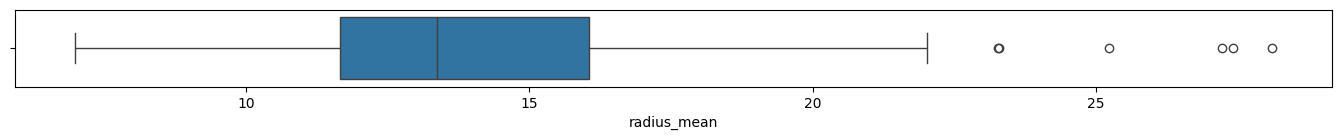

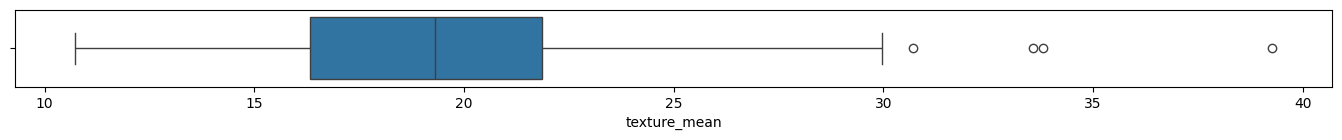

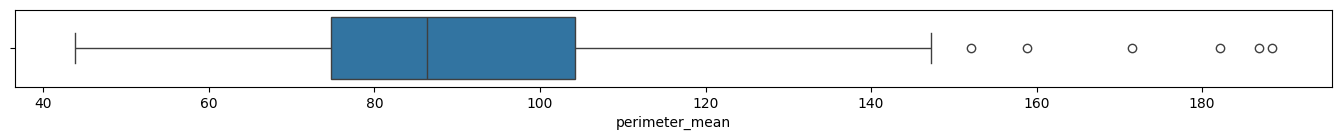

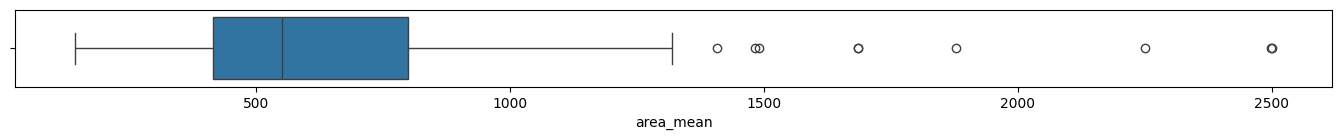

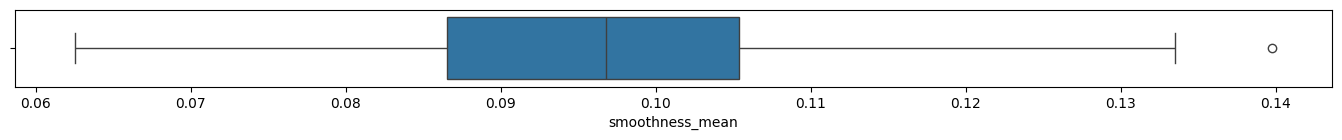

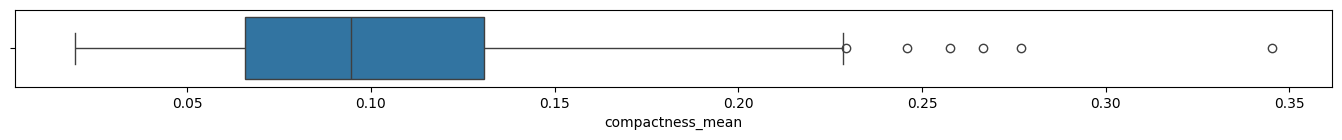

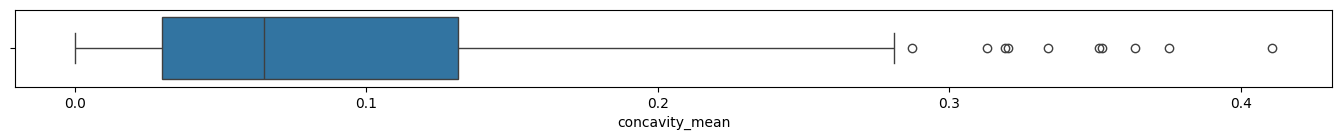

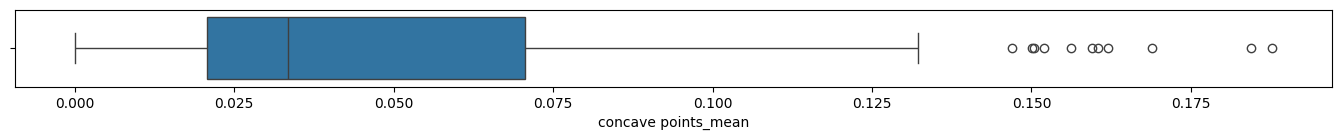

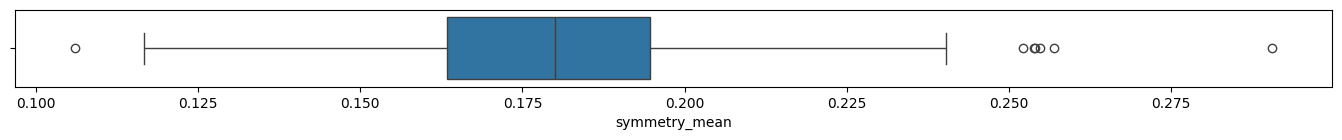

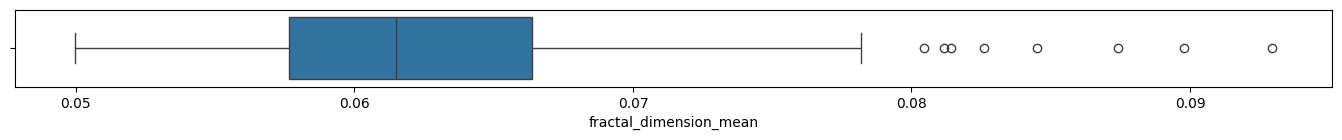

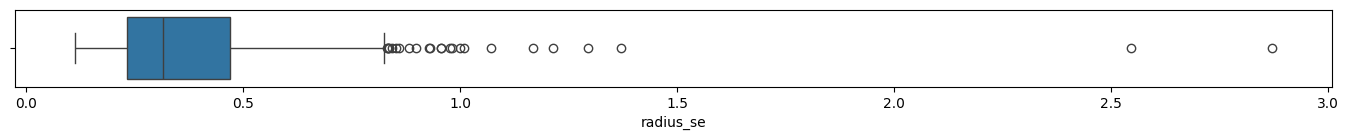

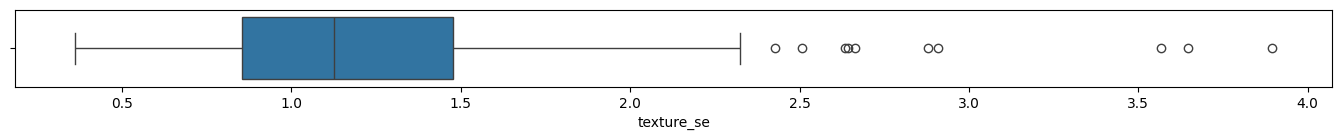

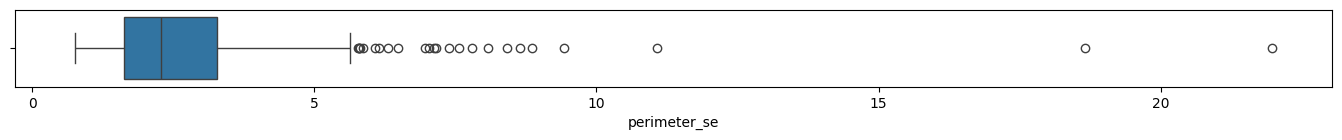

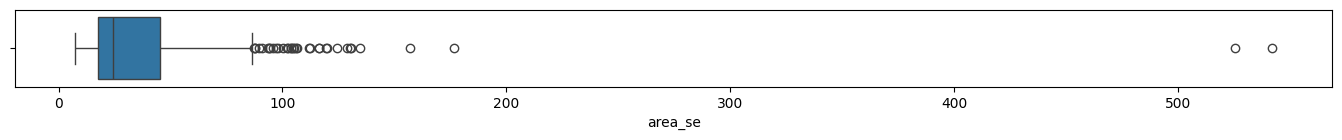

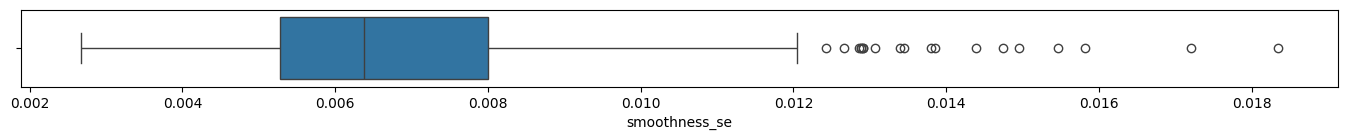

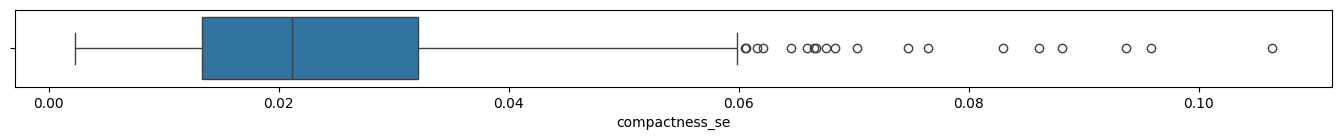

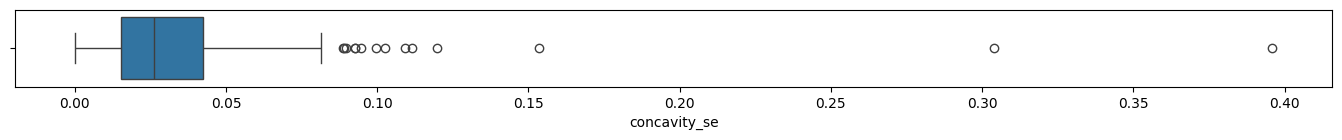

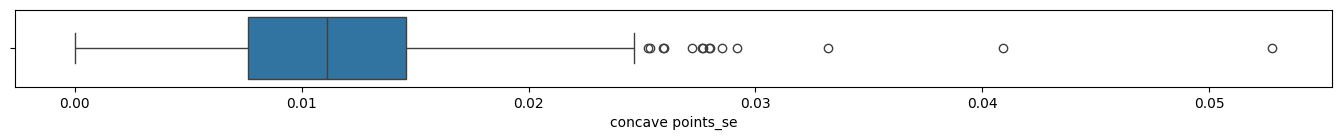

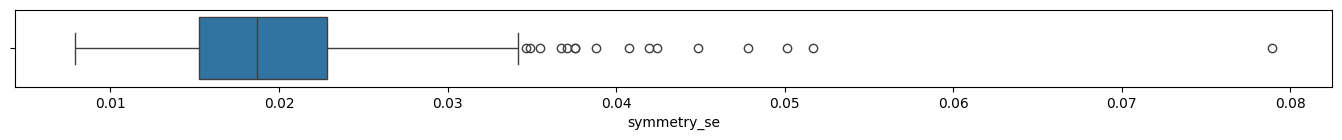

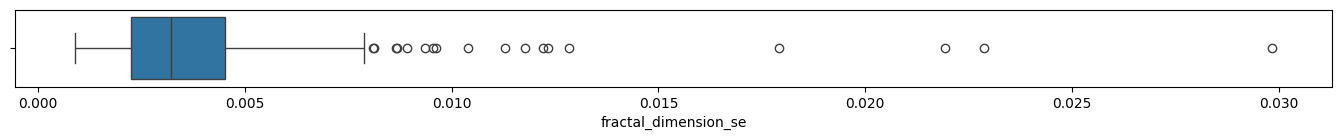

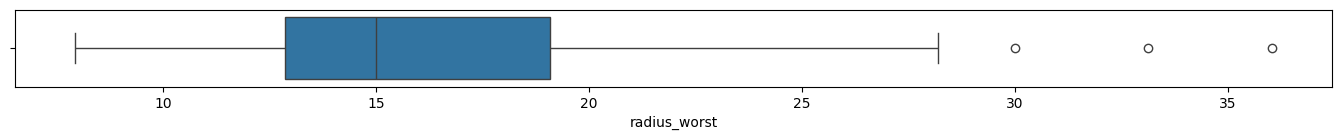

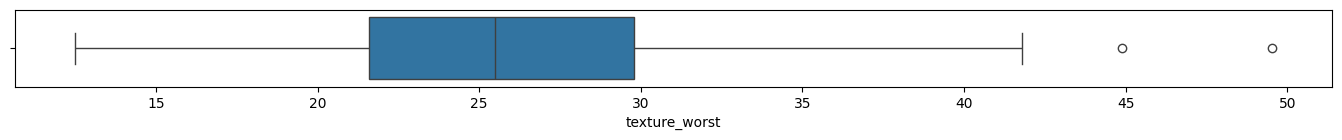

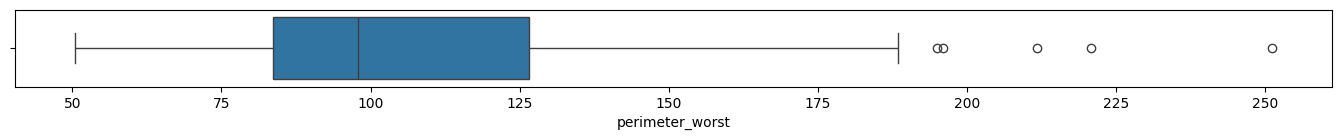

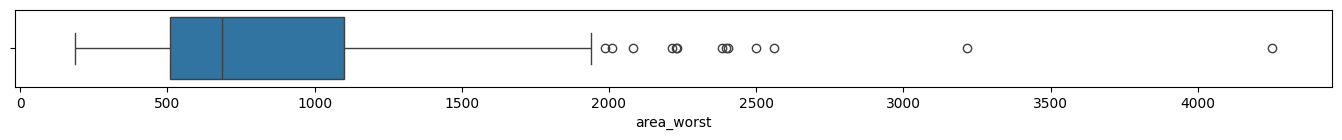

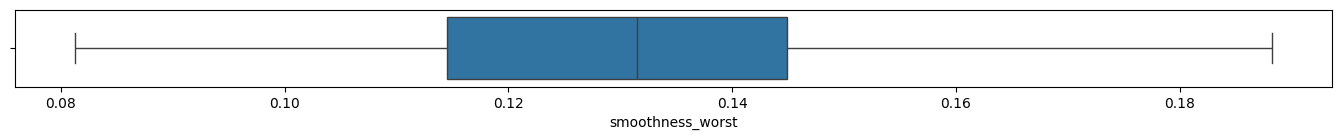

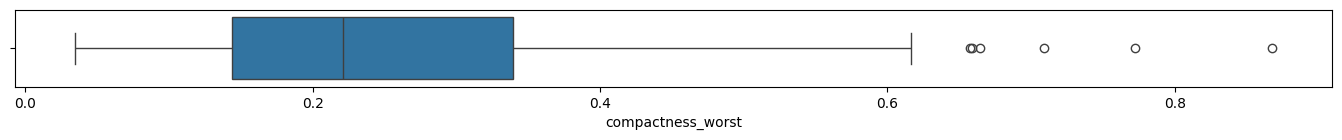

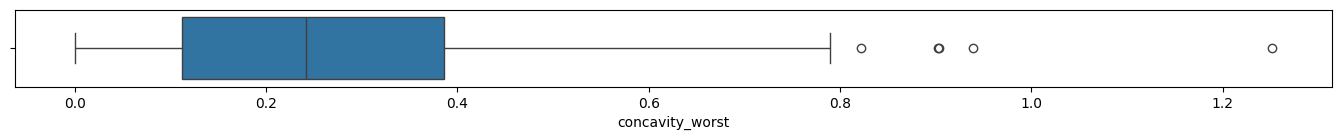

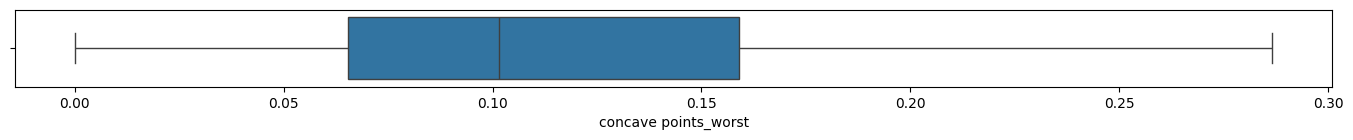

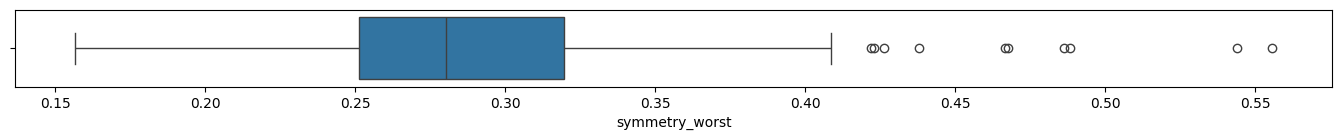

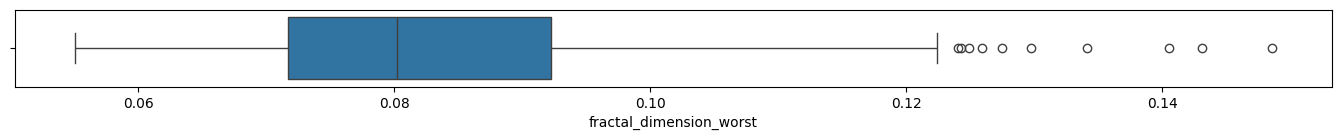

In [81]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in breast_cancer_train_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=breast_cancer_train_numeric, x=column)
        plt.show()
        plt.close()

### 1.4.3 Collinearity<a class="anchor" id="1.4.3"></a>

Collinearity evaluation findings based on assessment of the training data are as follows:
1. Predictors were predominantly positively correlated with 50% reporting correlation values ranging from 0.129 to 0.558.
2. High Pearson.Correlation values > 0.90 were noted for 4.60% (20/435) of the pairwise combinations of predictors:
    * <span style="color: #FF0000">radius_mean</span> and <span style="color: #FF0000">perimeter_mean</span>: Pearson.Correlation = 0.997
    * <span style="color: #FF0000">radius_worst</span> and <span style="color: #FF0000">perimeter_worst</span>: Pearson.Correlation = 0.993
    * <span style="color: #FF0000">perimeter_mean</span> and <span style="color: #FF0000">area_mean</span>: Pearson.Correlation = 0.985
    * <span style="color: #FF0000">radius_mean</span> and <span style="color: #FF0000">area_mean</span>: Pearson.Correlation = 0.984
    * <span style="color: #FF0000">radius_worst</span> and <span style="color: #FF0000">area_worst</span>: Pearson.Correlation = 0.982
    * <span style="color: #FF0000">perimeter_worst</span> and <span style="color: #FF0000">area_worst</span>: Pearson.Correlation = 0.978
    * <span style="color: #FF0000">perimeter_mean</span> and <span style="color: #FF0000">perimeter_worst</span>: Pearson.Correlation = 0.972
    * <span style="color: #FF0000">perimeter_mean</span> and <span style="color: #FF0000">radius_worst</span>: Pearson.Correlation = 0.972
    * <span style="color: #FF0000">radius_mean</span> and <span style="color: #FF0000">radius_worst</span>: Pearson.Correlation = 0.971
    * <span style="color: #FF0000">radius_se</span> and <span style="color: #FF0000">perimeter_se</span>: Pearson.Correlation = 0.971
    * <span style="color: #FF0000">radius_mean</span> and <span style="color: #FF0000">perimeter_worst</span>: Pearson.Correlation = 0.967
    * <span style="color: #FF0000">area_mean</span> and <span style="color: #FF0000">area_worst</span>: Pearson.Correlation = 0.964
    * <span style="color: #FF0000">area_mean</span> and <span style="color: #FF0000">radius_worst</span>: Pearson.Correlation = 0.958
    * <span style="color: #FF0000">area_mean</span> and <span style="color: #FF0000">perimeter_worst</span>: Pearson.Correlation = 0.955
    * <span style="color: #FF0000">perimeter_mean</span> and <span style="color: #FF0000">area_worst</span>: Pearson.Correlation = 0.951
    * <span style="color: #FF0000">radius_se</span> and <span style="color: #FF0000">area_se</span>: Pearson.Correlation = 0.948
    * <span style="color: #FF0000">radius_mean</span> and <span style="color: #FF0000">area_worst</span>: Pearson.Correlation = 0.948
    * <span style="color: #FF0000">perimeter_se</span> and <span style="color: #FF0000">area_se</span>: Pearson.Correlation = 0.942
    * <span style="color: #FF0000">texture_mean</span> and <span style="color: #FF0000">texture_worst</span>: Pearson.Correlation = 0.923
    * <span style="color: #FF0000">concave points_mean</span> and <span style="color: #FF0000">concave points_worst</span>: Pearson.Correlation = 0.911
    * <span style="color: #FF0000">concavity_mean</span> and <span style="color: #FF0000">concave points_mean</span>: Pearson.Correlation = 0.900

In [82]:
##################################
# Creating a dataset copy
# with only the predictors present
# for correlation analysis
##################################
breast_cancer_train_correlation = breast_cancer_train.drop(['diagnosis'], axis=1)
display(breast_cancer_train_correlation)

radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
868826         14.950         17.57           96.85      678.1   
8810703        28.110         18.47          188.50     2499.0   
906878         13.660         19.13           89.46      575.3   
911654         14.200         20.53           92.41      618.4   
903483          8.734         16.84           55.27      234.3   
...               ...           ...             ...        ...   
84862001       16.130         20.68          108.10      798.8   
90317302       10.260         12.22           65.75      321.6   
86211          12.180         17.84           77.79      451.1   
926954         16.600         28.08          108.30      858.1   
86208          20.260         23.03          132.40     1264.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
868826            0.11670           0.13050         0.15390   
8810703           0.11420           0.15160         0.32010   
906878            0.09057           0.11470         0.09657   
911654            0.08931           0.11080         0.05063   
903483            0.10390           0.07428         0.00000   
...                   ...               ...             ...   
84862001          0.11700           0.20220         0.17220   
90317302          0.09996           0.07542         0.01923   
86211             0.10450           0.07057         0.02490   
926954            0.08455           0.10230         0.09251   
86208             0.09078           0.13130         0.14650   

          concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
id                                                                    ...   
868826                0.08624         0.1957                 0.06216  ...   
8810703               0.15950         0.1648                 0.05525  ...   
906878                0.04812         0.1848                 0.06181  ...   
911654                0.03058         0.1506                 0.06009  ...   
903483                0.00000         0.1985                 0.07098  ...   
...                       ...            ...                     ...  ...   
84862001              0.10280         0.2164                 0.07356  ...   
90317302              0.01968         0.1800                 0.06569  ...   
86211                 0.02941         0.1900                 0.06635  ...   
926954                0.05302         0.1590                 0.05648  ...   
86208                 0.08683         0.2095                 0.05649  ...   

          radius_worst  texture_worst  perimeter_worst  area_worst  \
id                                                                   
868826           18.55          21.43           121.40       971.4   
8810703          28.11          18.47           188.50      2499.0   
906878           15.14          25.50           101.40       708.8   
911654           16.45          27.26           112.10       828.5   
903483           10.17          22.80            64.01       317.0   
...                ...            ...              ...         ...   
84862001         20.96          31.48           136.80      1315.0   
90317302         11.38          15.65            73.23       394.5   
86211            12.83          20.92            82.14       495.2   
926954           18.98          34.12           126.70      1124.0   
86208            24.22          31.59           156.10      1750.0   

          smoothness_worst  compactness_worst  concavity_worst  \
id                                                               
868826              0.1411            0.21640          0.33550   
8810703             0.1142            0.15160          0.32010   
906878              0.1147            0.31670          0.36600   
911654              0.1153            0.34290          0.25120   
903483              0.

In [83]:
##################################
# Initializing the correlation matrix
##################################
breast_cancer_train_correlation_matrix = pd.DataFrame(np.zeros((len(breast_cancer_train_correlation.columns), len(breast_cancer_train_correlation.columns))),
                                                       columns=breast_cancer_train_correlation.columns,
                                                       index=breast_cancer_train_correlation.columns)

In [84]:
##################################
# Calculating different types
# of correlation coefficients
# per variable type
##################################
for i in range(len(breast_cancer_train_correlation.columns)):
    for j in range(i, len(breast_cancer_train_correlation.columns)):
        if i == j:
            breast_cancer_train_correlation_matrix.iloc[i, j] = 1.0  
        else:
            col_i = breast_cancer_train_correlation.iloc[:, i]
            col_j = breast_cancer_train_correlation.iloc[:, j]

            # Detecting binary variables (assumes binary variables are coded as 0/1)
            is_binary_i = col_i.nunique() == 2
            is_binary_j = col_j.nunique() == 2

            # Computing the Pearson correlation for two continuous variables
            if col_i.dtype in ['int64', 'float64'] and col_j.dtype in ['int64', 'float64']:
                corr = col_i.corr(col_j)

            # Computing the Point-Biserial correlation for continuous and binary variables
            elif (col_i.dtype in ['int64', 'float64'] and is_binary_j) or (col_j.dtype in ['int64', 'float64'] and is_binary_i):
                continuous_var = col_i if col_i.dtype in ['int64', 'float64'] else col_j
                binary_var = col_j if is_binary_j else col_i

                # Convert binary variable to 0/1 (if not already)
                binary_var = binary_var.astype('category').cat.codes
                corr, _ = pointbiserialr(continuous_var, binary_var)

            # Computing the Phi coefficient for two binary variables
            elif is_binary_i and is_binary_j:
                corr = col_i.corr(col_j) 

            # Computing the Cramér's V for two categorical variables (if more than 2 categories)
            else:
                contingency_table = pd.crosstab(col_i, col_j)
                chi2, _, _, _ = chi2_contingency(contingency_table)
                n = contingency_table.sum().sum()
                phi2 = chi2 / n
                r, k = contingency_table.shape
                corr = np.sqrt(phi2 / min(k - 1, r - 1))  # Cramér's V formula

            # Assigning correlation values to the matrix
            breast_cancer_train_correlation_matrix.iloc[i, j] = corr
            breast_cancer_train_correlation_matrix.iloc[j, i] = corr
            # Displaying the correlation matrix
display(breast_cancer_train_correlation_matrix)

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.296754        0.997917   0.984916   
texture_mean                0.296754      1.000000        0.300384   0.293404   
perimeter_mean              0.997917      0.300384        1.000000   0.985186   
area_mean                   0.984916      0.293404        0.985186   1.000000   
smoothness_mean             0.145069     -0.081253        0.180173   0.155662   
compactness_mean            0.521699      0.194167        0.570667   0.519067   
concavity_mean              0.653960      0.243735        0.691792   0.673052   
concave points_mean         0.829568      0.250668        0.855888   0.829811   
symmetry_mean               0.178392      0.068573        0.209569   0.177404   
fractal_dimension_mean     -0.362551     -0.098025       -0.313834  -0.320518   
radius_se                   0.658347      0.229739        0.669725   0.719571   
texture_se                 -0.063347      0.436088       -0.053460  -0.035532   
perimeter_se                0.663993      0.235670        0.681743   0.726247   
area_se                     0.696051      0.210780        0.705619   0.774018   
smoothness_se              -0.282663     -0.026715       -0.262615  -0.208247   
compactness_se              0.161000      0.116722        0.204162   0.180221   
concavity_se                0.101351      0.044926        0.132131   0.129111   
concave points_se           0.338116      0.079973        0.368434   0.339009   
symmetry_se                -0.020080      0.031838       -0.001422   0.014059   
fractal_dimension_se       -0.086706     -0.004000       -0.051803  -0.054896   
radius_worst                0.971938      0.319664        0.972461   0.958283   
texture_worst               0.289640      0.923246        0.293613   0.275844   
perimeter_worst             0.967088      0.322248        0.972875   0.955452   
area_worst                  0.948294      0.312728        0.951121   0.964157   
smoothness_worst            0.072870      0.004546        0.103165   0.080662   
compactness_worst           0.428210      0.214524        0.468946   0.406863   
concavity_worst             0.496566      0.207238        0.531674   0.489149   
concave points_worst        0.737347      0.222253        0.762926   0.712358   
symmetry_worst              0.217375      0.068177        0.235097   0.188049   
fractal_dimension_worst    -0.038225      0.054058        0.006081  -0.033382   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.145069          0.521699        0.653960   
texture_mean                   -0.081253          0.194167        0.243735   
perimeter_mean                  0.180173          0.570667        0.691792   
area_mean                       0.155662          0.519067        0.673052   
smoothness_mean                 1.000000          0.618184        0.497254   
compactness_mean                0.618184          1.000000        0.878930   
concavity_mean                  0.497254          0.878930        1.000000   
concave points_mean             0.538361          0.834485        0.900196   
symmetry_mean                   0.530327          0.586311        0.510785   
fractal_dimension_mean          0.518288          0.503176        0.329362   
radius_se                       0.280807          0.473529        0.591306   
texture_se                      0.067398          0.045054        0.074459   
perimeter_se                    0.277255          0.528764        0.621664   
area_se                         0.219236          0.429172        0.573166   
smoothness_se                   0.309776          0.093602        0.069748   
compactness_se                  0.233059          0.706181        0.646702   
concavity_se                    0.203394          0.508586        0.664396   
concave points_se               0.362823          0.650154        0.690708   
symmetry_se                    

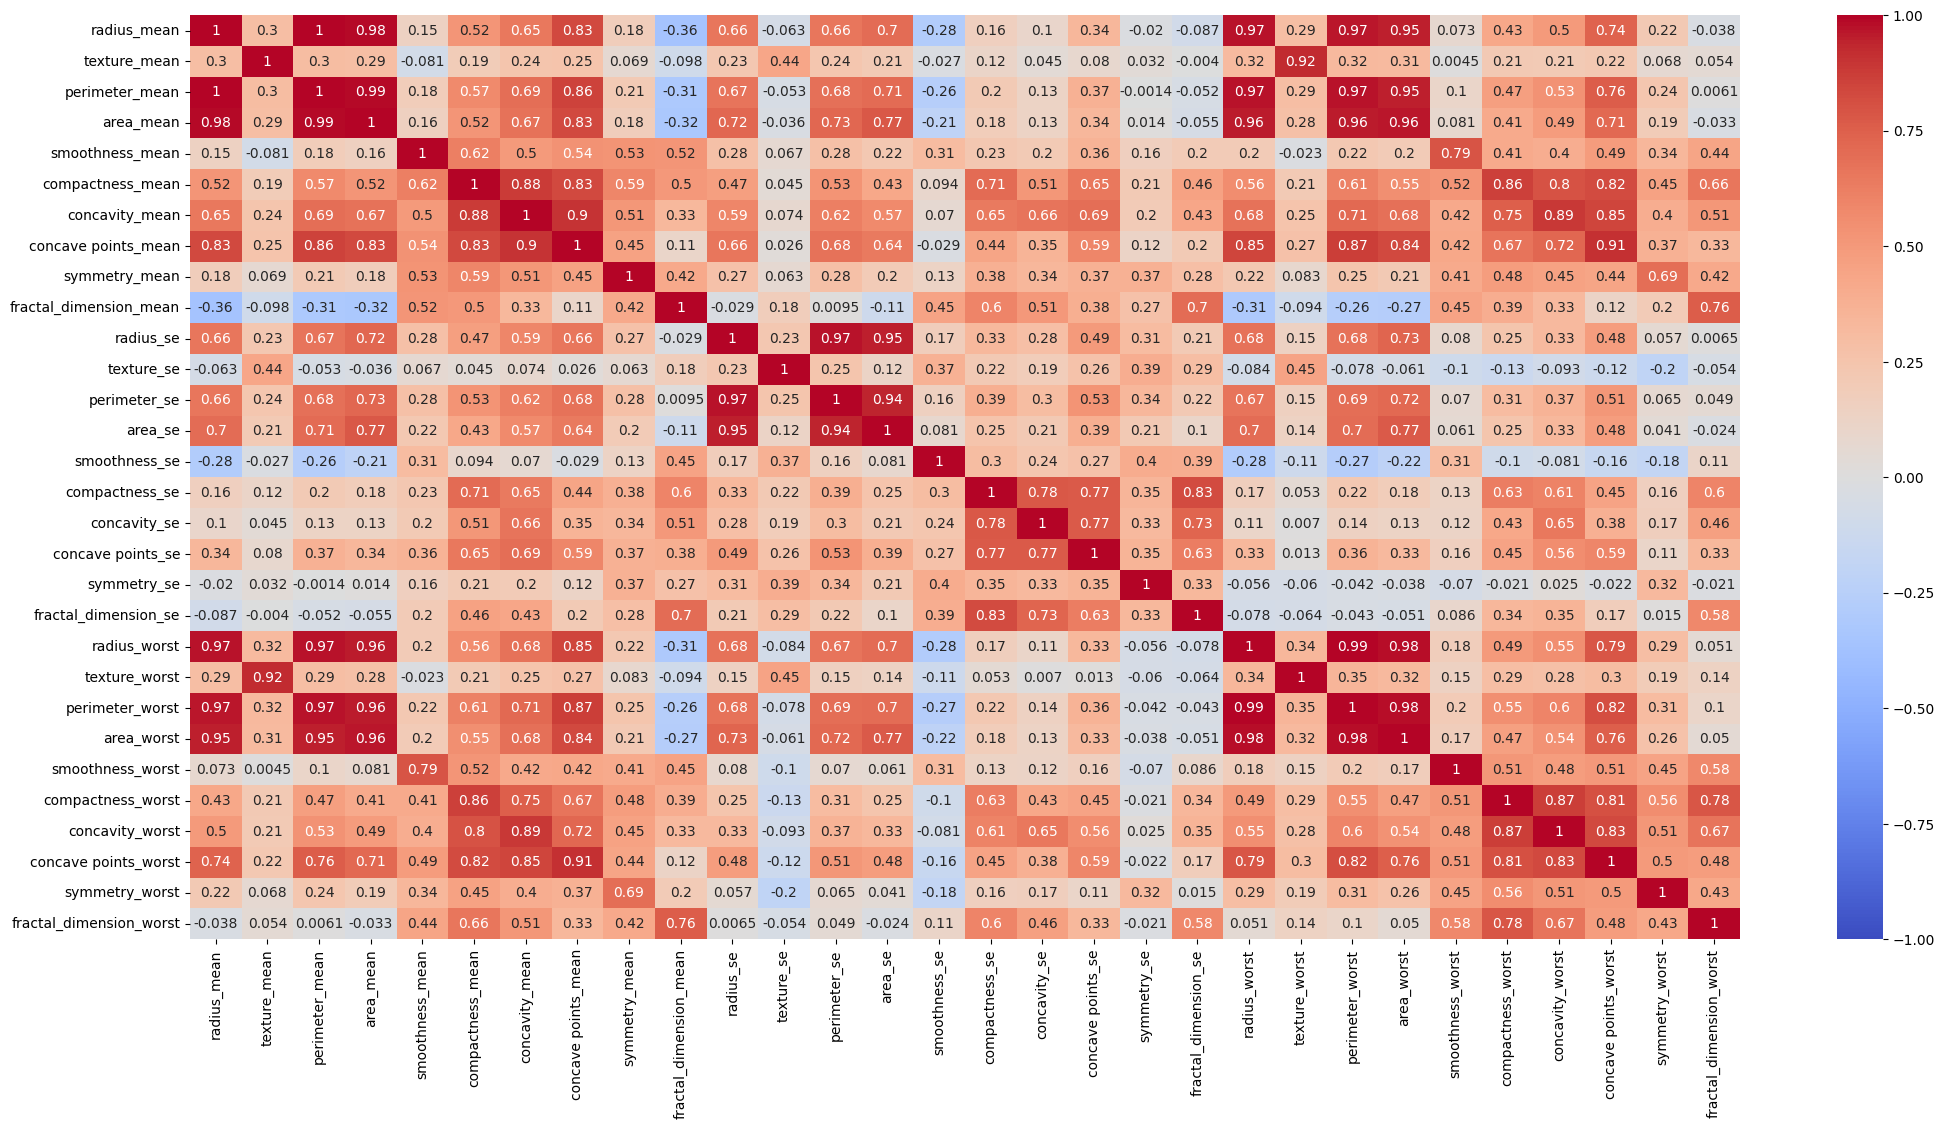

In [85]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
plt.figure(figsize=(25, 12))
sns.heatmap(breast_cancer_train_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [86]:
##################################
# Formulating the pairwise correlation summary
# between the predictor columns
##################################
# Converting the correlation matrix to a long format
breast_cancer_train_correlation_summary = (
    breast_cancer_train_correlation_matrix
    # keeping the upper triangle of the correlation matrix
    .where(~np.tril(np.ones(breast_cancer_train_correlation_matrix.shape)).astype(bool))  
    # convering to a long format
    .stack()  
    .reset_index()
)

# Renaming the summary columns
breast_cancer_train_correlation_summary.columns = ['Predictor1.Column.Name', 'Predictor2.Column.Name', 'Pearson.Correlation']

# Sorting from highest to lowest
breast_cancer_train_correlation_summary = breast_cancer_train_correlation_summary.sort_values(by='Pearson.Correlation', ascending=False).reset_index(drop=True)

# Displaying the summary table
display(breast_cancer_train_correlation_summary)

Predictor1.Column.Name  Predictor2.Column.Name  Pearson.Correlation
0               radius_mean          perimeter_mean             0.997917
1              radius_worst         perimeter_worst             0.993610
2            perimeter_mean               area_mean             0.985186
3               radius_mean               area_mean             0.984916
4              radius_worst              area_worst             0.982412
..                      ...                     ...                  ...
430             radius_mean           smoothness_se            -0.282663
431  fractal_dimension_mean            radius_worst            -0.307089
432          perimeter_mean  fractal_dimension_mean            -0.313834
433               area_mean  fractal_dimension_mean            -0.320518
434             radius_mean  fractal_dimension_mean            -0.362551

[435 rows x 3 columns]

In [87]:
##################################
# Exploring the pairwise correlation values
# between the predictor columns
##################################
breast_cancer_train_correlation_exploration = (
    breast_cancer_train_correlation_matrix
    .where(~np.tril(np.ones(breast_cancer_train_correlation_matrix.shape)).astype(bool))
    .stack()
    .values
)

# Computing the quartiles and IQR
correlation_q1 = np.percentile(breast_cancer_train_correlation_exploration, 25)
correlation_q3 = np.percentile(breast_cancer_train_correlation_exploration, 75)
correlation_iqr = correlation_q3 - correlation_q1

print(f"Q1 (25th percentile): {correlation_q1:.3f}")
print(f"Q3 (75th percentile): {correlation_q3:.3f}")
print(f"IQR (Q3 - Q1): {correlation_iqr:.3f}")

Q1 (25th percentile): 0.129
Q3 (75th percentile): 0.558
IQR (Q3 - Q1): 0.429


In [88]:
##################################
# Determining the highly collinear predictors
# with Pearson Correlation > 0.90
##################################
breast_cancer_train_correlation_summary_highcollinearity = breast_cancer_train_correlation_summary[breast_cancer_train_correlation_summary['Pearson.Correlation'].abs() > 0.90].reset_index(drop=True)
display(breast_cancer_train_correlation_summary_highcollinearity)

Predictor1.Column.Name Predictor2.Column.Name  Pearson.Correlation
0             radius_mean         perimeter_mean             0.997917
1            radius_worst        perimeter_worst             0.993610
2          perimeter_mean              area_mean             0.985186
3             radius_mean              area_mean             0.984916
4            radius_worst             area_worst             0.982412
5         perimeter_worst             area_worst             0.978668
6          perimeter_mean        perimeter_worst             0.972875
7          perimeter_mean           radius_worst             0.972461
8             radius_mean           radius_worst             0.971938
9               radius_se           perimeter_se             0.971589
10            radius_mean        perimeter_worst             0.967088
11              area_mean             area_worst             0.964157
12              area_mean           radius_worst             0.958283
13              area_mean        perimeter_worst             0.955452
14         perimeter_mean             area_worst             0.951121
15              radius_se                area_se             0.948731
16            radius_mean             area_worst             0.948294
17           perimeter_se                area_se             0.942853
18           texture_mean          texture_worst             0.923246
19    concave points_mean   concave points_worst             0.911806
20         concavity_mean    concave points_mean             0.900196

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis<a class="anchor" id="1.5.1"></a>

Exploratory data analysis findings are as follows:
1. Bivariate analysis identified individual predictors with generally positive association to the target variable based on visual inspection.
2. A total of 24 of 30 predictors demonstrated higher values that are associated with the <span style="color: #FF0000">diagnosis=M</span> category as compared to measurements under the <span style="color: #FF0000">diagnosis=B</span> category:
    * <span style="color: #FF0000">radius_mean</span>
    * <span style="color: #FF0000">texture_mean</span>
    * <span style="color: #FF0000">perimeter_mean</span>
    * <span style="color: #FF0000">area_mean</span>
    * <span style="color: #FF0000">compactness_mean</span>
    * <span style="color: #FF0000">concavity_mean</span>
    * <span style="color: #FF0000">concave points_mean</span>
    * <span style="color: #FF0000">symmetry_mean</span>
    * <span style="color: #FF0000">radius_se</span>
    * <span style="color: #FF0000">perimeter_se</span>
    * <span style="color: #FF0000">area_se</span>
    * <span style="color: #FF0000">compactness_se</span>
    * <span style="color: #FF0000">concave points_se</span>
    * <span style="color: #FF0000">fractal_dimension_se</span>
    * <span style="color: #FF0000">radius_worst</span>
    * <span style="color: #FF0000">texture_worst</span>
    * <span style="color: #FF0000">perimeter_worst</span>
    * <span style="color: #FF0000">area_worst</span>
    * <span style="color: #FF0000">smoothness_worst</span>
    * <span style="color: #FF0000">compactness_worst</span>
    * <span style="color: #FF0000">concavity_worst</span>
    * <span style="color: #FF0000">concave points_worst</span>
    * <span style="color: #FF0000">symmetry_worst</span>
    * <span style="color: #FF0000">fractal_dimension_worst</span>

In [89]:
##################################
# Segregating the target
# and predictor variables
##################################
breast_cancer_train_predictors_numeric = breast_cancer_train.iloc[:,1:].columns

In [90]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = breast_cancer_train_predictors_numeric

In [91]:
##################################
# Segregating the target variable
# and numeric predictors
##################################
boxplot_y_variable = 'diagnosis'
boxplot_x_variables = numeric_variable_name_list.values

In [92]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 10
num_cols = 3

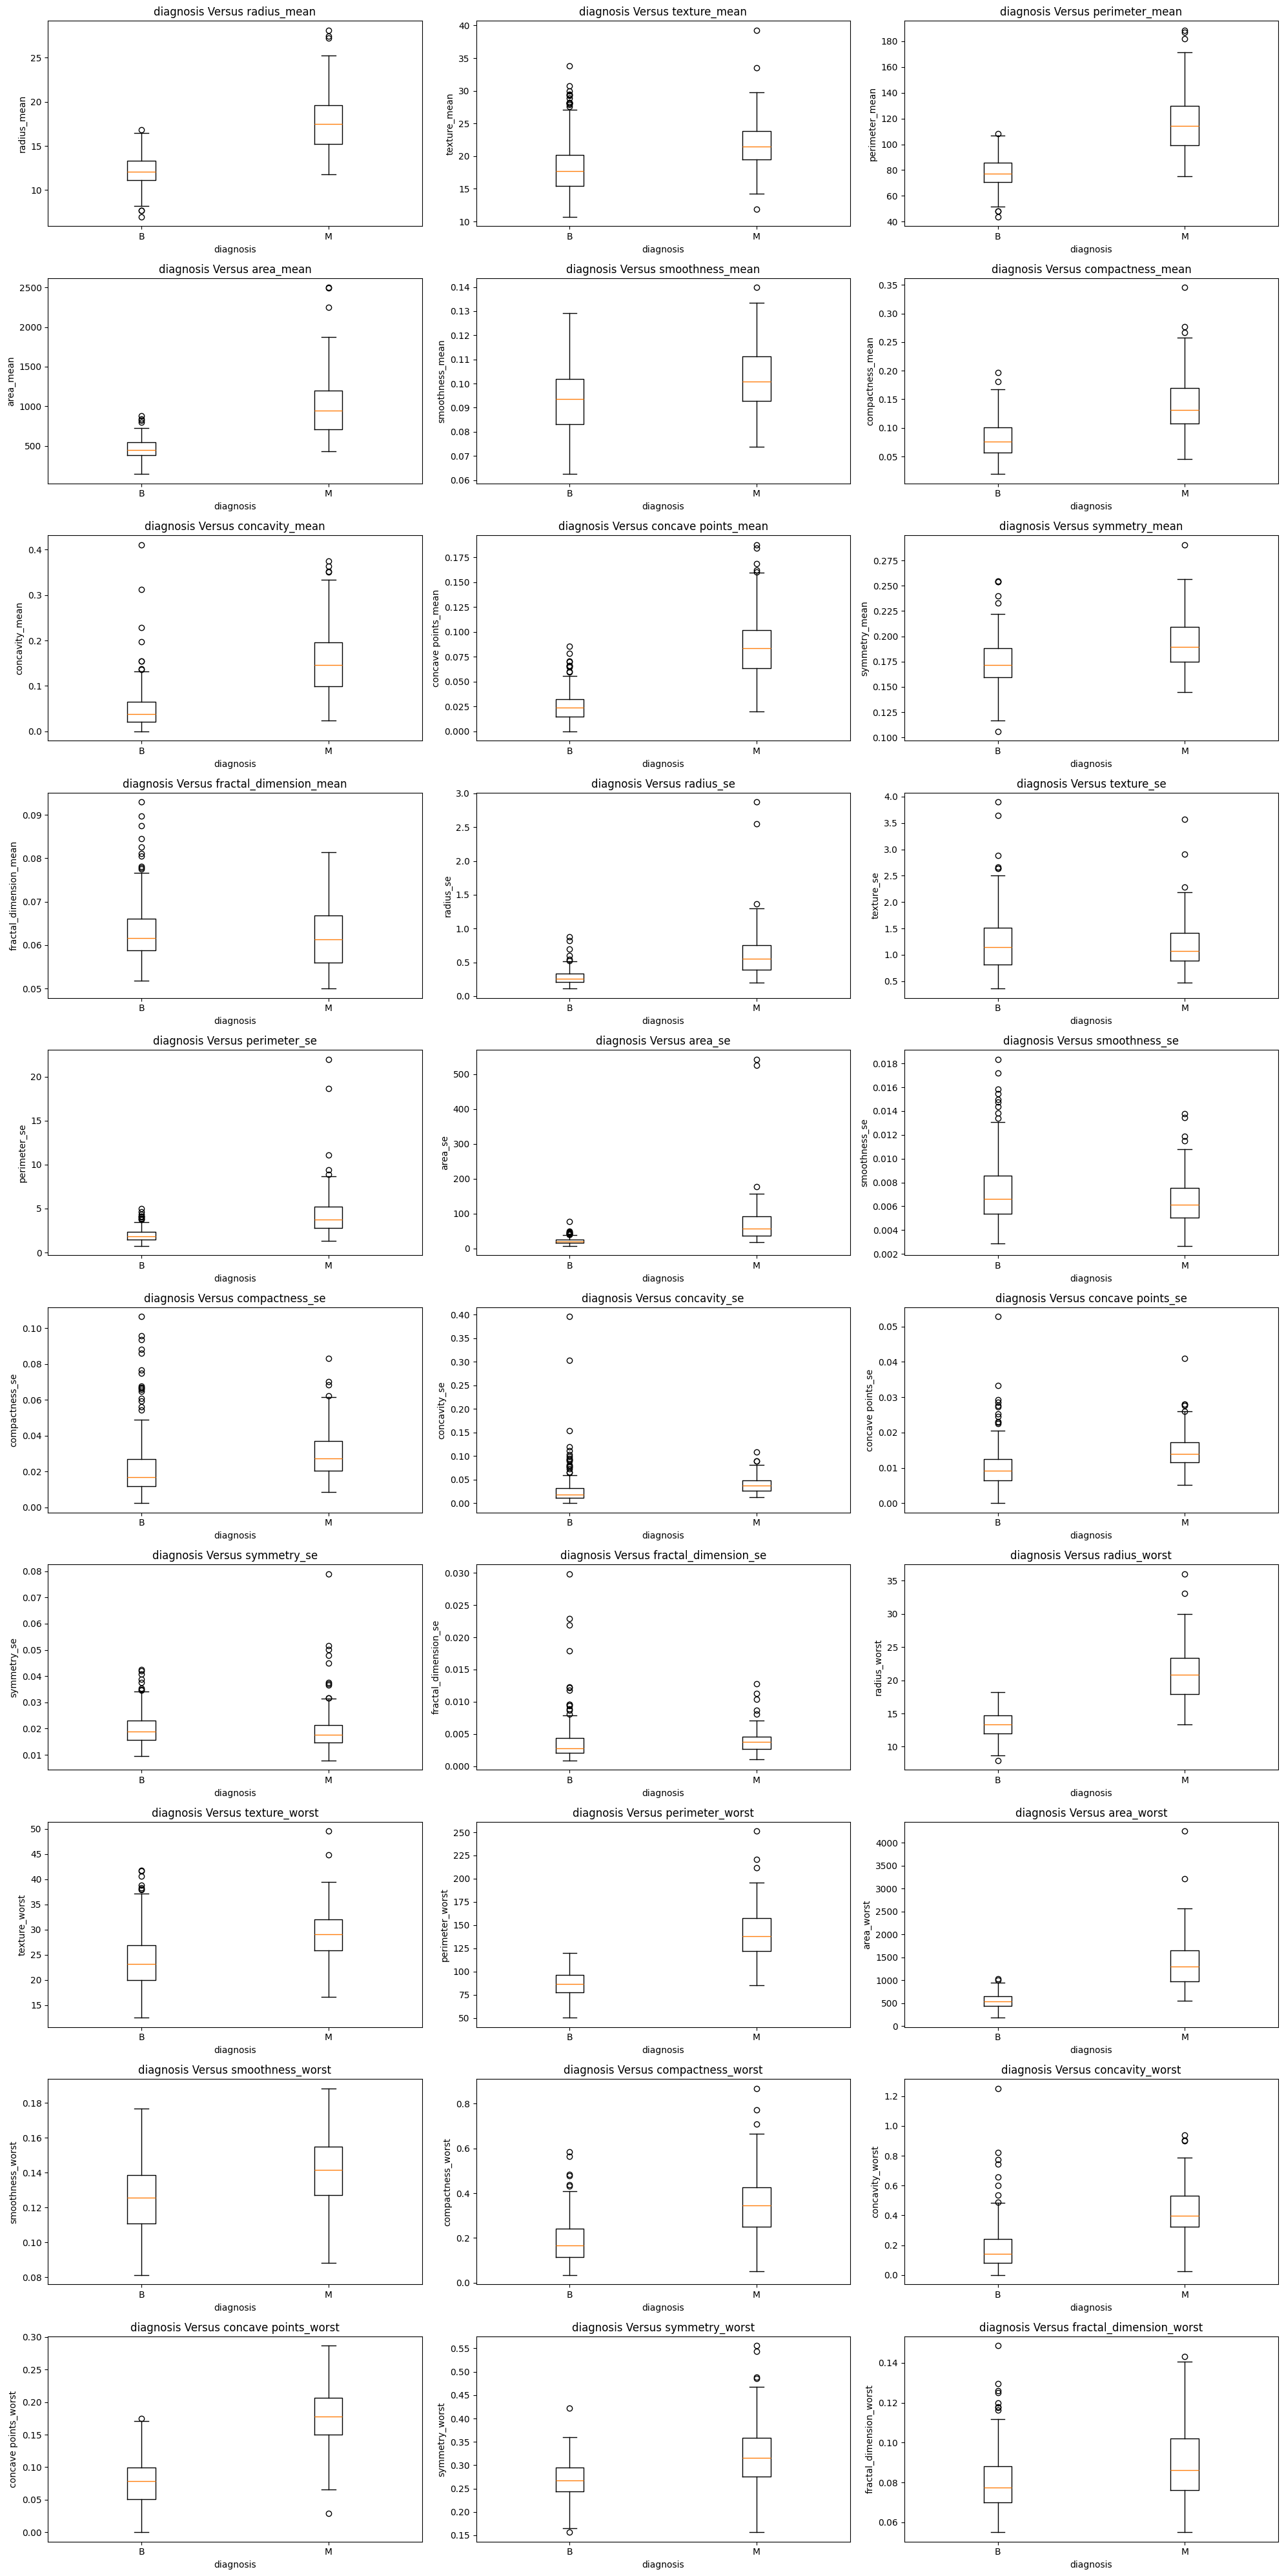

In [93]:
##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual boxplots
# for all scaled numeric columns
##################################
for i, x_variable in enumerate(boxplot_x_variables):
    ax = axes[i]
    ax.boxplot([group[x_variable] for name, group in breast_cancer_train.groupby(boxplot_y_variable, observed=True)])
    ax.set_title(f'{boxplot_y_variable} Versus {x_variable}')
    ax.set_xlabel(boxplot_y_variable)
    ax.set_ylabel(x_variable)
    ax.set_xticks(range(1, len(breast_cancer_train[boxplot_y_variable].unique()) + 1), ['B', 'M'])

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

### 1.5.2 Hypothesis Testing<a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric predictors to the <span style="color: #FF0000">diagnosis</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: Difference in the means between groups B and M is equal to zero  
    * **Alternative**: Difference in the means between groups B and M is not equal to zero   
2. There is sufficient evidence to conclude of a statistically significant difference between the means of the numeric measurements obtained from B and M groups of the <span style="color: #FF0000">diagnosis</span> target variable in 26 of the 30 numeric predictors given their high t-test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">perimeter_worst</span>: T.Test.Statistic=-23.391, T.Test.PValue=0.000
    * <span style="color: #FF0000">radius_worst</span>: T.Test.Statistic=-23.228, T.Test.PValue=0.000 
    * <span style="color: #FF0000">concave points_worst</span>: T.Test.Statistic=-21.365, T.Test.PValue=0.000  
    * <span style="color: #FF0000">concave points_mean</span>: T.Test.Statistic=-21.258, T.Test.PValue=0.000 
    * <span style="color: #FF0000">area_worst</span>: T.Test.Statistic=-20.310, T.Test.PValue=0.000 
    * <span style="color: #FF0000">perimeter_mean</span>: T.Test.Statistic=-20.086, T.Test.PValue=0.000  
    * <span style="color: #FF0000">radius_mean</span>: T.Test.Statistic=-19.510, T.Test.PValue=0.000   
    * <span style="color: #FF0000">area_mean</span>: T.Test.Statistic=-17.991, T.Test.PValue=0.000
    * <span style="color: #FF0000">concavity_mean</span>: T.Test.Statistic=-15.314, T.Test.PValue=0.026
    * <span style="color: #FF0000">concavity_worst</span>: T.Test.Statistic=-13.368, T.Test.PValue=0.000
    * <span style="color: #FF0000">compactness_mean</span>: T.Test.Statistic=-12.647, T.Test.PValue=0.000 
    * <span style="color: #FF0000">compactness_worst</span>: T.Test.Statistic=-12.079, T.Test.PValue=0.000  
    * <span style="color: #FF0000">radius_se</span>: T.Test.Statistic=-11.532, T.Test.PValue=0.000 
    * <span style="color: #FF0000">perimeter_se</span>: T.Test.Statistic=-11.234, T.Test.PValue=0.000 
    * <span style="color: #FF0000">area_se</span>: T.Test.Statistic=-10.375, T.Test.PValue=0.000  
    * <span style="color: #FF0000">symmetry_worst</span>: T.Test.Statistic=-8.312, T.Test.PValue=0.000   
    * <span style="color: #FF0000">texture_worst</span>: T.Test.Statistic=-7.911, T.Test.PValue=0.000
    * <span style="color: #FF0000">smoothness_worst</span>: T.Test.Statistic=-7.080, T.Test.PValue=0.000
    * <span style="color: #FF0000">texture_mean</span>: T.Test.Statistic=-6.682, T.Test.PValue=0.000
    * <span style="color: #FF0000">concave points_se</span>: T.Test.Statistic=-6.679, T.Test.PValue=0.000
    * <span style="color: #FF0000">symmetry_mean</span>: T.Test.Statistic=-6.315, T.Test.PValue=0.000 
    * <span style="color: #FF0000">smoothness_mean</span>: T.Test.Statistic=-6.087, T.Test.PValue=0.000  
    * <span style="color: #FF0000">fractal_dimension_worst</span>: T.Test.Statistic=-4.740, T.Test.PValue=0.000 
    * <span style="color: #FF0000">compactness_se</span>: T.Test.Statistic=-3.733, T.Test.PValue=0.000 
    * <span style="color: #FF0000">concavity_se</span>: T.Test.Statistic=-2.703, T.Test.PValue=0.007  
    * <span style="color: #FF0000">smoothness_se</span>: T.Test.Statistic=+2.425, T.Test.PValue=0.015   
3. Feature extraction using Principal Component Analysis was explored to address the high number of correlated predictors noted with high skewness and outlier ratio. The 30 predictors can be potentially reduced to just 10 uncorrelated principal components representing 95% of the original variance.
    * <span style="color: #FF0000">pc_1</span>: Explained_Variance_Ratio=0.426, Cumulative_Explained_Variance=0.426
    * <span style="color: #FF0000">pc_2</span>: Explained_Variance_Ratio=0.189, Cumulative_Explained_Variance=0.615
    * <span style="color: #FF0000">pc_3</span>: Explained_Variance_Ratio=0.101, Cumulative_Explained_Variance=0.717
    * <span style="color: #FF0000">pc_4</span>: Explained_Variance_Ratio=0.068, Cumulative_Explained_Variance=0.786
    * <span style="color: #FF0000">pc_5</span>: Explained_Variance_Ratio=0.058, Cumulative_Explained_Variance=0.845
    * <span style="color: #FF0000">pc_6</span>: Explained_Variance_Ratio=0.042, Cumulative_Explained_Variance=0.887
    * <span style="color: #FF0000">pc_7</span>: Explained_Variance_Ratio=0.022, Cumulative_Explained_Variance=0.910
    * <span style="color: #FF0000">pc_8</span>: Explained_Variance_Ratio=0.016, Cumulative_Explained_Variance=0.926
    * <span style="color: #FF0000">pc_9</span>: Explained_Variance_Ratio=0.014, Cumulative_Explained_Variance=0.941
    * <span style="color: #FF0000">pc_10</span>: Explained_Variance_Ratio=0.011, Cumulative_Explained_Variance=0.953
    * <span style="color: #FF0000">pc_11</span>: Explained_Variance_Ratio=0.010, Cumulative_Explained_Variance=0.963
    * <span style="color: #FF0000">pc_12</span>: Explained_Variance_Ratio=0.008, Cumulative_Explained_Variance=0.972
    * <span style="color: #FF0000">pc_13</span>: Explained_Variance_Ratio=0.007, Cumulative_Explained_Variance=0.979
    * <span style="color: #FF0000">pc_14</span>: Explained_Variance_Ratio=0.004, Cumulative_Explained_Variance=0.984
    * <span style="color: #FF0000">pc_15</span>: Explained_Variance_Ratio=0.002, Cumulative_Explained_Variance=0.986
    * <span style="color: #FF0000">pc_16</span>: Explained_Variance_Ratio=0.002, Cumulative_Explained_Variance=0.989
    * <span style="color: #FF0000">pc_17</span>: Explained_Variance_Ratio=0.001, Cumulative_Explained_Variance=0.991
    * <span style="color: #FF0000">pc_18</span>: Explained_Variance_Ratio=0.001, Cumulative_Explained_Variance=0.993
    * <span style="color: #FF0000">pc_19</span>: Explained_Variance_Ratio=0.001, Cumulative_Explained_Variance=0.994
    * <span style="color: #FF0000">pc_20</span>: Explained_Variance_Ratio=0.001, Cumulative_Explained_Variance=0.995
    * <span style="color: #FF0000">pc_21</span>: Explained_Variance_Ratio=0.000, Cumulative_Explained_Variance=0.996
    * <span style="color: #FF0000">pc_22</span>: Explained_Variance_Ratio=0.000, Cumulative_Explained_Variance=0.997
    * <span style="color: #FF0000">pc_23</span>: Explained_Variance_Ratio=0.000, Cumulative_Explained_Variance=0.998
    * <span style="color: #FF0000">pc_24</span>: Explained_Variance_Ratio=0.000, Cumulative_Explained_Variance=0.999
    * <span style="color: #FF0000">pc_25</span>: Explained_Variance_Ratio=0.000, Cumulative_Explained_Variance=0.999
    * <span style="color: #FF0000">pc_26</span>: Explained_Variance_Ratio=0.000, Cumulative_Explained_Variance=0.999
    * <span style="color: #FF0000">pc_27</span>: Explained_Variance_Ratio=0.000, Cumulative_Explained_Variance=0.999
    * <span style="color: #FF0000">pc_28</span>: Explained_Variance_Ratio=0.000, Cumulative_Explained_Variance=0.999
    * <span style="color: #FF0000">pc_29</span>: Explained_Variance_Ratio=0.000, Cumulative_Explained_Variance=0.999
    * <span style="color: #FF0000">pc_30</span>: Explained_Variance_Ratio=0.000, Cumulative_Explained_Variance=1.000
4. There is sufficient evidence to conclude of a statistically significant difference between the means of the principal component values obtained from B and M groups of the <span style="color: #FF0000">diagnosis</span> target variable in 6 of the 30 principal component predictors given their high t-test statistic values with reported low p-values less than the significance level of 0.05. The 30 predictors can be potentially reduced to at least 3 uncorrelated principal components demonstrating sufficient discrimination.
    * <span style="color: #FF0000">pc_1</span>: T.Test.Statistic=-21.406, T.Test.PValue=0.000
    * <span style="color: #FF0000">pc_2</span>: T.Test.Statistic=+4.080, T.Test.PValue=0.000 
    * <span style="color: #FF0000">pc_3</span>: T.Test.Statistic=+3.192, T.Test.PValue=0.015    
    * <span style="color: #FF0000">pc_14</span>: T.Test.Statistic=-2.299, T.Test.PValue=0.022
    * <span style="color: #FF0000">pc_17</span>: T.Test.Statistic=+2.256, T.Test.PValue=0.024
    * <span style="color: #FF0000">pc_20</span>: T.Test.Statistic=-2.001, T.Test.PValue=0.046

In [94]:
##################################
# Computing the t-test 
# statistic and p-values
# between the target variable
# and numeric predictor columns
##################################
breast_cancer_train_numeric_ttest_target = {}
breast_cancer_train_numeric = breast_cancer_train.iloc[:,1:]
breast_cancer_train_numeric_columns = breast_cancer_train.iloc[:,1:].columns
for numeric_column in breast_cancer_train_numeric_columns:
    group_B = breast_cancer_train[breast_cancer_train.loc[:,'diagnosis']=='B']
    group_M = breast_cancer_train[breast_cancer_train.loc[:,'diagnosis']=='M']
    breast_cancer_train_numeric_ttest_target['diagnosis_' + numeric_column] = stats.ttest_ind(
        group_B[numeric_column], 
        group_M[numeric_column], 
        equal_var=True)

In [95]:
##################################
# Formulating the pairwise ttest summary
# between the target variable
# and numeric predictor columns
##################################
breast_cancer_train_numeric_hypothesistesting_summary = breast_cancer_train_numeric.from_dict(breast_cancer_train_numeric_ttest_target, orient='index')
breast_cancer_train_numeric_hypothesistesting_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(breast_cancer_train_numeric_hypothesistesting_summary.sort_values(by=['T.Test.PValue'], ascending=True).head(30))

T.Test.Statistic  T.Test.PValue
diagnosis_perimeter_worst                -23.391423   5.216127e-71
diagnosis_radius_worst                   -23.228204   2.124527e-70
diagnosis_concave points_worst           -21.365587   2.304689e-63
diagnosis_concave points_mean            -21.258584   5.896498e-63
diagnosis_area_worst                     -20.310881   2.507249e-59
diagnosis_perimeter_mean                 -20.086310   1.830848e-58
diagnosis_radius_mean                    -19.510552   3.031653e-56
diagnosis_area_mean                      -17.991971   2.290509e-50
diagnosis_concavity_mean                 -15.314435   5.174576e-40
diagnosis_concavity_worst                -13.368057   1.245191e-32
diagnosis_compactness_mean               -12.647550   5.808618e-30
diagnosis_compactness_worst              -12.079671   6.827871e-28
diagnosis_radius_se                      -11.532905   6.238111e-26
diagnosis_perimeter_se                   -11.234387   7.087958e-25
diagnosis_area_se                        -10.375886   6.586298e-22
diagnosis_symmetry_worst                  -8.312820   2.780206e-15
diagnosis_texture_worst                   -7.911132   4.296038e-14
diagnosis_smoothness_worst                -7.080658   9.290923e-12
diagnosis_texture_mean                    -6.682817   1.055204e-10
diagnosis_concave points_se               -6.679983   1.073250e-10
diagnosis_symmetry_mean                   -6.315327   9.103085e-10
diagnosis_smoothness_mean                 -6.087615   3.308230e-09
diagnosis_fractal_dimension_worst         -4.740955   3.218718e-06
diagnosis_compactness_se                  -3.733659   2.236727e-04
diagnosis_concavity_se                    -2.703321   7.235270e-03
diagnosis_smoothness_se                    2.425051   1.586462e-02
diagnosis_fractal_dimension_mean           1.513439   1.311644e-01
diagnosis_texture_se                       0.432444   6.657128e-01
diagnosis_symmetry_se                      0.155224   8.767432e-01
diagnosis_fractal_dimension_se            -0.073082   9.417872e-01

In [96]:
##################################
# Exploring a feature extraction approach
# using Principal Component Analysis
# to address the high number of correlated predictors
# noted with high skewness and outlier ratio
##################################
# Standardizing predictors to address
# differences in scaling
##################################
scaler = StandardScaler()
breast_cancer_train_numeric_scaled = scaler.fit_transform(breast_cancer_train_numeric) 
breast_cancer_train_numeric_scaled = pd.DataFrame(breast_cancer_train_numeric_scaled,
                                                  columns=breast_cancer_train_numeric.columns,
                                                  index=breast_cancer_train_numeric.index)


In [97]:
##################################
# Conducting Principal Component Analysis
# on the standardized predictors
##################################
n_components = breast_cancer_train_numeric_scaled.shape[1]
pca = PCA(n_components=n_components, svd_solver='full', random_state=987654321)
breast_cancer_train_numeric_scaled_pcs = pca.fit_transform(breast_cancer_train_numeric_scaled)

In [98]:
##################################
# Consolidating the principal components
# into a dataframe and reattaching
# the diagnosis target column
##################################
pc_cols = [f'pc_{i+1}' for i in range(n_components)]
breast_cancer_train_numeric_scaled_pcs = pd.DataFrame(breast_cancer_train_numeric_scaled_pcs, columns=pc_cols, index=breast_cancer_train_numeric_scaled.index)
breast_cancer_train_pcs = pd.concat([breast_cancer_train[['diagnosis']].copy(), breast_cancer_train_numeric_scaled_pcs], axis=1)

In [99]:
##################################
# Consolidating the explained variance ratio
# for the principal components
##################################
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_summary = pd.DataFrame({
    'PC': pc_cols,
    'Explained_Variance_Ratio': explained_variance_ratio,
    'Cumulative_Explained_Variance': np.cumsum(explained_variance_ratio)
}).set_index('PC')
display(explained_variance_ratio_summary)

Explained_Variance_Ratio  Cumulative_Explained_Variance
PC                                                            
pc_1                   0.426228                       0.426228
pc_2                   0.189411                       0.615639
pc_3                   0.101749                       0.717388
pc_4                   0.068995                       0.786383
pc_5                   0.058895                       0.845278
pc_6                   0.042254                       0.887533
pc_7                   0.022768                       0.910300
pc_8                   0.016543                       0.926843
pc_9                   0.014899                       0.941743
pc_10                  0.011865                       0.953608
pc_11                  0.010183                       0.963790
pc_12                  0.008323                       0.972114
pc_13                  0.007802                       0.979915
pc_14                  0.004232                       0.984147
pc_15                  0.002850                       0.986997
pc_16                  0.002469                       0.989465
pc_17                  0.001967                       0.991433
pc_18                  0.001811                       0.993243
pc_19                  0.001471                       0.994714
pc_20                  0.001133                       0.995847
pc_21                  0.000952                       0.996800
pc_22                  0.000891                       0.997691
pc_23                  0.000713                       0.998404
pc_24                  0.000599                       0.999002
pc_25                  0.000480                       0.999482
pc_26                  0.000242                       0.999724
pc_27                  0.000203                       0.999927
pc_28                  0.000044                       0.999972
pc_29                  0.000024                       0.999996
pc_30                  0.000004                       1.000000

In [100]:
##################################
# Computing the t-test 
# statistic and p-values
# between the target variable
# and principal component predictor columns
##################################
breast_cancer_train_pcs_ttest_target = {}
breast_cancer_train_pcs_numeric = breast_cancer_train_pcs.iloc[:,1:]
breast_cancer_train_pcs_numeric_columns = breast_cancer_train_pcs.iloc[:,1:].columns
for numeric_column in breast_cancer_train_pcs_numeric_columns:
    group_B = breast_cancer_train_pcs[breast_cancer_train_pcs.loc[:,'diagnosis']=='B']
    group_M = breast_cancer_train_pcs[breast_cancer_train_pcs.loc[:,'diagnosis']=='M']
    breast_cancer_train_pcs_ttest_target['diagnosis_' + numeric_column] = stats.ttest_ind(
        group_B[numeric_column], 
        group_M[numeric_column], 
        equal_var=True)

In [101]:
##################################
# Formulating the pairwise ttest summary
# between the target variable
# and principal component predictor columns
##################################
breast_cancer_train_pcs_numeric_hypothesistesting_summary = breast_cancer_train_pcs_numeric.from_dict(breast_cancer_train_pcs_ttest_target, orient='index')
breast_cancer_train_pcs_numeric_hypothesistesting_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(breast_cancer_train_pcs_numeric_hypothesistesting_summary.sort_values(by=['T.Test.PValue'], ascending=True).head(30))

T.Test.Statistic  T.Test.PValue
diagnosis_pc_1         -21.406124   1.614914e-63
diagnosis_pc_2           4.080724   5.686808e-05
diagnosis_pc_3           3.192160   1.553738e-03
diagnosis_pc_13         -2.299656   2.211727e-02
diagnosis_pc_17          2.256550   2.471705e-02
diagnosis_pc_20         -2.001077   4.623628e-02
diagnosis_pc_4          -1.925622   5.504581e-02
diagnosis_pc_5          -1.762550   7.893997e-02
diagnosis_pc_14         -1.532393   1.264228e-01
diagnosis_pc_15          1.358293   1.753365e-01
diagnosis_pc_19          1.279015   2.018272e-01
diagnosis_pc_30          1.130236   2.592313e-01
diagnosis_pc_24          1.123771   2.619603e-01
diagnosis_pc_12         -1.010027   3.132526e-01
diagnosis_pc_25         -0.976871   3.293781e-01
diagnosis_pc_8          -0.911846   3.625425e-01
diagnosis_pc_26          0.838271   4.025101e-01
diagnosis_pc_16         -0.650378   5.159193e-01
diagnosis_pc_7          -0.576641   5.645909e-01
diagnosis_pc_23          0.503616   6.148809e-01
diagnosis_pc_29         -0.494381   6.213796e-01
diagnosis_pc_28          0.373462   7.090540e-01
diagnosis_pc_11         -0.362203   7.174415e-01
diagnosis_pc_9           0.261159   7.941393e-01
diagnosis_pc_10         -0.225840   8.214716e-01
diagnosis_pc_18         -0.221574   8.247879e-01
diagnosis_pc_22         -0.201455   8.404724e-01
diagnosis_pc_6           0.155608   8.764409e-01
diagnosis_pc_21         -0.138978   8.895559e-01
diagnosis_pc_27         -0.105049   9.164037e-01

## 1.6. Premodelling Data Preparation <a class="anchor" id="1.6"></a>

### 1.6.1 Preprocessed Data Description<a class="anchor" id="1.6.1"></a>

1. Due to the considerable number of predictors noted with high skewness, outlier ratio and multicollinearity, standardization and PCA feature extraction were performed to address issues with distributional shape and pairwise correlation. 
    * High skewness observed for 5 variables with Skewness>3 or Skewness<(-3).
        * <span style="color: #FF0000">area_se</span>: Skewness = 6.562
        * <span style="color: #FF0000">concavity_se</span>: Skewness = 5.648
        * <span style="color: #FF0000">fractal_dimension_se</span>: Skewness = 4.280
        * <span style="color: #FF0000">perimeter_se</span>: Skewness = 4.136
        * <span style="color: #FF0000">radius_se</span>: Skewness = 3.775
    * Relatively high number of outliers observed for 7 numeric variables with Outlier.Ratio>0.05.
        * <span style="color: #FF0000">area_se</span>: Outlier.Ratio = 0.110
        * <span style="color: #FF0000">radius_se</span>: Outlier.Ratio = 0.075
        * <span style="color: #FF0000">perimeter_se</span>: Outlier.Ratio = 0.075
        * <span style="color: #FF0000">smoothness_se</span>: Outlier.Ratio = 0.059
        * <span style="color: #FF0000">compactness_se</span>: Outlier.Ratio = 0.059
        * <span style="color: #FF0000">fractal_dimension_se</span>: Outlier.Ratio = 0.056
        * <span style="color: #FF0000">symmetry_se</span>: Outlier.Ratio = 0.050
    * High Pearson.Correlation values > 0.90 were noted for 4.60% (20/435) of the pairwise combinations of predictors:
        * <span style="color: #FF0000">radius_mean</span> and <span style="color: #FF0000">perimeter_mean</span>: Pearson.Correlation = 0.997
        * <span style="color: #FF0000">radius_worst</span> and <span style="color: #FF0000">perimeter_worst</span>: Pearson.Correlation = 0.993
        * <span style="color: #FF0000">perimeter_mean</span> and <span style="color: #FF0000">area_mean</span>: Pearson.Correlation = 0.985
        * <span style="color: #FF0000">radius_mean</span> and <span style="color: #FF0000">area_mean</span>: Pearson.Correlation = 0.984
        * <span style="color: #FF0000">radius_worst</span> and <span style="color: #FF0000">area_worst</span>: Pearson.Correlation = 0.982
        * <span style="color: #FF0000">perimeter_worst</span> and <span style="color: #FF0000">area_worst</span>: Pearson.Correlation = 0.978
        * <span style="color: #FF0000">perimeter_mean</span> and <span style="color: #FF0000">perimeter_worst</span>: Pearson.Correlation = 0.972
        * <span style="color: #FF0000">perimeter_mean</span> and <span style="color: #FF0000">radius_worst</span>: Pearson.Correlation = 0.972
        * <span style="color: #FF0000">radius_mean</span> and <span style="color: #FF0000">radius_worst</span>: Pearson.Correlation = 0.971
        * <span style="color: #FF0000">radius_se</span> and <span style="color: #FF0000">perimeter_se</span>: Pearson.Correlation = 0.971
        * <span style="color: #FF0000">radius_mean</span> and <span style="color: #FF0000">perimeter_worst</span>: Pearson.Correlation = 0.967
        * <span style="color: #FF0000">area_mean</span> and <span style="color: #FF0000">area_worst</span>: Pearson.Correlation = 0.964
        * <span style="color: #FF0000">area_mean</span> and <span style="color: #FF0000">radius_worst</span>: Pearson.Correlation = 0.958
        * <span style="color: #FF0000">area_mean</span> and <span style="color: #FF0000">perimeter_worst</span>: Pearson.Correlation = 0.955
        * <span style="color: #FF0000">perimeter_mean</span> and <span style="color: #FF0000">area_worst</span>: Pearson.Correlation = 0.951
        * <span style="color: #FF0000">radius_se</span> and <span style="color: #FF0000">area_se</span>: Pearson.Correlation = 0.948
        * <span style="color: #FF0000">radius_mean</span> and <span style="color: #FF0000">area_worst</span>: Pearson.Correlation = 0.948
        * <span style="color: #FF0000">perimeter_se</span> and <span style="color: #FF0000">area_se</span>: Pearson.Correlation = 0.942
        * <span style="color: #FF0000">texture_mean</span> and <span style="color: #FF0000">texture_worst</span>: Pearson.Correlation = 0.923
        * <span style="color: #FF0000">concave points_mean</span> and <span style="color: #FF0000">concave points_worst</span>: Pearson.Correlation = 0.911
        * <span style="color: #FF0000">concavity_mean</span> and <span style="color: #FF0000">concave points_mean</span>: Pearson.Correlation = 0.900    
2. Based on the assessment of cumulative explained variance and discrimination power of the extracted principal components, the number of predictors can range from 3 to 10. 
3. To enable diversity among predictors, 10 principal components were used for the downstream modeling process.
4. The **preprocessed train dataset (final**) is comprised of:
    * **319 rows** (observations)
        * **200 diagnosis=B**: 62.69%
        * **119 diagnosis=M**: 37.30%
    * **11 columns** (variables)
        * **1/11 target** (categorical)
             * <span style="color: #FF0000">diagnosis</span>
        * **10/11 predictor** (numeric)
             * <span style="color: #FF0000">pc_1</span>
             * <span style="color: #FF0000">pc_2</span>
             * <span style="color: #FF0000">pc_3</span>
             * <span style="color: #FF0000">pc_4</span>
             * <span style="color: #FF0000">pc_5</span>
             * <span style="color: #FF0000">pc_6</span>
             * <span style="color: #FF0000">pc_7</span>
             * <span style="color: #FF0000">pc_8</span>
             * <span style="color: #FF0000">pc_9</span>
             * <span style="color: #FF0000">pc_10</span>

### 1.6.2 Preprocessing Pipeline Development<a class="anchor" id="1.6.2"></a>
1. A preprocessing pipeline was formulated and applied to the train data (final), validation data and test data with the following actions:
    * Applied standardization to address difference in scales among the predictors
    * Performed data extraction using Principal Component Analysis of the scaled predictors
    * Filtered the predictors to the top 10 principal components

In [102]:
##################################
# Formulating a preprocessing pipeline
# that performs standardization,
# performs feature extraction using PCA, and
# filtering the first 10 principal components as predictors
##################################
def preprocess_dataset(train_df: pd.DataFrame, 
                       evaluation_df: pd.DataFrame, 
                       n_components: int = 10, 
                       random_state: int = 987654321) -> pd.DataFrame:  
    # Splitting the target and predictor columns
    target_col = train_df.columns[0]
    X_train = train_df.iloc[:, 1:]
    y_train = train_df.iloc[:, 0]
    X_test = evaluation_df.iloc[:, 1:]
    y_test = evaluation_df.iloc[:, 0]

    # Fitting StandardScaler on training data and transforming both training and evaluation data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fitting PCA on training data on training data and transforming both training and evaluation data
    pca = PCA(n_components=min(n_components, X_train.shape[1]), random_state=random_state)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Preparing the output DataFrame for the evaluation data
    pc_cols = [f'pc_{i+1}' for i in range(X_test_pca.shape[1])]
    scaled_pcatransformed_evaluation_df = pd.DataFrame(X_test_pca, columns=pc_cols, index=evaluation_df.index)

    # Add target column back as first column
    scaled_pcatransformed_evaluation_df.insert(0, target_col, y_test.values)

    # Printing variance explained for reference
    explained_var = np.cumsum(pca.explained_variance_ratio_)
    print(f"Explained Variance (First {n_components} PCs): {explained_var[-1]:.4f}")

    return scaled_pcatransformed_evaluation_df

In [103]:
##################################
# Applying the preprocessing pipeline
# to the train data
##################################
breast_cancer_preprocessed_train = preprocess_dataset(breast_cancer_train, breast_cancer_train, 10, 987654321)
X_preprocessed_train = breast_cancer_preprocessed_train.drop('diagnosis', axis = 1)
y_preprocessed_train = breast_cancer_preprocessed_train['diagnosis']
breast_cancer_preprocessed_train.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TRAIN_PATH, "breast_cancer_preprocessed_train.csv"), index=False)
X_preprocessed_train.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TRAIN_FEATURES_PATH, "X_preprocessed_train.csv"), index=False)
y_preprocessed_train.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TRAIN_TARGET_PATH, "y_preprocessed_train.csv"), index=False)
print('Final Preprocessed Train Dataset Dimensions: ')
display(X_preprocessed_train.shape)
display(y_preprocessed_train.shape)
print('Final Preprocessed Train Target Variable Breakdown: ')
display(y_preprocessed_train.value_counts())
print('Final Preprocessed Train Target Variable Proportion: ')
display(y_preprocessed_train.value_counts(normalize = True))
breast_cancer_preprocessed_train.head()

Explained Variance (First 10 PCs): 0.9536
Final Preprocessed Train Dataset Dimensions: 


(319, 10)

(319,)

Final Preprocessed Train Target Variable Breakdown: 


diagnosis
B    200
M    119
Name: count, dtype: int64

Final Preprocessed Train Target Variable Proportion: 


diagnosis
B    0.626959
M    0.373041
Name: proportion, dtype: float64

diagnosis       pc_1      pc_2       pc_3      pc_4      pc_5  \
id                                                                      
868826          M   3.729203  0.987215   3.540855 -2.064283  2.512443   
8810703         M  12.079158 -6.698169  10.242397 -5.434204  3.701610   
906878          B  -0.311673  0.128320  -1.056912  0.070388 -1.547663   
911654          B  -0.474681 -0.957130  -0.280827  0.354585 -1.590079   
903483          B  -3.766843  2.522881   1.905036 -0.056397  2.901107   

             pc_6      pc_7      pc_8      pc_9     pc_10  
id                                                         
868826   1.936519  0.697969  0.871868  0.642028 -1.833888  
8810703 -1.501518 -4.413311  1.612258  1.425855 -1.835477  
906878   0.331599  0.032196 -0.533350  0.293836  0.071285  
911654  -0.326743 -0.120392 -0.328281 -0.094953 -0.681747  
903483  -1.592187 -1.428407  0.134134 -0.774598  1.244052

In [104]:
##################################
# Applying the preprocessing pipeline
# to the validation data
##################################
breast_cancer_preprocessed_validation = preprocess_dataset(breast_cancer_validation, breast_cancer_validation, 10, 987654321)
X_preprocessed_validation = breast_cancer_preprocessed_validation.drop('diagnosis', axis = 1)
y_preprocessed_validation = breast_cancer_preprocessed_validation['diagnosis']
breast_cancer_preprocessed_validation.to_csv(os.path.join("..", DATASETS_PREPROCESSED_VALIDATION_PATH, "breast_cancer_preprocessed_validation.csv"), index=False)
X_preprocessed_validation.to_csv(os.path.join("..", DATASETS_PREPROCESSED_VALIDATION_FEATURES_PATH, "X_preprocessed_validation.csv"), index=False)
y_preprocessed_validation.to_csv(os.path.join("..", DATASETS_PREPROCESSED_VALIDATION_TARGET_PATH, "y_preprocessed_validation.csv"), index=False)
print('Final Preprocessed Validation Dataset Dimensions: ')
display(X_preprocessed_validation.shape)
display(y_preprocessed_validation.shape)
print('Final Preprocessed Validation Target Variable Breakdown: ')
display(y_preprocessed_validation.value_counts())
print('Final Preprocessed Validation Target Variable Proportion: ')
display(y_preprocessed_validation.value_counts(normalize = True))
breast_cancer_preprocessed_validation.head()

Explained Variance (First 10 PCs): 0.9658
Final Preprocessed Validation Dataset Dimensions: 


(107, 10)

(107,)

Final Preprocessed Validation Target Variable Breakdown: 


diagnosis
B    67
M    40
Name: count, dtype: int64

Final Preprocessed Validation Target Variable Proportion: 


diagnosis
B    0.626168
M    0.373832
Name: proportion, dtype: float64

diagnosis       pc_1      pc_2      pc_3      pc_4      pc_5      pc_6  \
id                                                                              
86355          M  13.035175  0.217957  2.105837 -0.636468  0.051561 -1.807528   
884948         M   7.208194 -2.366385  1.928770  0.199315 -0.748175 -1.513559   
915276         B   1.300337  8.300252 -0.043626 -1.908086 -1.499821  3.112851   
858970         B  -2.512677  3.300052  1.674471 -2.190322  3.044812 -1.144982   
898677         B  -2.418011  4.124441  2.878352 -0.155380 -0.288107  0.993082   

            pc_7      pc_8      pc_9     pc_10  
id                                              
86355  -0.025319  0.404616 -0.454300 -1.499024  
884948  0.265762 -0.764441  0.007565  0.402246  
915276 -0.717757  0.515100  1.345107 -0.311807  
858970  0.227182 -0.581862 -0.484832  1.131556  
898677 -0.246339  1.222199  2.012470 -0.674194

In [105]:
##################################
# Applying the preprocessing pipeline
# to the test data
##################################
breast_cancer_preprocessed_test = preprocess_dataset(breast_cancer_test, breast_cancer_test, 10, 987654321)
X_preprocessed_test = breast_cancer_preprocessed_test.drop('diagnosis', axis = 1)
y_preprocessed_test = breast_cancer_preprocessed_test['diagnosis']
breast_cancer_preprocessed_test.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TEST_PATH, "breast_cancer_preprocessed_test.csv"), index=False)
X_preprocessed_test.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TEST_FEATURES_PATH, "X_preprocessed_test.csv"), index=False)
y_preprocessed_test.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TEST_TARGET_PATH, "y_preprocessed_test.csv"), index=False)
print('Final Preprocessed Test Dataset Dimensions: ')
display(X_preprocessed_test.shape)
display(y_preprocessed_test.shape)
print('Final Preprocessed Test Target Variable Breakdown: ')
display(y_preprocessed_test.value_counts())
print('Final Preprocessed Test Target Variable Proportion: ')
display(y_preprocessed_test.value_counts(normalize = True))
breast_cancer_preprocessed_test.head()

Explained Variance (First 10 PCs): 0.9630
Final Preprocessed Test Dataset Dimensions: 


(143, 10)

(143,)

Final Preprocessed Test Target Variable Breakdown: 


diagnosis
B    90
M    53
Name: count, dtype: int64

Final Preprocessed Test Target Variable Proportion: 


diagnosis
B    0.629371
M    0.370629
Name: proportion, dtype: float64

diagnosis      pc_1      pc_2      pc_3      pc_4      pc_5  \
id                                                                     
848406           M  0.203287 -1.498700 -0.973630  0.810168  0.458344   
858981           B -2.363761  3.025143  1.519950  0.627623  2.306716   
88350402         B -2.316578 -1.273185 -0.261651 -1.193922 -0.203169   
9112594          B -3.134608 -1.944446 -0.040192  2.182643  0.277373   
86409            B  4.139336  3.702540  2.670982 -0.154971 -5.773728   

              pc_6      pc_7      pc_8      pc_9     pc_10  
id                                                          
848406    0.704048  0.268294  0.004397  0.546047 -0.413089  
858981    1.541578 -0.148369 -0.031751 -0.071823 -1.159295  
88350402  0.076551  0.687459 -0.161819  0.152953 -0.160444  
9112594   0.231880  0.295401 -0.048081 -0.121538  0.193050  
86409    -1.251681 -1.610567  1.354328 -0.115852 -0.220181

In [106]:
##################################
# Defining a function to compute
# model performance
##################################
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['Accuracy','Precision','Recall','F1','AUROC']
    metric_value = [accuracy_score(y_true, y_pred),
                   precision_score(y_true, y_pred),
                   recall_score(y_true, y_pred),
                   f1_score(y_true, y_pred),
                   roc_auc_score(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)

## 1.7. Model Development and Validation <a class="anchor" id="1.7"></a>

### 1.7.1 Random Forest<a class="anchor" id="1.7.1"></a>

[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is an ensemble learning method that builds multiple decision trees and combines their outputs to improve prediction accuracy and robustness in binary classification. Instead of relying on a single decision tree, it aggregates multiple trees, reducing overfitting and increasing generalizability. The algorithm works by training individual decision trees on bootstrapped samples of the dataset, where each tree is trained on a slightly different subset of data. Additionally, at each decision node, a random subset of features is considered for splitting, adding further diversity among the trees. The final classification is determined by majority voting across all trees. The main advantages of Random Forest include its resilience to overfitting, ability to handle high-dimensional data, and robustness against noisy data. However, it has limitations, such as higher computational cost due to multiple trees and reduced interpretability compared to a single decision tree. It can also struggle with highly imbalanced data unless additional techniques like class weighting are applied.

1. The [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between gini and entropy
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to be at a leaf node made to vary between 5 and 10
    * <span style="color: #FF0000">max_features</span> = number of features to consider when looking for the best split made to vary between 7 and 9
3. A special hyperparameter (<span style="color: #FF0000">class_weight</span> = balanced) was fixed to address the minimal 1.7:1 class imbalance observed between the B and M <span style="color: #FF0000">diagnosis</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = entropy
    * <span style="color: #FF0000">max_depth</span> = 5
    * <span style="color: #FF0000">min_samples_leaf</span> = 9
    * <span style="color: #FF0000">max_features</span> = 5
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9749
    * **Precision** = 0.9743
    * **Recall** = 0.9579
    * **F1 Score** = 0.9661
    * **AUROC** = 0.9714
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9345
    * **Precision** = 0.9714
    * **Recall** = 0.8500
    * **F1 Score** = 0.9066
    * **AUROC** = 0.9175
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.

In [107]:
##################################
# Defining the scaling and PCA preprocessing parameters
##################################
scaling_pca_preprocessor = Pipeline([
    ('scaler', StandardScaler()),           
    ('pca', PCA(n_components=10, random_state=987654321))  
])

In [108]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
bagged_rf_pipeline = Pipeline([
    ('scaling_pca_preprocessor', scaling_pca_preprocessor),
    ('bagged_rf_model', RandomForestClassifier(
        class_weight='balanced',
        random_state=987654321))
])

In [109]:
##################################
# Defining hyperparameter grid
##################################
bagged_rf_hyperparameter_grid = {
    'bagged_rf_model__criterion': ['gini', 'entropy'],
    'bagged_rf_model__max_depth': [3, 5],
    'bagged_rf_model__min_samples_leaf': [5, 10],
    'bagged_rf_model__max_features': [7, 9]
}

In [110]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)

In [111]:
##################################
# Performing Grid Search with cross-validation
##################################
bagged_rf_grid_search = GridSearchCV(
    estimator=bagged_rf_pipeline,
    param_grid=bagged_rf_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

In [112]:
##################################
# Encoding the response variables
# for model training and validation
##################################
y_train_encoded = y_train.map({'B': 0, 'M': 1})
y_validation_encoded = y_validation.map({'B': 0, 'M': 1})

In [113]:
##################################
# Fitting GridSearchCV
##################################
bagged_rf_grid_search.fit(X_train, y_train_encoded)

Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('scaling_pca_preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('pca',
                                                         PCA(n_components=10,
                                                             random_state=987654321))])),
                                       ('bagged_rf_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=987654321))]),
             n_jobs=-1,
             param_grid={'bagged_rf_model__criterion': ['gini', 'entropy'],
                         'bagged_rf_model__max_depth': [3, 5],
                         'bagged_rf_model__max_features': [7, 9],
                         'bagged_rf_model__min_samples_leaf': [5, 10]},
             scoring='f1', verbose=1)

In [114]:
##################################
# Identifying the best model
##################################
bagged_rf_optimal = bagged_rf_grid_search.best_estimator_

In [115]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
bagged_rf_optimal_f1_cv = bagged_rf_grid_search.best_score_
bagged_rf_optimal_f1_train = f1_score(y_train_encoded, bagged_rf_optimal.predict(X_train))
bagged_rf_optimal_f1_validation = f1_score(y_validation_encoded, bagged_rf_optimal.predict(X_validation))

In [116]:
##################################
# Identifying the optimal model
##################################
print('Best Bagged Model - Random Forest: ')
print(f"Best Random Forest Hyperparameters: {bagged_rf_grid_search.best_params_}")

Best Bagged Model - Random Forest: 
Best Random Forest Hyperparameters: {'bagged_rf_model__criterion': 'entropy', 'bagged_rf_model__max_depth': 5, 'bagged_rf_model__max_features': 9, 'bagged_rf_model__min_samples_leaf': 5}


In [117]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {bagged_rf_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {bagged_rf_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_train_encoded, bagged_rf_optimal.predict(X_train)))

F1 Score on Cross-Validated Data: 0.9121
F1 Score on Training Data: 0.9661

Classification Report on Train Data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       0.97      0.96      0.97       119

    accuracy                           0.97       319
   macro avg       0.97      0.97      0.97       319
weighted avg       0.97      0.97      0.97       319



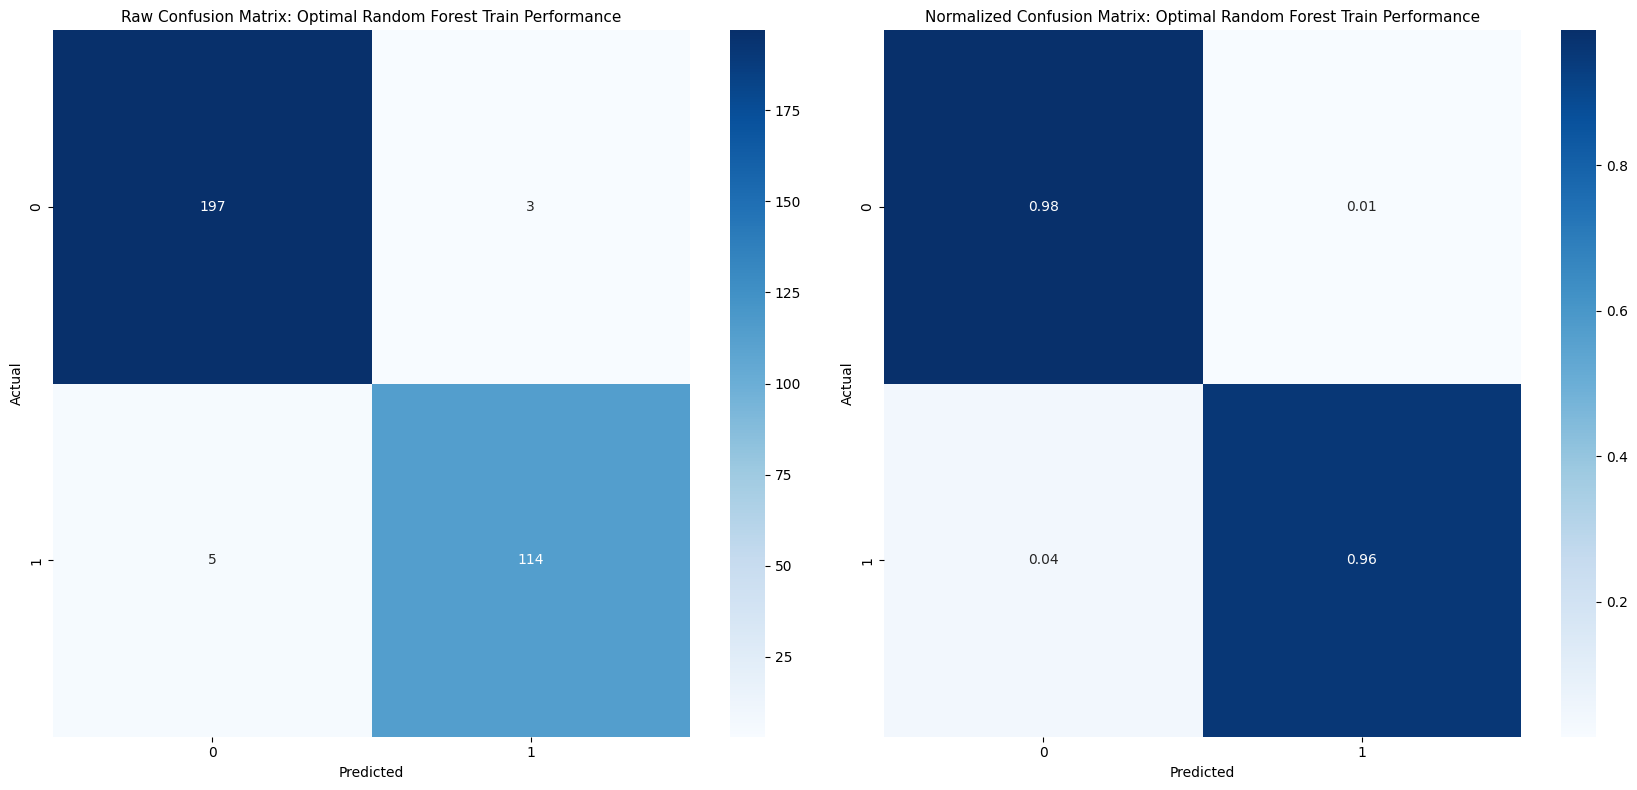

In [118]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_train_encoded, bagged_rf_optimal.predict(X_train))
cm_normalized = confusion_matrix(y_train_encoded, bagged_rf_optimal.predict(X_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Random Forest Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Random Forest Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [119]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {bagged_rf_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation_encoded, bagged_rf_optimal.predict(X_validation)))

F1 Score on Validation Data: 0.9067

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.97      0.85      0.91        40

    accuracy                           0.93       107
   macro avg       0.94      0.92      0.93       107
weighted avg       0.94      0.93      0.93       107



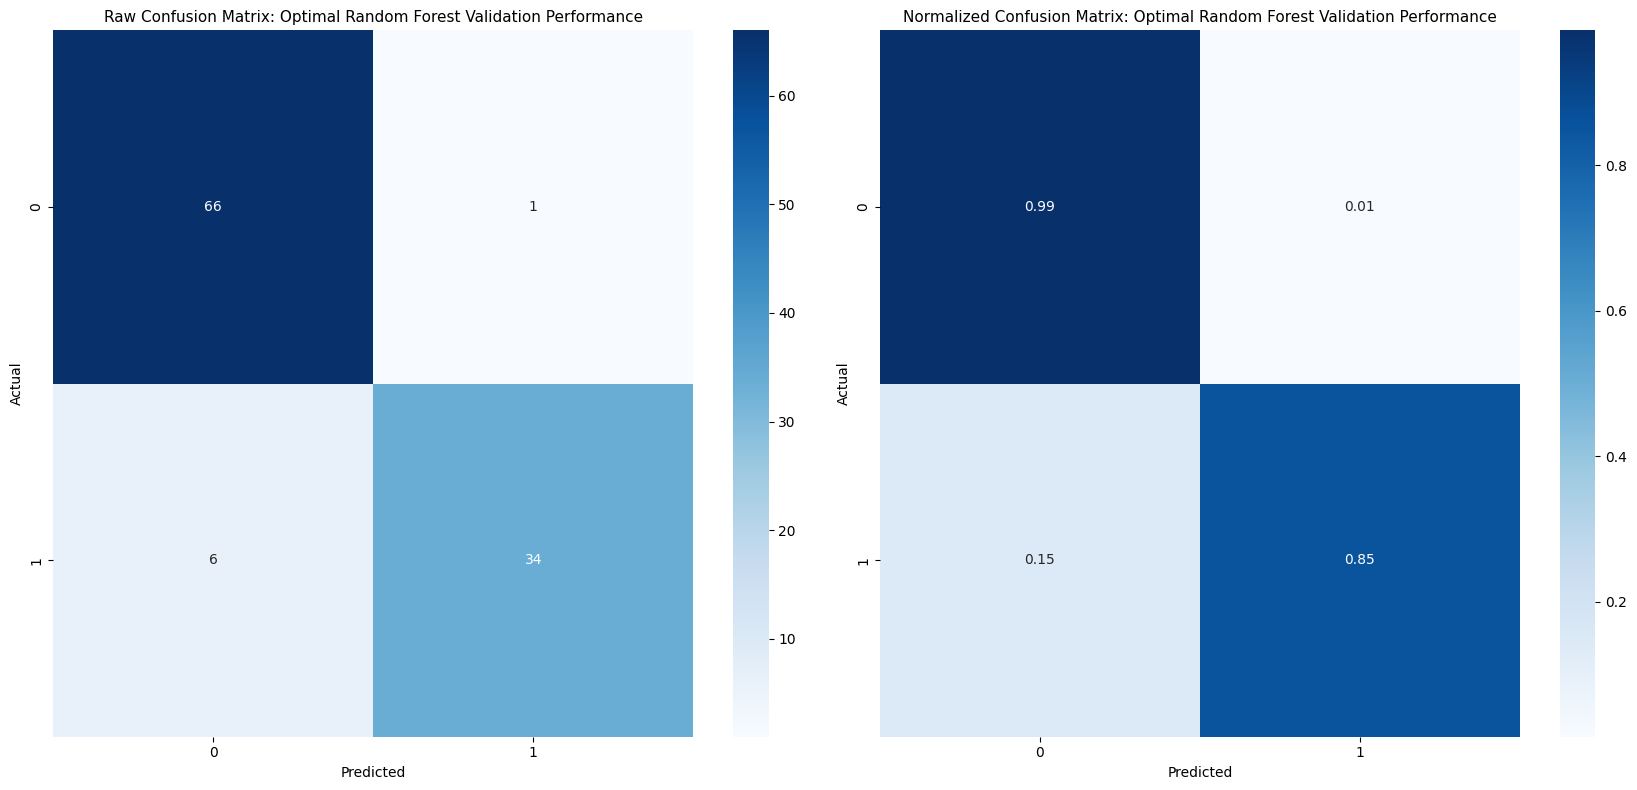

In [120]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation_encoded, bagged_rf_optimal.predict(X_validation))
cm_normalized = confusion_matrix(y_validation_encoded, bagged_rf_optimal.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Random Forest Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Random Forest Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [121]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
bagged_rf_optimal_train = model_performance_evaluation(y_train_encoded, bagged_rf_optimal.predict(X_train))
bagged_rf_optimal_train['model'] = ['bagged_rf_optimal'] * 5
bagged_rf_optimal_train['set'] = ['train'] * 5
print('Optimal Random Forest Train Performance Metrics: ')
display(bagged_rf_optimal_train)

Optimal Random Forest Train Performance Metrics: 


metric_name  metric_value              model    set
0    Accuracy      0.974922  bagged_rf_optimal  train
1   Precision      0.974359  bagged_rf_optimal  train
2      Recall      0.957983  bagged_rf_optimal  train
3          F1      0.966102  bagged_rf_optimal  train
4       AUROC      0.971492  bagged_rf_optimal  train

In [122]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
bagged_rf_optimal_validation = model_performance_evaluation(y_validation_encoded, bagged_rf_optimal.predict(X_validation))
bagged_rf_optimal_validation['model'] = ['bagged_rf_optimal'] * 5
bagged_rf_optimal_validation['set'] = ['validation'] * 5
print('Optimal Random Forest Validation Performance Metrics: ')
display(bagged_rf_optimal_validation)

Optimal Random Forest Validation Performance Metrics: 


metric_name  metric_value              model         set
0    Accuracy      0.934579  bagged_rf_optimal  validation
1   Precision      0.971429  bagged_rf_optimal  validation
2      Recall      0.850000  bagged_rf_optimal  validation
3          F1      0.906667  bagged_rf_optimal  validation
4       AUROC      0.917537  bagged_rf_optimal  validation

In [123]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(bagged_rf_optimal, 
            os.path.join("..", MODELS_PATH, "bagged_model_random_forest_optimal.pkl"))

['..\\models\\bagged_model_random_forest_optimal.pkl']

### 1.7.2 AdaBoost<a class="anchor" id="1.7.2"></a>

[AdaBoost (Adaptive Boosting)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) is a boosting technique that combines multiple weak learners — typically decision stumps (shallow trees) — to form a strong classifier. It works by iteratively training weak models, assigning higher weights to misclassified instances so that subsequent models focus on difficult cases. At each iteration, a new weak model is trained, and its predictions are combined using a weighted voting mechanism. This process continues until a stopping criterion is met, such as a predefined number of iterations or performance threshold. AdaBoost is advantageous because it improves accuracy without overfitting if regularized properly. It performs well with clean data and can transform weak classifiers into strong ones. However, it is sensitive to noisy data and outliers, as misclassified points receive higher importance, leading to potential overfitting. Additionally, training can be slow for large datasets, and performance depends on the choice of base learner, typically decision trees.

1. The [adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) model from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. 
2. The model contains 3 hyperparameters for tuning:
    * <span style="color: #FF0000">estimator_max_depth</span> = maximum depth of the tree made to vary between 1 and 2
    * <span style="color: #FF0000">learning_rate</span> = weight applied to each classifier at each boosting iteration made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">n_estimators</span> = maximum number of estimators at which boosting is terminated made to vary between 50 and 100
3. No any hyperparameter was defined in the model address the minimal 1.7:1 class imbalance observed between the B and M <span style="color: #FF0000">diagnosis</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">estimator_max_depth</span> = 2
    * <span style="color: #FF0000">learning_rate</span> = 0.10
    * <span style="color: #FF0000">n_estimators</span> = 100
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9937
    * **Precision** = 1.0000
    * **Recall** = 0.9831
    * **F1 Score** = 0.9915
    * **AUROC** = 0.9915
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9439
    * **Precision** = 0.9722
    * **Recall** = 0.8750
    * **F1 Score** = 0.9210
    * **AUROC** = 0.9300
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [124]:
##################################
# Defining the scaling and PCA preprocessing parameters
##################################
scaling_pca_preprocessor = Pipeline([
    ('scaler', StandardScaler()),           
    ('pca', PCA(n_components=10, random_state=987654321)) 
]) 

In [125]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_ab_pipeline = Pipeline([
    ('scaling_pca_preprocessor', scaling_pca_preprocessor),
    ('boosted_ab_model', AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=987654321),
                                            random_state=987654321))
])

In [126]:
##################################
# Defining hyperparameter grid
##################################
boosted_ab_hyperparameter_grid = {
    'boosted_ab_model__learning_rate': [0.01, 0.10],  
    'boosted_ab_model__estimator__max_depth': [1, 2],
    'boosted_ab_model__n_estimators': [50, 100]
}

In [127]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)

In [128]:
##################################
# Performing Grid Search with cross-validation
##################################
boosted_ab_grid_search = GridSearchCV(
    estimator=boosted_ab_pipeline,
    param_grid=boosted_ab_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

In [129]:
##################################
# Encoding the response variables
# for model training and validation
##################################
y_train_encoded = y_train.map({'B': 0, 'M': 1})
y_validation_encoded = y_validation.map({'B': 0, 'M': 1})

In [130]:
##################################
# Fitting GridSearchCV
##################################
boosted_ab_grid_search.fit(X_train, y_train_encoded)

Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('scaling_pca_preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('pca',
                                                         PCA(n_components=10,
                                                             random_state=987654321))])),
                                       ('boosted_ab_model',
                                        AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=987654321),
                                                           random_state=987654321))]),
             n_jobs=-1,
             param_grid={'boosted_ab_model__estimator__max_depth': [1, 2],
                         'boosted_ab_model__learning_rate': [0.01, 0.1],
                         'boosted_ab_model__n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [131]:
##################################
# Identifying the best model
##################################
boosted_ab_optimal = boosted_ab_grid_search.best_estimator_

In [132]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
boosted_ab_optimal_f1_cv = boosted_ab_grid_search.best_score_
boosted_ab_optimal_f1_train = f1_score(y_train_encoded, boosted_ab_optimal.predict(X_train))
boosted_ab_optimal_f1_validation = f1_score(y_validation_encoded, boosted_ab_optimal.predict(X_validation))

In [133]:
##################################
# Identifying the optimal model
##################################
print('Best Boosted Model - AdaBoost: ')
print(f"Best AdaBoost Hyperparameters: {boosted_ab_grid_search.best_params_}")

Best Boosted Model - AdaBoost: 
Best AdaBoost Hyperparameters: {'boosted_ab_model__estimator__max_depth': 2, 'boosted_ab_model__learning_rate': 0.1, 'boosted_ab_model__n_estimators': 100}


In [134]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {boosted_ab_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {boosted_ab_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_train_encoded, boosted_ab_optimal.predict(X_train)))


F1 Score on Cross-Validated Data: 0.9280
F1 Score on Training Data: 0.9915

Classification Report on Train Data:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       200
           1       1.00      0.98      0.99       119

    accuracy                           0.99       319
   macro avg       1.00      0.99      0.99       319
weighted avg       0.99      0.99      0.99       319



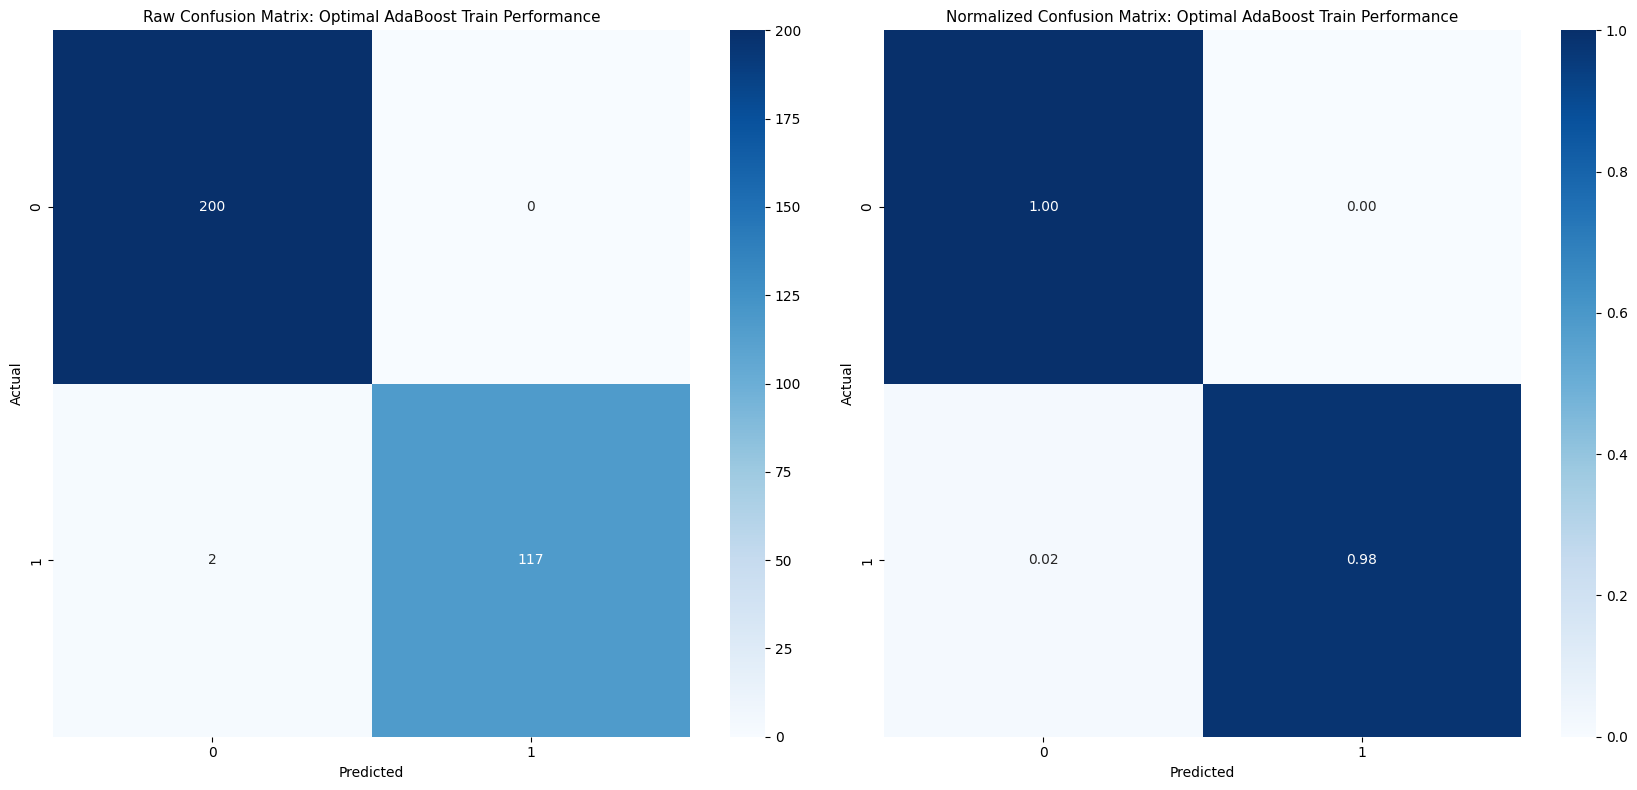

In [135]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_train_encoded, boosted_ab_optimal.predict(X_train))
cm_normalized = confusion_matrix(y_train_encoded, boosted_ab_optimal.predict(X_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal AdaBoost Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal AdaBoost Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [136]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {boosted_ab_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation_encoded, boosted_ab_optimal.predict(X_validation)))


F1 Score on Validation Data: 0.9211

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.97      0.88      0.92        40

    accuracy                           0.94       107
   macro avg       0.95      0.93      0.94       107
weighted avg       0.95      0.94      0.94       107



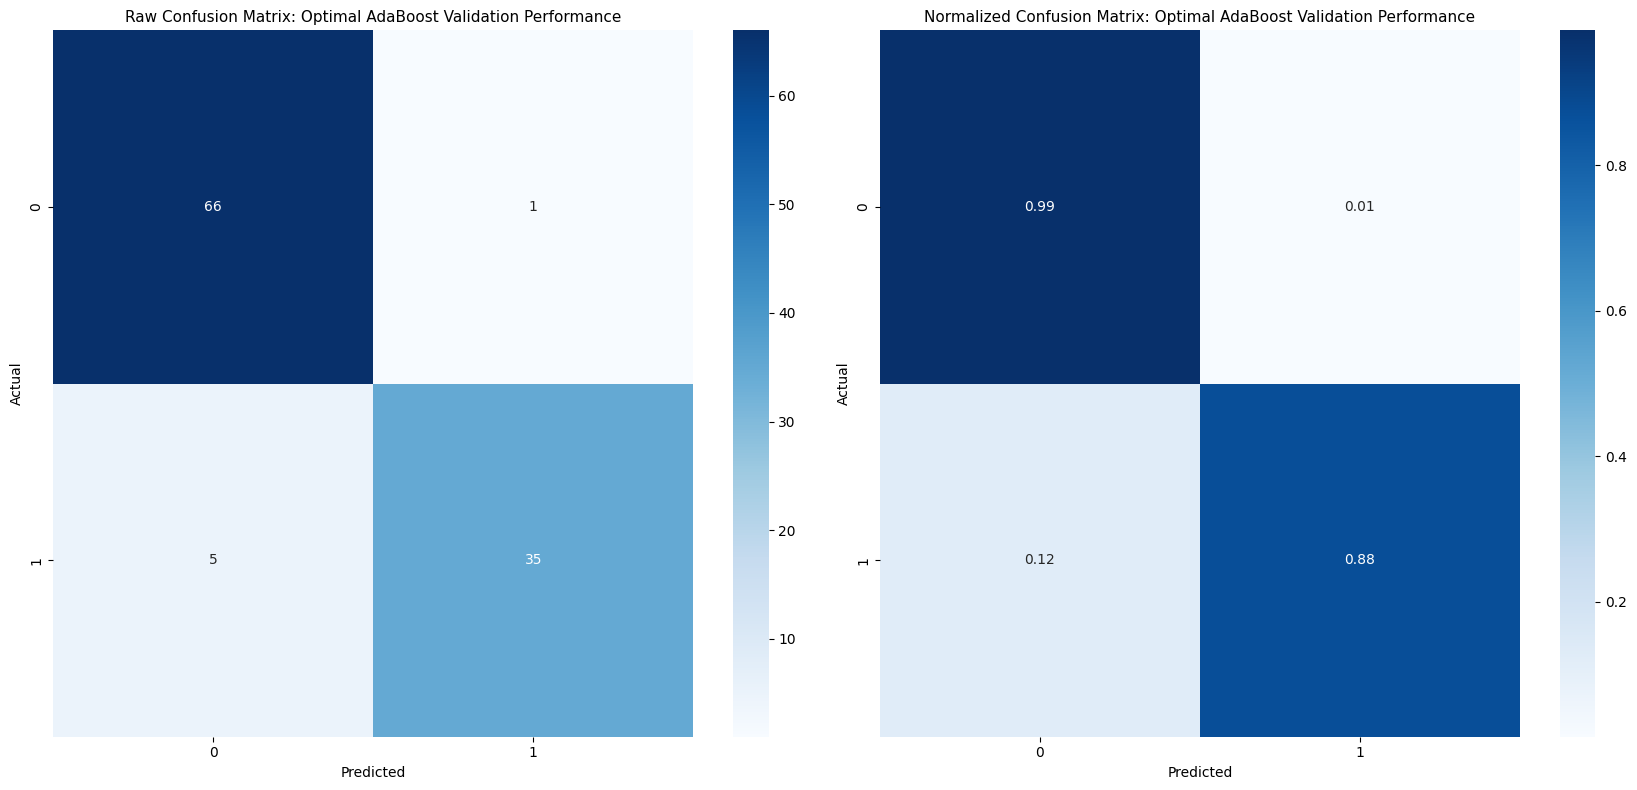

In [137]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation_encoded, boosted_ab_optimal.predict(X_validation))
cm_normalized = confusion_matrix(y_validation_encoded, boosted_ab_optimal.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal AdaBoost Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal AdaBoost Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [138]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
boosted_ab_optimal_train = model_performance_evaluation(y_train_encoded, boosted_ab_optimal.predict(X_train))
boosted_ab_optimal_train['model'] = ['boosted_ab_optimal'] * 5
boosted_ab_optimal_train['set'] = ['train'] * 5
print('Optimal AdaBoost Train Performance Metrics: ')
display(boosted_ab_optimal_train)

Optimal AdaBoost Train Performance Metrics: 


metric_name  metric_value               model    set
0    Accuracy      0.993730  boosted_ab_optimal  train
1   Precision      1.000000  boosted_ab_optimal  train
2      Recall      0.983193  boosted_ab_optimal  train
3          F1      0.991525  boosted_ab_optimal  train
4       AUROC      0.991597  boosted_ab_optimal  train

In [139]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
boosted_ab_optimal_validation = model_performance_evaluation(y_validation_encoded, boosted_ab_optimal.predict(X_validation))
boosted_ab_optimal_validation['model'] = ['boosted_ab_optimal'] * 5
boosted_ab_optimal_validation['set'] = ['validation'] * 5
print('Optimal AdaBoost Validation Performance Metrics: ')
display(boosted_ab_optimal_validation)


Optimal AdaBoost Validation Performance Metrics: 


metric_name  metric_value               model         set
0    Accuracy      0.943925  boosted_ab_optimal  validation
1   Precision      0.972222  boosted_ab_optimal  validation
2      Recall      0.875000  boosted_ab_optimal  validation
3          F1      0.921053  boosted_ab_optimal  validation
4       AUROC      0.930037  boosted_ab_optimal  validation

In [140]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(boosted_ab_optimal, 
            os.path.join("..", MODELS_PATH, "boosted_model_adaboost_optimal.pkl"))

['..\\models\\boosted_model_adaboost_optimal.pkl']

### 1.7.3 Gradient Boosting<a class="anchor" id="1.7.3"></a>

[Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) builds an ensemble of decision trees sequentially, where each new tree corrects the mistakes of the previous ones by optimizing a loss function. Unlike AdaBoost, which reweights misclassified instances, Gradient Boosting fits each new tree to the residual errors of the previous model, gradually improving predictions. This process continues until a stopping criterion, such as a set number of trees, is met. The key advantages of Gradient Boosting include its flexibility to model complex relationships and strong predictive performance, often outperforming bagging methods. It can handle both numeric and categorical data well. However, it is prone to overfitting if not carefully tuned, especially with deep trees and too many iterations. It is also computationally expensive due to sequential training, and hyperparameter tuning (e.g., learning rate, number of trees, tree depth) can be challenging and time-consuming.

1. The [gradient boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) model from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = shrinking proportion of the contribution from each tree made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to be at a leaf node made to vary between 5 and 10
    * <span style="color: #FF0000">n_estimators</span> = number of boosting stages to perform made to vary between 50 and 100
3. No any hyperparameter was defined in the model to address the minimal 1.7:1 class imbalance observed between the B and M <span style="color: #FF0000">diagnosis</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for:
    * <span style="color: #FF0000">learning_rate</span> = 0.10
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">min_samples_leaf</span> = 10
    * <span style="color: #FF0000">n_estimators</span> = 100
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 1.0000
    * **Precision** = 1.0000
    * **Recall** = 1.0000
    * **F1 Score** = 1.0000
    * **AUROC** = 1.0000
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9345
    * **Precision** = 0.9714
    * **Recall** = 0.8500
    * **F1 Score** = 0.9066
    * **AUROC** = 0.9175
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [141]:
##################################
# Defining the scaling and PCA preprocessing parameters
##################################
scaling_pca_preprocessor = Pipeline([
    ('scaler', StandardScaler()),           
    ('pca', PCA(n_components=10, random_state=987654321))  
])


In [142]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_gb_pipeline = Pipeline([
    ('scaling_pca_preprocessor', scaling_pca_preprocessor),
    ('boosted_gb_model', GradientBoostingClassifier(n_iter_no_change=10,
                                                    validation_fraction=0.1,
                                                    tol=1e-4,
                                                    random_state=987654321))
])


In [143]:
##################################
# Defining hyperparameter grid
##################################
boosted_gb_hyperparameter_grid = {
    'boosted_gb_model__learning_rate': [0.01, 0.10],
    'boosted_gb_model__max_depth': [3, 6], 
    'boosted_gb_model__min_samples_leaf': [5, 10],
    'boosted_gb_model__n_estimators': [50, 100] 
}

In [144]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)

In [145]:
##################################
# Performing Grid Search with cross-validation
##################################
boosted_gb_grid_search = GridSearchCV(
    estimator=boosted_gb_pipeline,
    param_grid=boosted_gb_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

In [146]:
##################################
# Encoding the response variables
# for model training and validation
##################################
y_train_encoded = y_train.map({'B': 0, 'M': 1})
y_validation_encoded = y_validation.map({'B': 0, 'M': 1})

In [147]:
##################################
# Fitting GridSearchCV
##################################
boosted_gb_grid_search.fit(X_train, y_train_encoded)

Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('scaling_pca_preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('pca',
                                                         PCA(n_components=10,
                                                             random_state=987654321))])),
                                       ('boosted_gb_model',
                                        GradientBoostingClassifier(n_iter_no_change=10,
                                                                   random_state=987654321))]),
             n_jobs=-1,
             param_grid={'boosted_gb_model__learning_rate': [0.01, 0.1],
                         'boosted_gb_model__max_depth': [3, 6],
                         'boosted_gb_model__min_samples_leaf': [5, 10],
                         'boosted_gb_model__n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [148]:
##################################
# Identifying the best model
##################################
boosted_gb_optimal = boosted_gb_grid_search.best_estimator_

In [149]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
boosted_gb_optimal_f1_cv = boosted_gb_grid_search.best_score_
boosted_gb_optimal_f1_train = f1_score(y_train_encoded, boosted_gb_optimal.predict(X_train))
boosted_gb_optimal_f1_validation = f1_score(y_validation_encoded, boosted_gb_optimal.predict(X_validation))

In [150]:
##################################
# Identifying the optimal model
##################################
print('Best Boosted Model - Gradient Boosting: ')
print(f"Best Gradient Boosting Hyperparameters: {boosted_gb_grid_search.best_params_}")

Best Boosted Model - Gradient Boosting: 
Best Gradient Boosting Hyperparameters: {'boosted_gb_model__learning_rate': 0.1, 'boosted_gb_model__max_depth': 3, 'boosted_gb_model__min_samples_leaf': 10, 'boosted_gb_model__n_estimators': 100}


In [151]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {boosted_gb_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {boosted_gb_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_train_encoded, boosted_gb_optimal.predict(X_train)))


F1 Score on Cross-Validated Data: 0.9330
F1 Score on Training Data: 1.0000

Classification Report on Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       119

    accuracy                           1.00       319
   macro avg       1.00      1.00      1.00       319
weighted avg       1.00      1.00      1.00       319



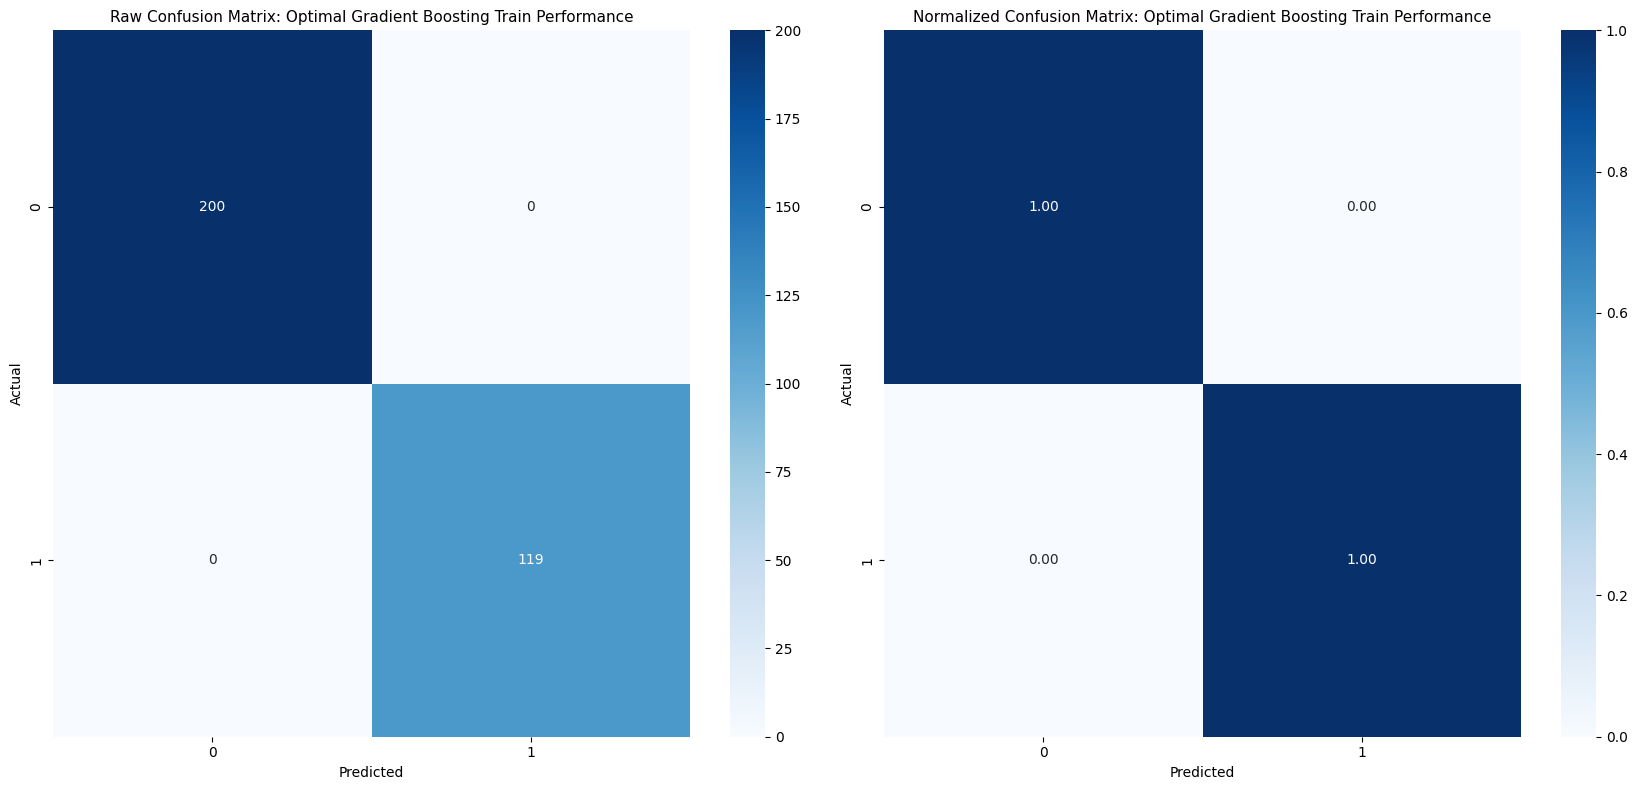

In [152]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_train_encoded, boosted_gb_optimal.predict(X_train))
cm_normalized = confusion_matrix(y_train_encoded, boosted_gb_optimal.predict(X_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Gradient Boosting Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Gradient Boosting Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [153]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {boosted_gb_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation_encoded, boosted_gb_optimal.predict(X_validation)))


F1 Score on Validation Data: 0.9067

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.97      0.85      0.91        40

    accuracy                           0.93       107
   macro avg       0.94      0.92      0.93       107
weighted avg       0.94      0.93      0.93       107



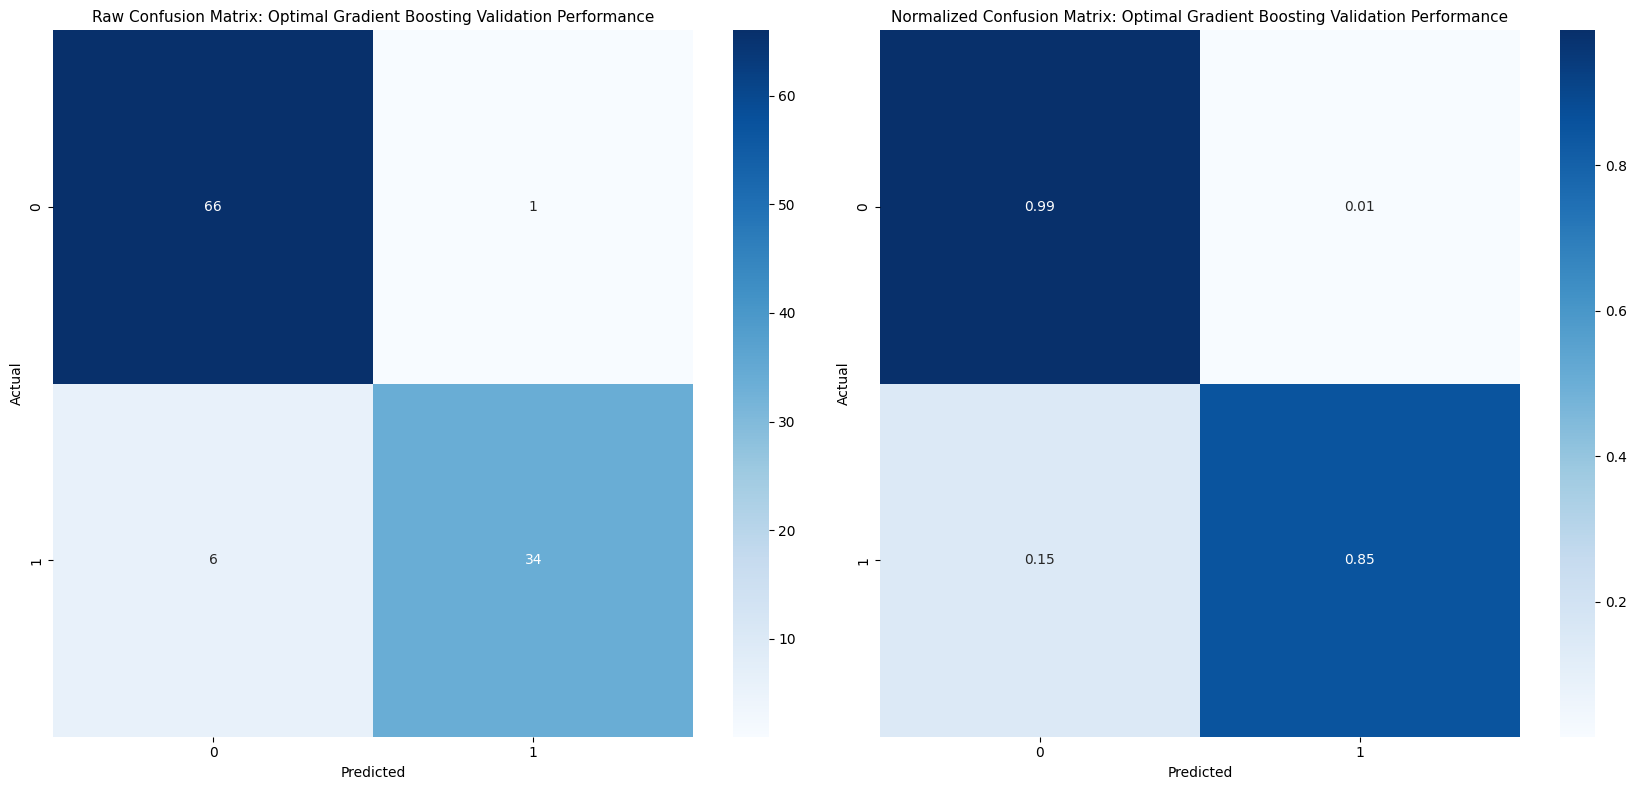

In [154]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation_encoded, boosted_gb_optimal.predict(X_validation))
cm_normalized = confusion_matrix(y_validation_encoded, boosted_gb_optimal.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Gradient Boosting Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Gradient Boosting Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [155]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
boosted_gb_optimal_train = model_performance_evaluation(y_train_encoded, boosted_gb_optimal.predict(X_train))
boosted_gb_optimal_train['model'] = ['boosted_gb_optimal'] * 5
boosted_gb_optimal_train['set'] = ['train'] * 5
print('Optimal Gradient Boosting Train Performance Metrics: ')
display(boosted_gb_optimal_train)

Optimal Gradient Boosting Train Performance Metrics: 


metric_name  metric_value               model    set
0    Accuracy           1.0  boosted_gb_optimal  train
1   Precision           1.0  boosted_gb_optimal  train
2      Recall           1.0  boosted_gb_optimal  train
3          F1           1.0  boosted_gb_optimal  train
4       AUROC           1.0  boosted_gb_optimal  train

In [156]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
boosted_gb_optimal_validation = model_performance_evaluation(y_validation_encoded, boosted_gb_optimal.predict(X_validation))
boosted_gb_optimal_validation['model'] = ['boosted_gb_optimal'] * 5
boosted_gb_optimal_validation['set'] = ['validation'] * 5
print('Optimal Gradient Boosting Validation Performance Metrics: ')
display(boosted_gb_optimal_validation)


Optimal Gradient Boosting Validation Performance Metrics: 


metric_name  metric_value               model         set
0    Accuracy      0.934579  boosted_gb_optimal  validation
1   Precision      0.971429  boosted_gb_optimal  validation
2      Recall      0.850000  boosted_gb_optimal  validation
3          F1      0.906667  boosted_gb_optimal  validation
4       AUROC      0.917537  boosted_gb_optimal  validation

In [157]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(boosted_gb_optimal, 
            os.path.join("..", MODELS_PATH, "boosted_model_gradient_boosting_optimal.pkl"))


['..\\models\\boosted_model_gradient_boosting_optimal.pkl']

### 1.7.4 XGBoost<a class="anchor" id="1.7.4"></a>

[XGBoost (Extreme Gradient Boosting)](https://xgboost.readthedocs.io/en/stable/python/index.html) is an optimized version of Gradient Boosting that introduces additional regularization and computational efficiencies. It builds decision trees sequentially, with each new tree correcting the residual errors of the previous ones, but it incorporates advanced techniques such as shrinkage (learning rate), column subsampling, and L1/L2 regularization to prevent overfitting. Additionally, XGBoost employs parallelization, reducing training time significantly compared to standard Gradient Boosting. It is widely used in machine learning competitions due to its superior accuracy and efficiency. The key advantages include its ability to handle missing data, built-in regularization for better generalization, and fast training through parallelization. However, XGBoost requires careful hyperparameter tuning to achieve optimal performance, and the model can become overly complex, making interpretation difficult. It is also memory-intensive, especially for large datasets, and can be challenging to deploy efficiently in real-time applications.

1. The [xgboost](https://xgboost.readthedocs.io/en/stable/python/index.html) model from the <mark style="background-color: #CCECFF"><b>xgboost</b></mark> Python library API was implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = step size at which weights are updated during training made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">gamma</span> = minimum loss reduction required to make a further split in a tree made to vary between 0.10 and 0.20
    * <span style="color: #FF0000">n_estimators</span> = number of boosting stages to perform made to vary between 50 and 100
3.  A special hyperparameter (<span style="color: #FF0000">scale_pos_weight</span> = 1.7) was fixed to address the minimal 1.7:1 class imbalance observed between the B and M <span style="color: #FF0000">diagnosis</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for:
    * <span style="color: #FF0000">learning_rate</span> = 0.10
    * <span style="color: #FF0000">max_depth</span> = 6
    * <span style="color: #FF0000">gamma</span> 0.20
    * <span style="color: #FF0000">n_estimators</span> = 100
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 1.0000
    * **Precision** = 1.0000
    * **Recall** = 1.0000
    * **F1 Score** = 1.0000
    * **AUROC** = 1.0000
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9439
    * **Precision** = 0.9722
    * **Recall** = 0.8750
    * **F1 Score** = 0.9210
    * **AUROC** = 0.9300
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [158]:
##################################
# Defining the scaling and PCA preprocessing parameters
##################################
scaling_pca_preprocessor = Pipeline([
    ('scaler', StandardScaler()),           
    ('pca', PCA(n_components=10, random_state=987654321))  
])

In [159]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_xgb_pipeline = Pipeline([
    ('scaling_pca_preprocessor', scaling_pca_preprocessor),
    ('boosted_xgb_model', XGBClassifier(scale_pos_weight=1.7, 
                                        random_state=987654321,
                                        subsample=0.7,
                                        colsample_bytree=0.7,
                                        eval_metric='logloss'))
])

In [160]:
##################################
# Defining hyperparameter grid
##################################
boosted_xgb_hyperparameter_grid = {
    'boosted_xgb_model__learning_rate': [0.01, 0.10],
    'boosted_xgb_model__max_depth': [3, 6], 
    'boosted_xgb_model__gamma': [0.1, 0.2],
    'boosted_xgb_model__n_estimators': [50, 100]
}

In [161]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)

In [162]:
##################################
# Performing Grid Search with cross-validation
##################################
boosted_xgb_grid_search = GridSearchCV(
    estimator=boosted_xgb_pipeline,
    param_grid=boosted_xgb_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

In [163]:
##################################
# Encoding the response variables
# for model training and validation
##################################
y_train_encoded = y_train.map({'B': 0, 'M': 1})
y_validation_encoded = y_validation.map({'B': 0, 'M': 1})

In [164]:
##################################
# Fitting GridSearchCV
##################################
boosted_xgb_grid_search.fit(X_train, y_train_encoded)

Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('scaling_pca_preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('pca',
                                                         PCA(n_components=10,
                                                             random_state=987654321))])),
                                       ('boosted_xgb_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsampl...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=987654321, ...))]),
             n_jobs=-1,
             param_grid={'boosted_xgb_model__gamma': [0.1, 0.2],
                         'boosted_xgb_model__learning_rate': [0.01, 0.1],
                         'boosted_xgb_model__max_depth': [3, 6],
                         'boosted_xgb_model__n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [165]:
##################################
# Identifying the best model
##################################
boosted_xgb_optimal = boosted_xgb_grid_search.best_estimator_

In [166]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
boosted_xgb_optimal_f1_cv = boosted_xgb_grid_search.best_score_
boosted_xgb_optimal_f1_train = f1_score(y_train_encoded, boosted_xgb_optimal.predict(X_train))
boosted_xgb_optimal_f1_validation = f1_score(y_validation_encoded, boosted_xgb_optimal.predict(X_validation))


In [167]:
##################################
# Identifying the optimal model
##################################
print('Best Boosted Model - XGBoost: ')
print(f"Best XGBoost Hyperparameters: {boosted_xgb_grid_search.best_params_}")


Best Boosted Model - XGBoost: 
Best XGBoost Hyperparameters: {'boosted_xgb_model__gamma': 0.2, 'boosted_xgb_model__learning_rate': 0.1, 'boosted_xgb_model__max_depth': 6, 'boosted_xgb_model__n_estimators': 100}


In [168]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {boosted_xgb_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {boosted_xgb_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_train_encoded, boosted_xgb_optimal.predict(X_train)))


F1 Score on Cross-Validated Data: 0.9461
F1 Score on Training Data: 1.0000

Classification Report on Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       119

    accuracy                           1.00       319
   macro avg       1.00      1.00      1.00       319
weighted avg       1.00      1.00      1.00       319



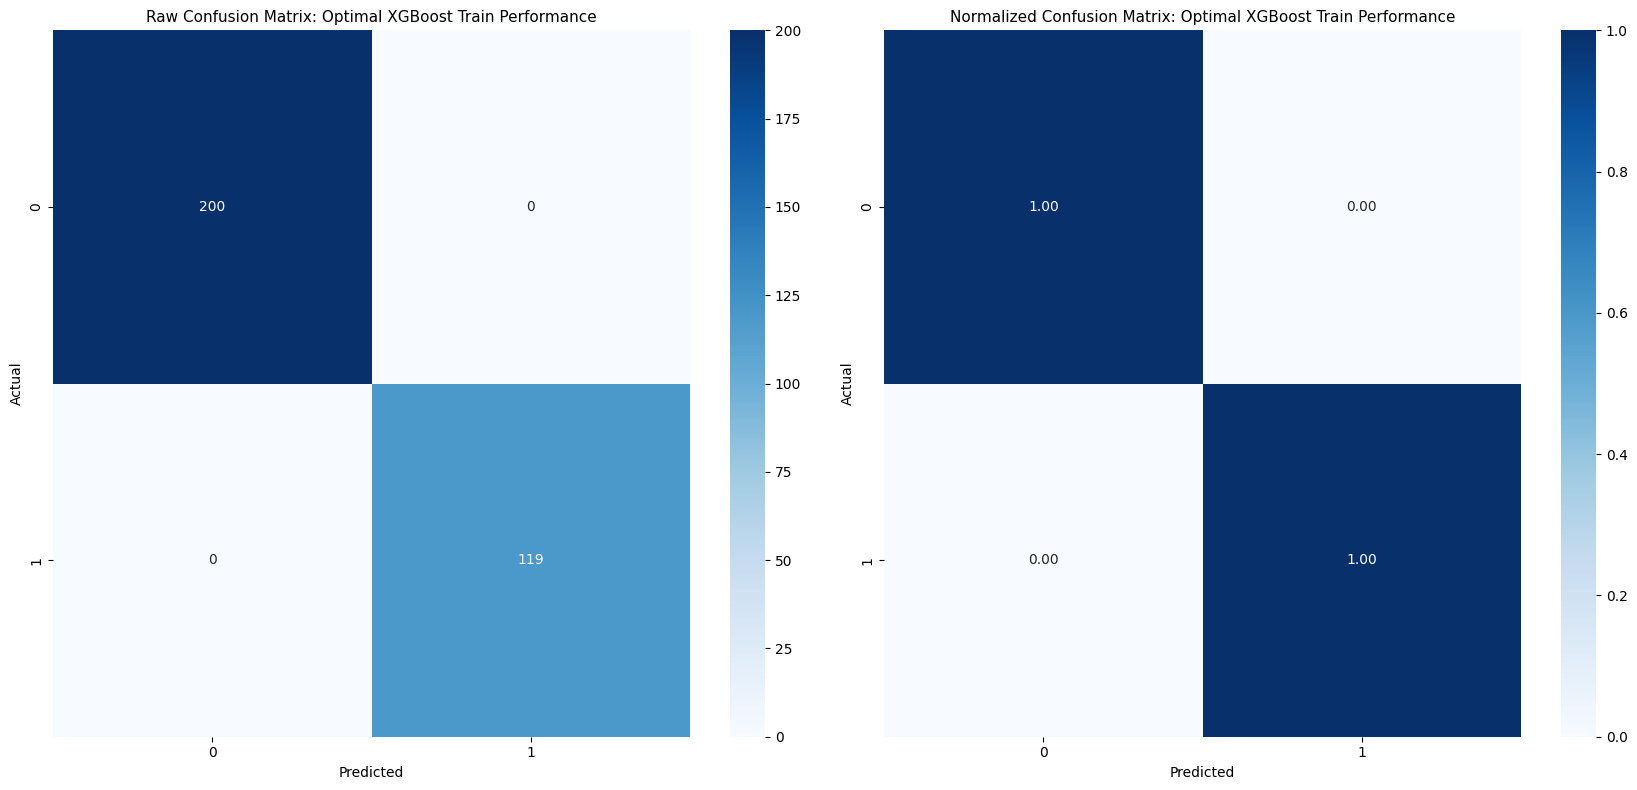

In [169]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_train_encoded, boosted_xgb_optimal.predict(X_train))
cm_normalized = confusion_matrix(y_train_encoded, boosted_xgb_optimal.predict(X_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal XGBoost Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal XGBoost Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [170]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {boosted_xgb_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation_encoded, boosted_xgb_optimal.predict(X_validation)))


F1 Score on Validation Data: 0.9211

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.97      0.88      0.92        40

    accuracy                           0.94       107
   macro avg       0.95      0.93      0.94       107
weighted avg       0.95      0.94      0.94       107



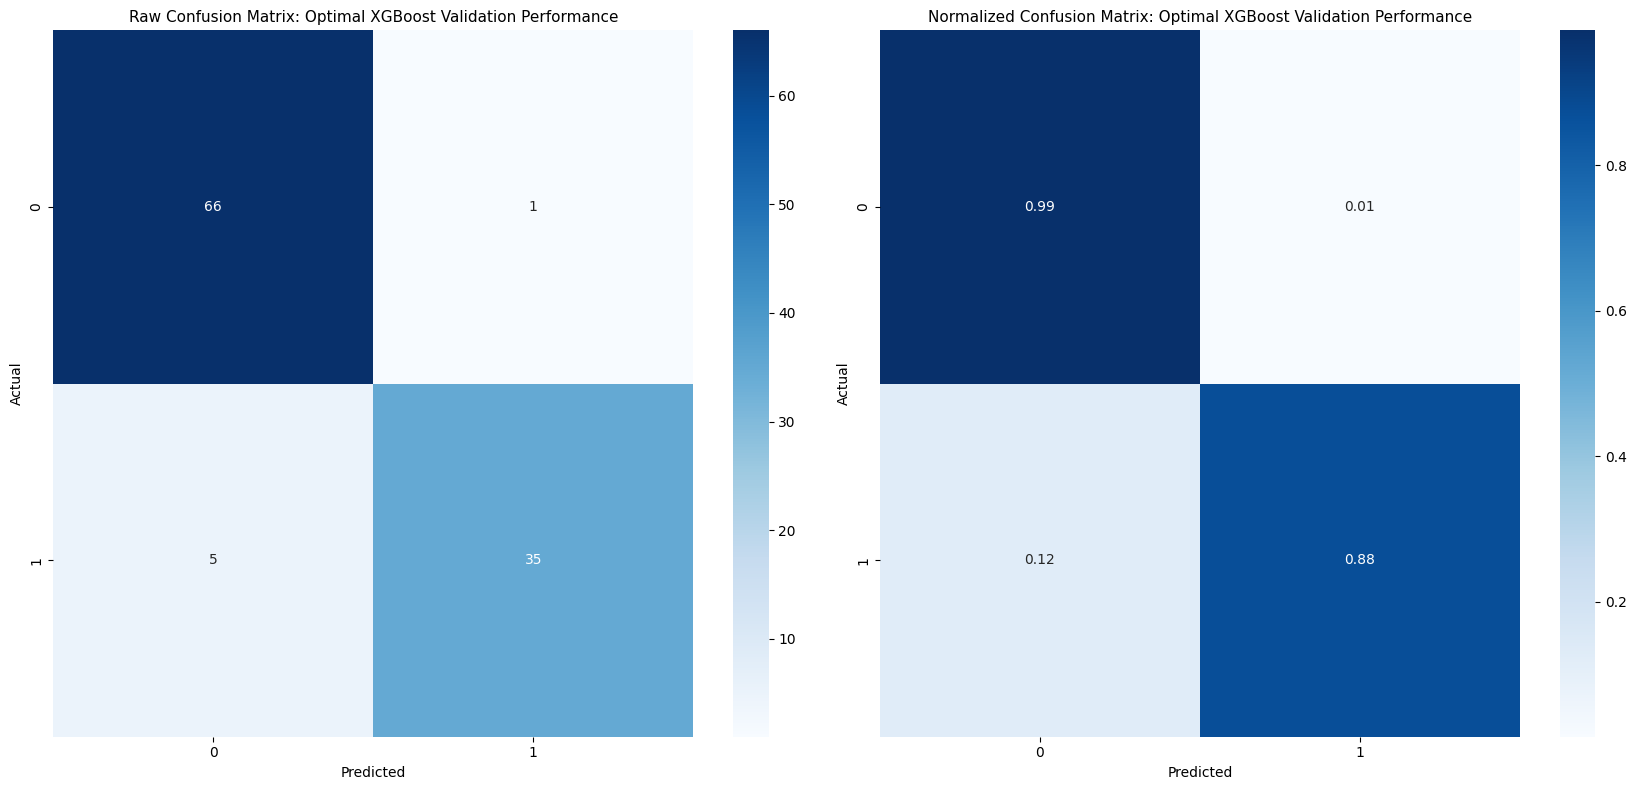

In [171]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation_encoded, boosted_xgb_optimal.predict(X_validation))
cm_normalized = confusion_matrix(y_validation_encoded, boosted_xgb_optimal.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal XGBoost Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal XGBoost Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [172]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
boosted_xgb_optimal_train = model_performance_evaluation(y_train_encoded, boosted_xgb_optimal.predict(X_train))
boosted_xgb_optimal_train['model'] = ['boosted_xgb_optimal'] * 5
boosted_xgb_optimal_train['set'] = ['train'] * 5
print('Optimal XGBoost Train Performance Metrics: ')
display(boosted_xgb_optimal_train)


Optimal XGBoost Train Performance Metrics: 


metric_name  metric_value                model    set
0    Accuracy           1.0  boosted_xgb_optimal  train
1   Precision           1.0  boosted_xgb_optimal  train
2      Recall           1.0  boosted_xgb_optimal  train
3          F1           1.0  boosted_xgb_optimal  train
4       AUROC           1.0  boosted_xgb_optimal  train

In [173]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
boosted_xgb_optimal_validation = model_performance_evaluation(y_validation_encoded, boosted_xgb_optimal.predict(X_validation))
boosted_xgb_optimal_validation['model'] = ['boosted_xgb_optimal'] * 5
boosted_xgb_optimal_validation['set'] = ['validation'] * 5
print('Optimal XGBoost Validation Performance Metrics: ')
display(boosted_xgb_optimal_validation)


Optimal XGBoost Validation Performance Metrics: 


metric_name  metric_value                model         set
0    Accuracy      0.943925  boosted_xgb_optimal  validation
1   Precision      0.972222  boosted_xgb_optimal  validation
2      Recall      0.875000  boosted_xgb_optimal  validation
3          F1      0.921053  boosted_xgb_optimal  validation
4       AUROC      0.930037  boosted_xgb_optimal  validation

In [174]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(boosted_xgb_optimal, 
            os.path.join("..", MODELS_PATH, "boosted_model_xgboost_optimal.pkl"))


['..\\models\\boosted_model_xgboost_optimal.pkl']

# 1.7.5 Light GBM<a class="anchor" id="1.7.5"></a>

[Light GBM (Light Gradient Boosting Machine)](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) is a variation of Gradient Boosting designed for efficiency and scalability. Unlike traditional boosting methods that grow trees level by level, LightGBM grows trees leaf-wise, choosing the most informative splits, leading to faster convergence. It also uses histogram-based binning to speed up computations. These optimizations allow LightGBM to train on large datasets efficiently while maintaining high accuracy. Its advantages include faster training speed, reduced memory usage, and strong predictive performance, particularly for large datasets with many features. However, LightGBM can overfit more easily than XGBoost if not properly tuned, and it may not perform as well on small datasets. Additionally, its handling of categorical variables requires careful preprocessing, and the leaf-wise tree growth can sometimes lead to instability if not controlled properly.

1. The [light gbm](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) model from the <mark style="background-color: #CCECFF"><b>lightgbm</b></mark> Python library API was implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = step size at which weights are updated during training made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">min_child_samples</span> = minimum number of data needed in a child 3 and 6
    * <span style="color: #FF0000">num_leaves</span> = maximum tree leaves for base learners made to vary between 8 and 16
    * <span style="color: #FF0000">n_estimators</span> = number of boosted trees to fit made to vary between 50 and 100
3.  A special hyperparameter (<span style="color: #FF0000">scale_pos_weight</span> = 1.7) was fixed to address the minimal 1.7:1 class imbalance observed between the B and M <span style="color: #FF0000">diagnosis</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for:
    * <span style="color: #FF0000">learning_rate</span> = 0.10
    * <span style="color: #FF0000">min_child_samples</span> = 6
    * <span style="color: #FF0000">num_leaves</span> 16
    * <span style="color: #FF0000">n_estimators</span> = 50
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 1.0000
    * **Precision** = 1.0000
    * **Recall** = 1.0000
    * **F1 Score** = 1.0000
    * **AUROC** = 1.0000
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9532
    * **Precision** = 0.9729
    * **Recall** = 0.9000
    * **F1 Score** = 0.9350
    * **AUROC** = 0.9425
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [175]:
##################################
# Defining the scaling and PCA preprocessing parameters
##################################
scaling_pca_preprocessor = Pipeline([
    ('scaler', StandardScaler()),           
    ('pca', PCA(n_components=10, random_state=987654321))  
])


In [176]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_lgbm_pipeline = Pipeline([
    ('scaling_pca_preprocessor', scaling_pca_preprocessor),
    ('boosted_lgbm_model', LGBMClassifier(scale_pos_weight=1.7, 
                                          random_state=987654321,
                                          max_depth=-1,
                                          feature_fraction =0.7,
                                          bagging_fraction=0.7,
                                          verbose=-1))
])


In [177]:
##################################
# Defining hyperparameter grid
##################################
boosted_lgbm_hyperparameter_grid = {
    'boosted_lgbm_model__learning_rate': [0.01, 0.10],
    'boosted_lgbm_model__min_child_samples': [3, 6], 
    'boosted_lgbm_model__num_leaves': [8, 16],
    'boosted_lgbm_model__n_estimators': [50, 100] 
}

In [178]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [179]:
##################################
# Performing Grid Search with cross-validation
##################################
boosted_lgbm_grid_search = GridSearchCV(
    estimator=boosted_lgbm_pipeline,
    param_grid=boosted_lgbm_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

In [180]:
##################################
# Encoding the response variables
# for model training and validation
##################################
y_train_encoded = y_train.map({'B': 0, 'M': 1})
y_validation_encoded = y_validation.map({'B': 0, 'M': 1})

In [181]:
##################################
# Fitting GridSearchCV
##################################
boosted_lgbm_grid_search.fit(X_train, y_train_encoded)


Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('scaling_pca_preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('pca',
                                                         PCA(n_components=10,
                                                             random_state=987654321))])),
                                       ('boosted_lgbm_model',
                                        LGBMClassifier(bagging_fraction=0.7,
                                                       feature_fraction=0.7,
                                                       random_state=987654321,
                                                       scale_pos_weight=1.7,
                                                       verbose=-1))]),
             n_jobs=-1,
             param_grid={'boosted_lgbm_model__learning_rate': [0.01, 0.1],
                         'boosted_lgbm_model__min_child_samples': [3, 6],
                         'boosted_lgbm_model__n_estimators': [50, 100],
                         'boosted_lgbm_model__num_leaves': [8, 16]},
             scoring='f1', verbose=1)

In [182]:
##################################
# Identifying the best model
##################################
boosted_lgbm_optimal = boosted_lgbm_grid_search.best_estimator_


In [183]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
boosted_lgbm_optimal_f1_cv = boosted_lgbm_grid_search.best_score_
boosted_lgbm_optimal_f1_train = f1_score(y_train_encoded, boosted_lgbm_optimal.predict(X_train))
boosted_lgbm_optimal_f1_validation = f1_score(y_validation_encoded, boosted_lgbm_optimal.predict(X_validation))


In [184]:
##################################
# Identifying the optimal model
##################################
print('Best Boosted Model - Light GBM: ')
print(f"Best Light GBM Hyperparameters: {boosted_lgbm_grid_search.best_params_}")


Best Boosted Model - Light GBM: 
Best Light GBM Hyperparameters: {'boosted_lgbm_model__learning_rate': 0.1, 'boosted_lgbm_model__min_child_samples': 6, 'boosted_lgbm_model__n_estimators': 50, 'boosted_lgbm_model__num_leaves': 16}


In [185]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {boosted_lgbm_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {boosted_lgbm_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_train_encoded, boosted_lgbm_optimal.predict(X_train)))


F1 Score on Cross-Validated Data: 0.9385
F1 Score on Training Data: 1.0000

Classification Report on Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       119

    accuracy                           1.00       319
   macro avg       1.00      1.00      1.00       319
weighted avg       1.00      1.00      1.00       319



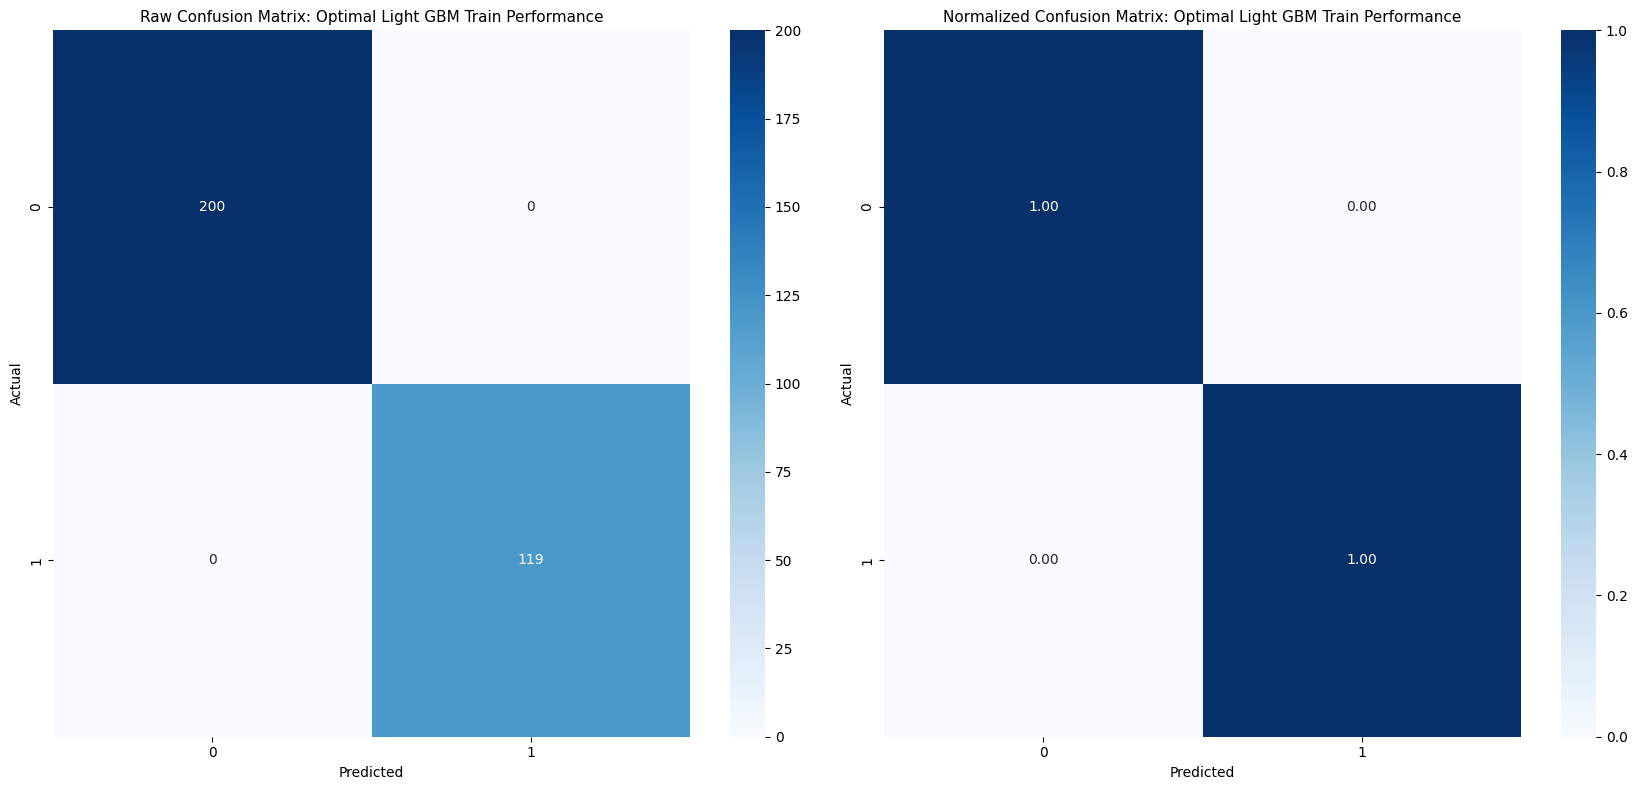

In [186]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_train_encoded, boosted_lgbm_optimal.predict(X_train))
cm_normalized = confusion_matrix(y_train_encoded, boosted_lgbm_optimal.predict(X_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Light GBM Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Light GBM Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [187]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {boosted_lgbm_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation_encoded, boosted_lgbm_optimal.predict(X_validation)))


F1 Score on Validation Data: 0.9351

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.97      0.90      0.94        40

    accuracy                           0.95       107
   macro avg       0.96      0.94      0.95       107
weighted avg       0.95      0.95      0.95       107



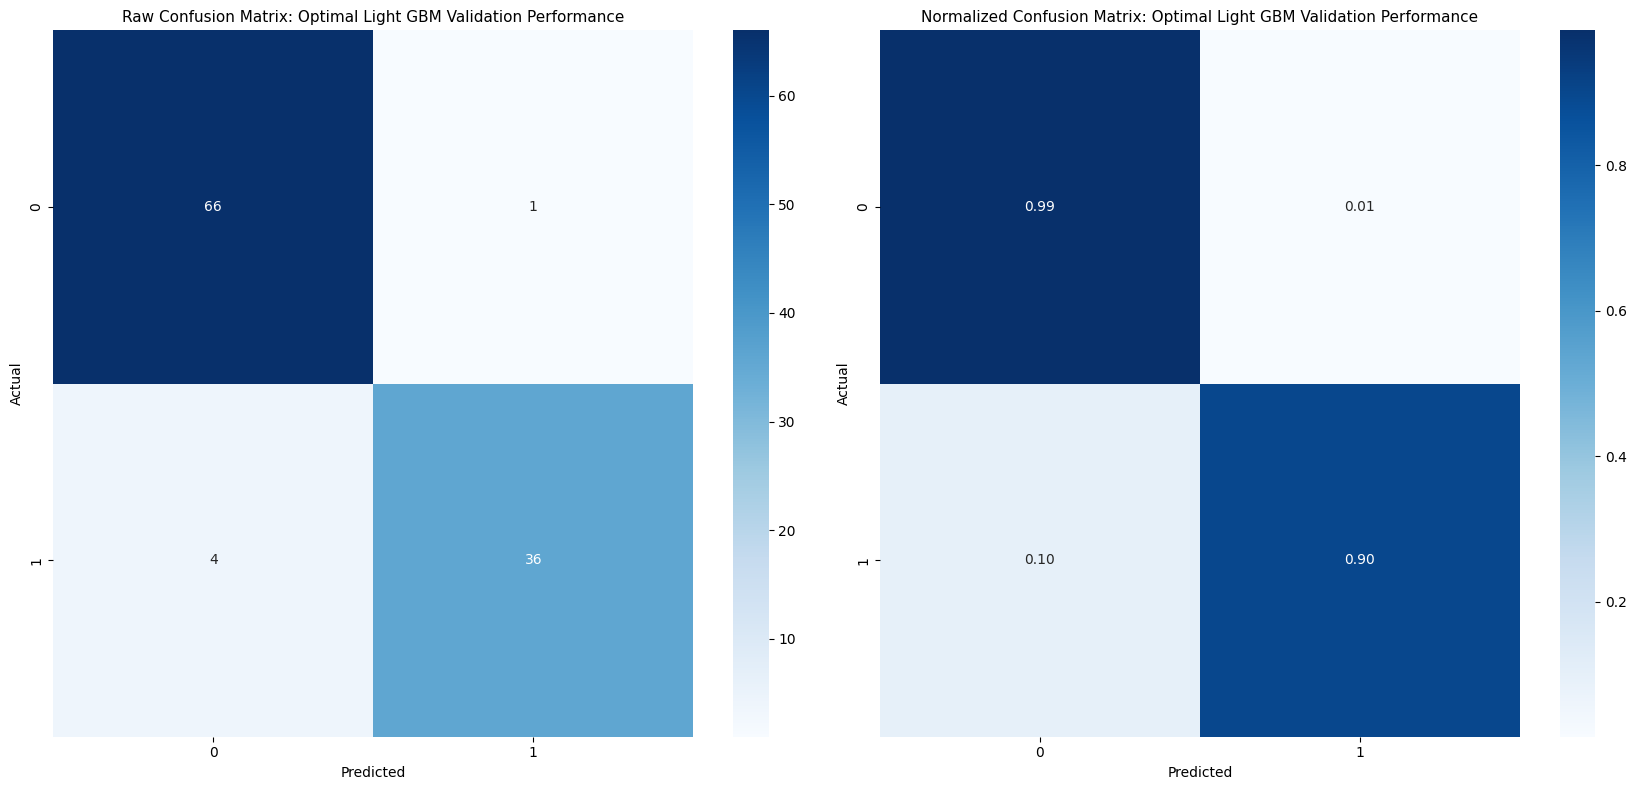

In [188]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation_encoded, boosted_lgbm_optimal.predict(X_validation))
cm_normalized = confusion_matrix(y_validation_encoded, boosted_lgbm_optimal.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Light GBM Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Light GBM Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [189]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
boosted_lgbm_optimal_train = model_performance_evaluation(y_train_encoded, boosted_lgbm_optimal.predict(X_train))
boosted_lgbm_optimal_train['model'] = ['boosted_lgbm_optimal'] * 5
boosted_lgbm_optimal_train['set'] = ['train'] * 5
print('Optimal Light GBM Train Performance Metrics: ')
display(boosted_lgbm_optimal_train)


Optimal Light GBM Train Performance Metrics: 


metric_name  metric_value                 model    set
0    Accuracy           1.0  boosted_lgbm_optimal  train
1   Precision           1.0  boosted_lgbm_optimal  train
2      Recall           1.0  boosted_lgbm_optimal  train
3          F1           1.0  boosted_lgbm_optimal  train
4       AUROC           1.0  boosted_lgbm_optimal  train

In [190]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
boosted_lgbm_optimal_validation = model_performance_evaluation(y_validation_encoded, boosted_lgbm_optimal.predict(X_validation))
boosted_lgbm_optimal_validation['model'] = ['boosted_lgbm_optimal'] * 5
boosted_lgbm_optimal_validation['set'] = ['validation'] * 5
print('Optimal Light GBM Validation Performance Metrics: ')
display(boosted_lgbm_optimal_validation)


Optimal Light GBM Validation Performance Metrics: 


metric_name  metric_value                 model         set
0    Accuracy      0.953271  boosted_lgbm_optimal  validation
1   Precision      0.972973  boosted_lgbm_optimal  validation
2      Recall      0.900000  boosted_lgbm_optimal  validation
3          F1      0.935065  boosted_lgbm_optimal  validation
4       AUROC      0.942537  boosted_lgbm_optimal  validation

In [191]:
################################## 
joblib.dump(boosted_lgbm_optimal, 
            os.path.join("..", MODELS_PATH, "boosted_model_light_gbm_optimal.pkl"))


['..\\models\\boosted_model_light_gbm_optimal.pkl']

### 1.7.6 CatBoost<a class="anchor" id="1.7.6"></a>

[CatBoost (Categorical Boosting)](https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier) is a boosting algorithm optimized for categorical data. Unlike other gradient boosting methods that require categorical variables to be manually encoded, CatBoost handles them natively, reducing preprocessing effort and improving performance. It builds decision trees iteratively, like other boosting methods, but uses ordered boosting to prevent target leakage and enhance generalization. The main advantages of CatBoost are its ability to handle categorical data without extensive preprocessing, high accuracy with minimal tuning, and robustness against overfitting due to built-in regularization. Additionally, it is relatively fast and memory-efficient. However, CatBoost can still be slower than LightGBM on very large datasets, and while it requires less tuning, improper parameter selection can lead to suboptimal performance. Its internal mechanics, such as ordered boosting, make interpretation more complex compared to simpler models.

1. The [catboost](https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier) model from the <mark style="background-color: #CCECFF"><b>catboost</b></mark> Python library API was implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = step size at which weights are updated during training made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">max_depth</span> = maximum depth of each decision tree in the boosting process made to vary between 3 and 6
    * <span style="color: #FF0000">num_leaves</span> = maximum tree leaves for base learners made to vary between 8 and 16
    * <span style="color: #FF0000">iterations</span> = number of boosted trees to fit made to vary between 50 and 100
3.  A special hyperparameter (<span style="color: #FF0000">scale_pos_weight</span> = 1.7) was fixed to address the minimal 1.7:1 class imbalance observed between the B and M <span style="color: #FF0000">diagnosis</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for:
    * <span style="color: #FF0000">learning_rate</span> = 0.1
    * <span style="color: #FF0000">min_child_samples</span> = 6
    * <span style="color: #FF0000">num_leaves</span> = 8
    * <span style="color: #FF0000">n_estimators</span> = 100
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9968
    * **Precision** = 0.9916
    * **Recall** = 1.0000
    * **F1 Score** = 0.9958
    * **AUROC** = 0.9975
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9626
    * **Precision** = 0.9736
    * **Recall** = 0.9250
    * **F1 Score** = 0.9487
    * **AUROC** = 0.9550
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [192]:
##################################
# Defining the scaling and PCA preprocessing parameters
##################################
scaling_pca_preprocessor = Pipeline([
    ('scaler', StandardScaler()),           
    ('pca', PCA(n_components=10, random_state=987654321))  
])


In [193]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_cb_pipeline = Pipeline([
    ('scaling_pca_preprocessor', scaling_pca_preprocessor),
    ('boosted_cb_model', CatBoostClassifier(scale_pos_weight=2.0, 
                                            random_state=987654321,
                                            subsample =0.7,
                                            colsample_bylevel=0.7,
                                            grow_policy='Lossguide',
                                            verbose=0,
                                            allow_writing_files=False))
])


In [194]:
##################################
# Defining hyperparameter grid
##################################
boosted_cb_hyperparameter_grid = {
    'boosted_cb_model__learning_rate': [0.01, 0.10],
    'boosted_cb_model__max_depth': [3, 6], 
    'boosted_cb_model__num_leaves': [8, 16],
    'boosted_cb_model__iterations': [50, 100]
}


In [195]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [196]:
##################################
# Performing Grid Search with cross-validation
##################################
boosted_cb_grid_search = GridSearchCV(
    estimator=boosted_cb_pipeline,
    param_grid=boosted_cb_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [197]:
##################################
# Encoding the response variables
# for model training and validation
##################################
y_train_encoded = y_train.map({'B': 0, 'M': 1})
y_validation_encoded = y_validation.map({'B': 0, 'M': 1})


In [198]:
##################################
# Fitting GridSearchCV
##################################
boosted_cb_grid_search.fit(X_train, y_train_encoded)


Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('scaling_pca_preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('pca',
                                                         PCA(n_components=10,
                                                             random_state=987654321))])),
                                       ('boosted_cb_model',
                                        <catboost.core.CatBoostClassifier object at 0x000001CD91C0AC30>)]),
             n_jobs=-1,
             param_grid={'boosted_cb_model__iterations': [50, 100],
                         'boosted_cb_model__learning_rate': [0.01, 0.1],
                         'boosted_cb_model__max_depth': [3, 6],
                         'boosted_cb_model__num_leaves': [8, 16]},
             scoring='f1', verbose=1)

In [199]:
##################################
# Identifying the best model
##################################
boosted_cb_optimal = boosted_cb_grid_search.best_estimator_


In [200]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
boosted_cb_optimal_f1_cv = boosted_cb_grid_search.best_score_
boosted_cb_optimal_f1_train = f1_score(y_train_encoded, boosted_cb_optimal.predict(X_train))
boosted_cb_optimal_f1_validation = f1_score(y_validation_encoded, boosted_cb_optimal.predict(X_validation))


In [201]:
##################################
# Identifying the optimal model
##################################
print('Best Boosted Model - CatBoost: ')
print(f"Best CatBoost Hyperparameters: {boosted_cb_grid_search.best_params_}")


Best Boosted Model - CatBoost: 
Best CatBoost Hyperparameters: {'boosted_cb_model__iterations': 100, 'boosted_cb_model__learning_rate': 0.1, 'boosted_cb_model__max_depth': 6, 'boosted_cb_model__num_leaves': 8}


In [202]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {boosted_cb_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {boosted_cb_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_train_encoded, boosted_cb_optimal.predict(X_train)))


F1 Score on Cross-Validated Data: 0.9295
F1 Score on Training Data: 0.9958

Classification Report on Train Data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       0.99      1.00      1.00       119

    accuracy                           1.00       319
   macro avg       1.00      1.00      1.00       319
weighted avg       1.00      1.00      1.00       319



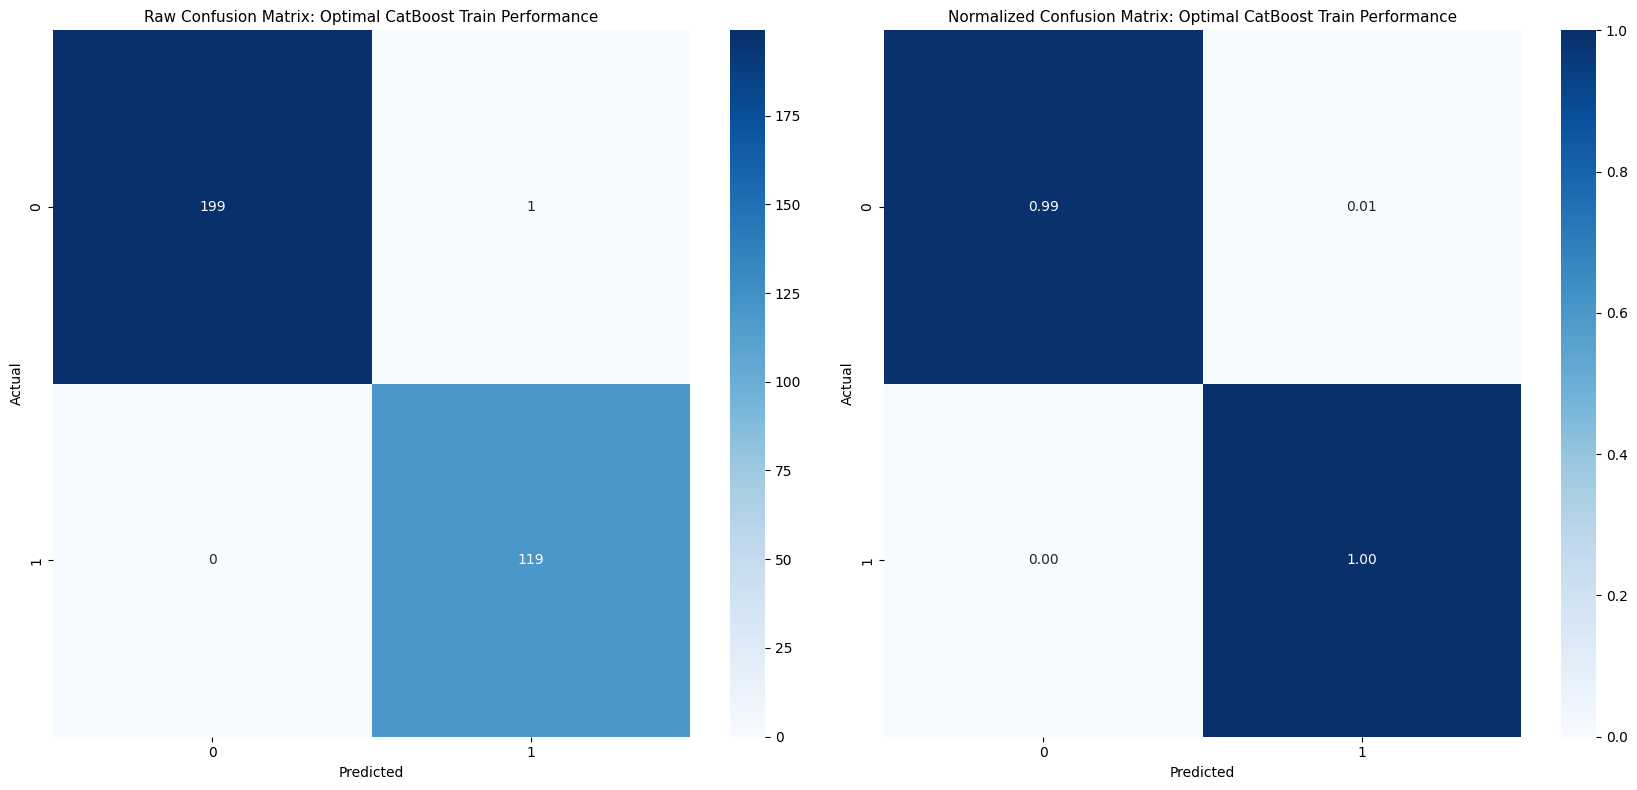

In [203]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_train_encoded, boosted_cb_optimal.predict(X_train))
cm_normalized = confusion_matrix(y_train_encoded, boosted_cb_optimal.predict(X_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal CatBoost Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal CatBoost Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [204]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {boosted_cb_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation_encoded, boosted_cb_optimal.predict(X_validation)))


F1 Score on Validation Data: 0.9487

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.97      0.93      0.95        40

    accuracy                           0.96       107
   macro avg       0.97      0.96      0.96       107
weighted avg       0.96      0.96      0.96       107



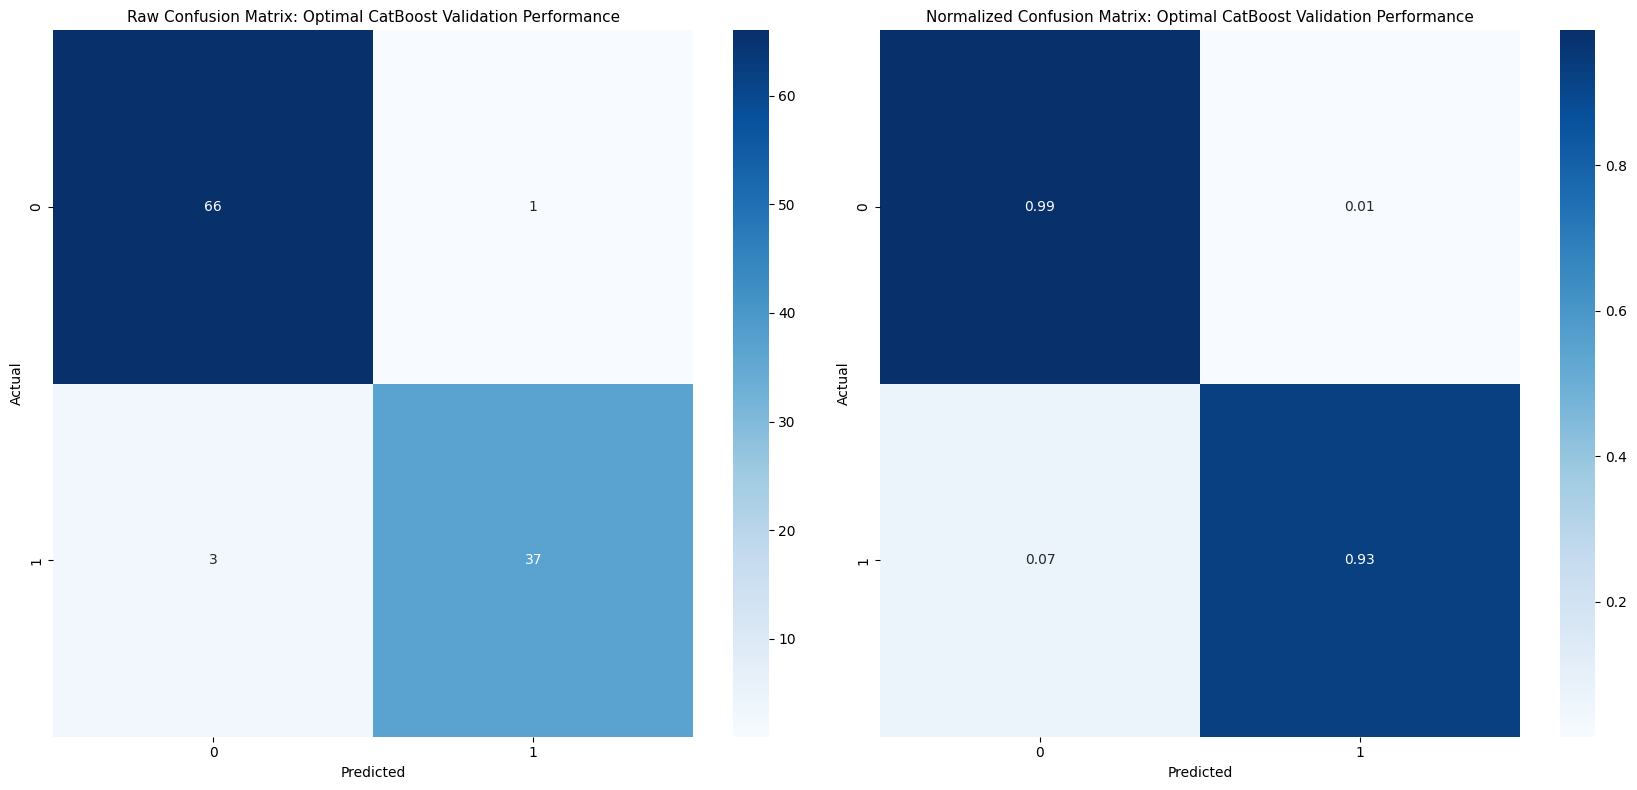

In [205]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation_encoded, boosted_cb_optimal.predict(X_validation))
cm_normalized = confusion_matrix(y_validation_encoded, boosted_cb_optimal.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal CatBoost Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal CatBoost Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [206]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
boosted_cb_optimal_train = model_performance_evaluation(y_train_encoded, boosted_cb_optimal.predict(X_train))
boosted_cb_optimal_train['model'] = ['boosted_cb_optimal'] * 5
boosted_cb_optimal_train['set'] = ['train'] * 5
print('Optimal CatBoost Train Performance Metrics: ')
display(boosted_cb_optimal_train)


Optimal CatBoost Train Performance Metrics: 


metric_name  metric_value               model    set
0    Accuracy      0.996865  boosted_cb_optimal  train
1   Precision      0.991667  boosted_cb_optimal  train
2      Recall      1.000000  boosted_cb_optimal  train
3          F1      0.995816  boosted_cb_optimal  train
4       AUROC      0.997500  boosted_cb_optimal  train

In [207]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
boosted_cb_optimal_validation = model_performance_evaluation(y_validation_encoded, boosted_cb_optimal.predict(X_validation))
boosted_cb_optimal_validation['model'] = ['boosted_cb_optimal'] * 5
boosted_cb_optimal_validation['set'] = ['validation'] * 5
print('Optimal CatBoost Validation Performance Metrics: ')
display(boosted_cb_optimal_validation)


Optimal CatBoost Validation Performance Metrics: 


metric_name  metric_value               model         set
0    Accuracy      0.962617  boosted_cb_optimal  validation
1   Precision      0.973684  boosted_cb_optimal  validation
2      Recall      0.925000  boosted_cb_optimal  validation
3          F1      0.948718  boosted_cb_optimal  validation
4       AUROC      0.955037  boosted_cb_optimal  validation

In [208]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(boosted_cb_optimal, 
            os.path.join("..", MODELS_PATH, "boosted_model_catboost_optimal.pkl"))


['..\\models\\boosted_model_catboost_optimal.pkl']

## 1.8. Model Selection <a class="anchor" id="1.8"></a>

1. Among 6 candidate models, the **Categorical Boosting Model** was selected as the final model by demonstrating the best **F1 Score** for the independent validation data with minimal overfitting :
    * **Apparent F1 Score Performance** = 0.9958
    * **Independent Validation F1 Score Performance** = 0.9487
2. The final model similarly demonstrated consistently high **F1 Score** for the test data :
    * **Independent Test F1 Score Performance** = 0.9549
3. The final model configuration is described as follows:
    * [catboost](https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier) with optimal hyperparameters:
        * <span style="color: #FF0000">learning_rate</span> = 0.1
        * <span style="color: #FF0000">min_child_samples</span> = 6
        * <span style="color: #FF0000">num_leaves</span> = 8
        * <span style="color: #FF0000">n_estimators</span> = 100


In [209]:
##################################
# Consolidating all the
# bagged, boosted, stacked and blended
# model performance measures
# for the train and validation data
##################################
ensemble_train_validation_all_performance = pd.concat([bagged_rf_optimal_train,
                                             bagged_rf_optimal_validation,                                            
                                             boosted_ab_optimal_train,
                                             boosted_ab_optimal_validation,
                                             boosted_gb_optimal_train,
                                             boosted_gb_optimal_validation,
                                             boosted_xgb_optimal_train,
                                             boosted_xgb_optimal_validation,
                                             boosted_lgbm_optimal_train,
                                             boosted_lgbm_optimal_validation,
                                             boosted_cb_optimal_train,
                                             boosted_cb_optimal_validation], 
                                            ignore_index=True)
print('Consolidated Ensemble Model Performance on Train and Validation Data: ')
display(ensemble_train_validation_all_performance)

Consolidated Ensemble Model Performance on Train and Validation Data: 


metric_name  metric_value                 model         set
0     Accuracy      0.974922     bagged_rf_optimal       train
1    Precision      0.974359     bagged_rf_optimal       train
2       Recall      0.957983     bagged_rf_optimal       train
3           F1      0.966102     bagged_rf_optimal       train
4        AUROC      0.971492     bagged_rf_optimal       train
5     Accuracy      0.934579     bagged_rf_optimal  validation
6    Precision      0.971429     bagged_rf_optimal  validation
7       Recall      0.850000     bagged_rf_optimal  validation
8           F1      0.906667     bagged_rf_optimal  validation
9        AUROC      0.917537     bagged_rf_optimal  validation
10    Accuracy      0.993730    boosted_ab_optimal       train
11   Precision      1.000000    boosted_ab_optimal       train
12      Recall      0.983193    boosted_ab_optimal       train
13          F1      0.991525    boosted_ab_optimal       train
14       AUROC      0.991597    boosted_ab_optimal       train
15    Accuracy      0.943925    boosted_ab_optimal  validation
16   Precision      0.972222    boosted_ab_optimal  validation
17      Recall      0.875000    boosted_ab_optimal  validation
18          F1      0.921053    boosted_ab_optimal  validation
19       AUROC      0.930037    boosted_ab_optimal  validation
20    Accuracy      1.000000    boosted_gb_optimal       train
21   Precision      1.000000    boosted_gb_optimal       train
22      Recall      1.000000    boosted_gb_optimal       train
23          F1      1.000000    boosted_gb_optimal       train
24       AUROC      1.000000    boosted_gb_optimal       train
25    Accuracy      0.934579    boosted_gb_optimal  validation
26   Precision      0.971429    boosted_gb_optimal  validation
27      Recall      0.850000    boosted_gb_optimal  validation
28          F1      0.906667    boosted_gb_optimal  validation
29       AUROC      0.917537    boosted_gb_optimal  validation
30    Accuracy      1.000000   boosted_xgb_optimal       train
31   Precision      1.000000   boosted_xgb_optimal       train
32      Recall      1.000000   boosted_xgb_optimal       train
33          F1      1.000000   boosted_xgb_optimal       train
34       AUROC      1.000000   boosted_xgb_optimal       train
35    Accuracy      0.943925   boosted_xgb_optimal  validation
36   Precision      0.972222   boosted_xgb_optimal  validation
37      Recall      0.875000   boosted_xgb_optimal  validation
38          F1      0.921053   boosted_xgb_optimal  validation
39       AUROC      0.930037   boosted_xgb_optimal  validation
40    Accuracy      1.000000  boosted_lgbm_optimal       train
41   Precision      1.000000  boosted_lgbm_optimal       train
42      Recall      1.000000  boosted_lgbm_optimal       train
43          F1      1.000000  boosted_lgbm_optimal       train
44       AUROC      1.000000  boosted_lgbm_optimal       train
45    Accuracy      0.953271  boosted_lgbm_optimal  validation
46   Precision      0.972973  boosted_lgbm_optimal  validation
47      Recall      0.900000  boosted_lgbm_optimal  validation
48          F1      0.935065  boosted_lgbm_optimal  validation
49       AUROC      0.942537  boosted_lgbm_optimal  validation
50    Accuracy      0.996865    boosted_cb_optimal       train
51   Precision      0.991667    boosted_cb_optimal       train
52      Recall      1.000000    boosted_cb_optimal       train
53          F1      0.995816    boosted_cb_optimal       train
54       AUROC      0.997500    boosted_cb_optimal       train
55    Accuracy      0.962617    boosted_cb_optimal  validation
56   Precision      0.973684    boosted_cb_optimal  validation
57      Recall      0.925000    boosted_cb_optimal  validation
58          F1      0.948718    boosted_cb_optimal  validation
59       AUROC      0.955037    boosted_cb_optimal  validation

In [210]:
##################################
# Consolidating all the F1 score
# model performance measures
# between the train and validation data
##################################
ensemble_train_validation_all_performance_F1 = ensemble_train_validation_all_performance[ensemble_train_validation_all_performance['metric_name']=='F1']
ensemble_train_validation_all_performance_F1_train = ensemble_train_validation_all_performance_F1[ensemble_train_validation_all_performance_F1['set']=='train'].loc[:,"metric_value"]
ensemble_train_validation_all_performance_F1_validation = ensemble_train_validation_all_performance_F1[ensemble_train_validation_all_performance_F1['set']=='validation'].loc[:,"metric_value"]


In [211]:
##################################
# Combining all the F1 score
# model performance measures
# between the train and validation data
##################################
ensemble_train_validation_all_performance_F1_plot = pd.DataFrame({'train': ensemble_train_validation_all_performance_F1_train.values,
                                                              'validation': ensemble_train_validation_all_performance_F1_validation.values},
                                                             index=ensemble_train_validation_all_performance_F1['model'].unique())
ensemble_train_validation_all_performance_F1_plot

train  validation
bagged_rf_optimal     0.966102    0.906667
boosted_ab_optimal    0.991525    0.921053
boosted_gb_optimal    1.000000    0.906667
boosted_xgb_optimal   1.000000    0.921053
boosted_lgbm_optimal  1.000000    0.935065
boosted_cb_optimal    0.995816    0.948718

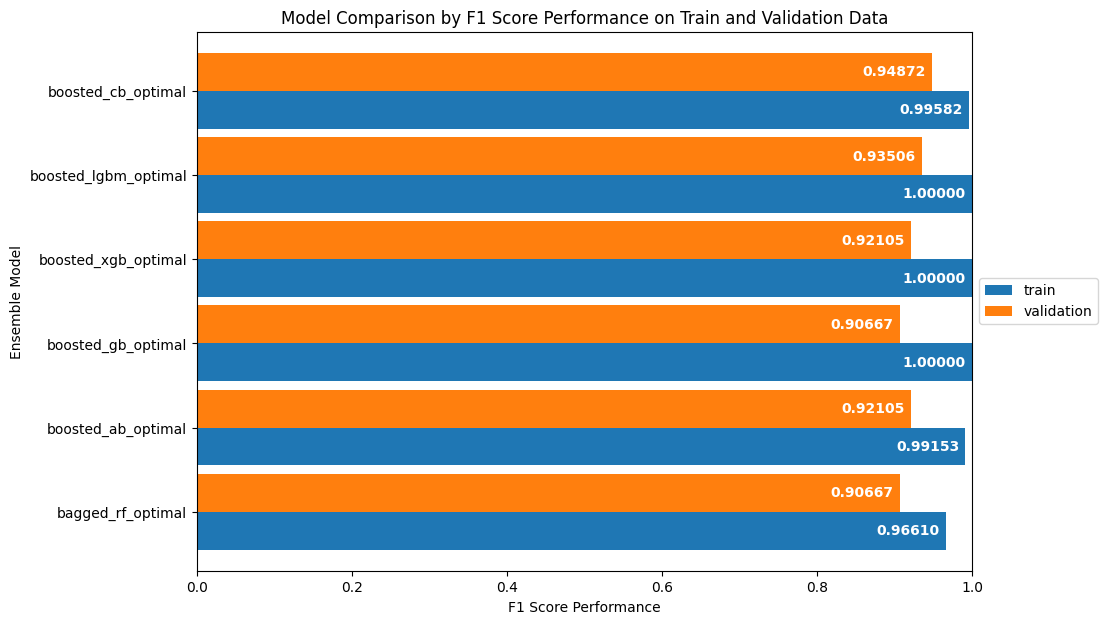

In [212]:
##################################
# Plotting all the F1 score
# model performance measures
# between the train and validation sets
##################################
ensemble_train_validation_all_performance_F1_plot = ensemble_train_validation_all_performance_F1_plot.plot.barh(figsize=(10, 7), width=0.9)
ensemble_train_validation_all_performance_F1_plot.set_xlim(0.00,1.00)
ensemble_train_validation_all_performance_F1_plot.set_title("Model Comparison by F1 Score Performance on Train and Validation Data")
ensemble_train_validation_all_performance_F1_plot.set_xlabel("F1 Score Performance")
ensemble_train_validation_all_performance_F1_plot.set_ylabel("Ensemble Model")
ensemble_train_validation_all_performance_F1_plot.grid(False)
ensemble_train_validation_all_performance_F1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ensemble_train_validation_all_performance_F1_plot.containers:
    ensemble_train_validation_all_performance_F1_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')

In [213]:
##################################
# Gathering all model performance measures
# for the validation data
##################################
ensemble_train_validation_all_performance_Accuracy_validation = ensemble_train_validation_all_performance[(ensemble_train_validation_all_performance['set']=='validation') & (ensemble_train_validation_all_performance['metric_name']=='Accuracy')].loc[:,"metric_value"]
ensemble_train_validation_all_performance_Precision_validation = ensemble_train_validation_all_performance[(ensemble_train_validation_all_performance['set']=='validation') & (ensemble_train_validation_all_performance['metric_name']=='Precision')].loc[:,"metric_value"]
ensemble_train_validation_all_performance_Recall_validation = ensemble_train_validation_all_performance[(ensemble_train_validation_all_performance['set']=='validation') & (ensemble_train_validation_all_performance['metric_name']=='Recall')].loc[:,"metric_value"]
ensemble_train_validation_all_performance_F1_validation = ensemble_train_validation_all_performance[(ensemble_train_validation_all_performance['set']=='validation') & (ensemble_train_validation_all_performance['metric_name']=='F1')].loc[:,"metric_value"]
ensemble_train_validation_all_performance_AUROC_validation = ensemble_train_validation_all_performance[(ensemble_train_validation_all_performance['set']=='validation') & (ensemble_train_validation_all_performance['metric_name']=='AUROC')].loc[:,"metric_value"]


In [214]:
##################################
# Combining all the model performance measures
# for the validation data
##################################
ensemble_train_validation_all_performance_all_plot_validation = pd.DataFrame({'accuracy': ensemble_train_validation_all_performance_Accuracy_validation.values,
                                                                    'precision': ensemble_train_validation_all_performance_Precision_validation.values,
                                                                    'recall': ensemble_train_validation_all_performance_Recall_validation.values,
                                                                    'f1': ensemble_train_validation_all_performance_F1_validation.values,
                                                                    'auroc': ensemble_train_validation_all_performance_AUROC_validation.values},
                                                                   index=ensemble_train_validation_all_performance['model'].unique())
ensemble_train_validation_all_performance_all_plot_validation

accuracy  precision  recall        f1     auroc
bagged_rf_optimal     0.934579   0.971429   0.850  0.906667  0.917537
boosted_ab_optimal    0.943925   0.972222   0.875  0.921053  0.930037
boosted_gb_optimal    0.934579   0.971429   0.850  0.906667  0.917537
boosted_xgb_optimal   0.943925   0.972222   0.875  0.921053  0.930037
boosted_lgbm_optimal  0.953271   0.972973   0.900  0.935065  0.942537
boosted_cb_optimal    0.962617   0.973684   0.925  0.948718  0.955037

In [215]:
##################################
# Gathering the model evaluation metrics
# for the test data
##################################
##################################
# Defining a dictionary of models and 
# their corresponding optimal model functions
##################################
models = {
    'bagged_rf_optimal': bagged_rf_optimal,
    'boosted_ab_optimal': boosted_ab_optimal,
    'boosted_gb_optimal': boosted_gb_optimal,
    'boosted_xgb_optimal': boosted_xgb_optimal,
    'boosted_lgbm_optimal': boosted_lgbm_optimal,
    'boosted_cb_optimal': boosted_cb_optimal
}

In [216]:
##################################
# Encoding the response variables
# for model testing
##################################
y_test_encoded = y_test.map({'B': 0, 'M': 1})

In [217]:
##################################
# Storing the model evaluation metrics
# for the test data
##################################
ensemble_test_all_performance = []

##################################
# Looping through each model 
# and evaluate performance on test data
##################################
for model_name, model in models.items():
   
    # Evaluating performance
    ensemble_test_all_performance_results = model_performance_evaluation(y_test_encoded, model.predict(X_test))
    
    # Adding metadata columns
    ensemble_test_all_performance_results['model'] = model_name
    ensemble_test_all_performance_results['set'] = 'test'
    
    # Storing result
    ensemble_test_all_performance.append(ensemble_test_all_performance_results)
    

In [218]:
##################################
# Consolidating all model performance measures
# for the test data
##################################
ensemble_test_all_performance = pd.concat(ensemble_test_all_performance, ignore_index=True)
print('Consolidated Ensemble Model Performance on Test Data: ')
display(ensemble_test_all_performance)


Consolidated Ensemble Model Performance on Test Data: 


metric_name  metric_value                 model   set
0     Accuracy      0.944056     bagged_rf_optimal  test
1    Precision      0.941176     bagged_rf_optimal  test
2       Recall      0.905660     bagged_rf_optimal  test
3           F1      0.923077     bagged_rf_optimal  test
4        AUROC      0.936164     bagged_rf_optimal  test
5     Accuracy      0.979021    boosted_ab_optimal  test
6    Precision      0.980769    boosted_ab_optimal  test
7       Recall      0.962264    boosted_ab_optimal  test
8           F1      0.971429    boosted_ab_optimal  test
9        AUROC      0.975577    boosted_ab_optimal  test
10    Accuracy      0.965035    boosted_gb_optimal  test
11   Precision      0.944444    boosted_gb_optimal  test
12      Recall      0.962264    boosted_gb_optimal  test
13          F1      0.953271    boosted_gb_optimal  test
14       AUROC      0.964465    boosted_gb_optimal  test
15    Accuracy      0.965035   boosted_xgb_optimal  test
16   Precision      0.944444   boosted_xgb_optimal  test
17      Recall      0.962264   boosted_xgb_optimal  test
18          F1      0.953271   boosted_xgb_optimal  test
19       AUROC      0.964465   boosted_xgb_optimal  test
20    Accuracy      0.979021  boosted_lgbm_optimal  test
21   Precision      0.962963  boosted_lgbm_optimal  test
22      Recall      0.981132  boosted_lgbm_optimal  test
23          F1      0.971963  boosted_lgbm_optimal  test
24       AUROC      0.979455  boosted_lgbm_optimal  test
25    Accuracy      0.965035    boosted_cb_optimal  test
26   Precision      0.913793    boosted_cb_optimal  test
27      Recall      1.000000    boosted_cb_optimal  test
28          F1      0.954955    boosted_cb_optimal  test
29       AUROC      0.972222    boosted_cb_optimal  test

In [219]:
##################################
# Gathering all model performance measures
# for the test data
##################################
ensemble_test_all_performance_Accuracy_test = ensemble_test_all_performance[(ensemble_test_all_performance['set']=='test') & (ensemble_test_all_performance['metric_name']=='Accuracy')].loc[:,"metric_value"]
ensemble_test_all_performance_Precision_test = ensemble_test_all_performance[(ensemble_test_all_performance['set']=='test') & (ensemble_test_all_performance['metric_name']=='Precision')].loc[:,"metric_value"]
ensemble_test_all_performance_Recall_test = ensemble_test_all_performance[(ensemble_test_all_performance['set']=='test') & (ensemble_test_all_performance['metric_name']=='Recall')].loc[:,"metric_value"]
ensemble_test_all_performance_F1_test = ensemble_test_all_performance[(ensemble_test_all_performance['set']=='test') & (ensemble_test_all_performance['metric_name']=='F1')].loc[:,"metric_value"]
ensemble_test_all_performance_AUROC_test = ensemble_test_all_performance[(ensemble_test_all_performance['set']=='test') & (ensemble_test_all_performance['metric_name']=='AUROC')].loc[:,"metric_value"]


In [220]:
##################################
# Combining all the model performance measures
# for the test data
##################################
ensemble_test_all_performance_all_plot_test = pd.DataFrame({'accuracy': ensemble_test_all_performance_Accuracy_test.values,
                                                            'precision': ensemble_test_all_performance_Precision_test.values,
                                                            'recall': ensemble_test_all_performance_Recall_test.values,
                                                            'f1': ensemble_test_all_performance_F1_test.values,
                                                            'auroc': ensemble_test_all_performance_AUROC_test.values},
                                                           index=ensemble_test_all_performance['model'].unique())
ensemble_test_all_performance_all_plot_test

accuracy  precision    recall        f1     auroc
bagged_rf_optimal     0.944056   0.941176  0.905660  0.923077  0.936164
boosted_ab_optimal    0.979021   0.980769  0.962264  0.971429  0.975577
boosted_gb_optimal    0.965035   0.944444  0.962264  0.953271  0.964465
boosted_xgb_optimal   0.965035   0.944444  0.962264  0.953271  0.964465
boosted_lgbm_optimal  0.979021   0.962963  0.981132  0.971963  0.979455
boosted_cb_optimal    0.965035   0.913793  1.000000  0.954955  0.972222

In [221]:
##################################
# Consolidating all the final
# bagged, boosted, stacked and blended
# model performance measures
# for the train, validation and test data
##################################
ensemble_overall_performance = pd.concat([ensemble_train_validation_all_performance, ensemble_test_all_performance], axis=0)

In [222]:
##################################
# Consolidating all the F1 score
# model performance measures
# between the train, validation and test data
##################################
ensemble_overall_performance_F1 = ensemble_overall_performance[ensemble_overall_performance['metric_name']=='F1']
ensemble_overall_performance_F1_train = ensemble_overall_performance_F1[ensemble_overall_performance_F1['set']=='train'].loc[:,"metric_value"]
ensemble_overall_performance_F1_validation = ensemble_overall_performance_F1[ensemble_overall_performance_F1['set']=='validation'].loc[:,"metric_value"]
ensemble_overall_performance_F1_test = ensemble_overall_performance_F1[ensemble_overall_performance_F1['set']=='test'].loc[:,"metric_value"]

In [223]:
##################################
# Combining all the F1 score
# model performance measures
# between the train and validation data
##################################
ensemble_overall_performance_F1_plot = pd.DataFrame({'train': ensemble_overall_performance_F1_train.values,
                                                     'validation': ensemble_overall_performance_F1_validation.values,
                                                     'test': ensemble_overall_performance_F1_test.values},
                                                    index=ensemble_overall_performance_F1['model'].unique())
ensemble_overall_performance_F1_plot

train  validation      test
bagged_rf_optimal     0.966102    0.906667  0.923077
boosted_ab_optimal    0.991525    0.921053  0.971429
boosted_gb_optimal    1.000000    0.906667  0.953271
boosted_xgb_optimal   1.000000    0.921053  0.953271
boosted_lgbm_optimal  1.000000    0.935065  0.971963
boosted_cb_optimal    0.995816    0.948718  0.954955

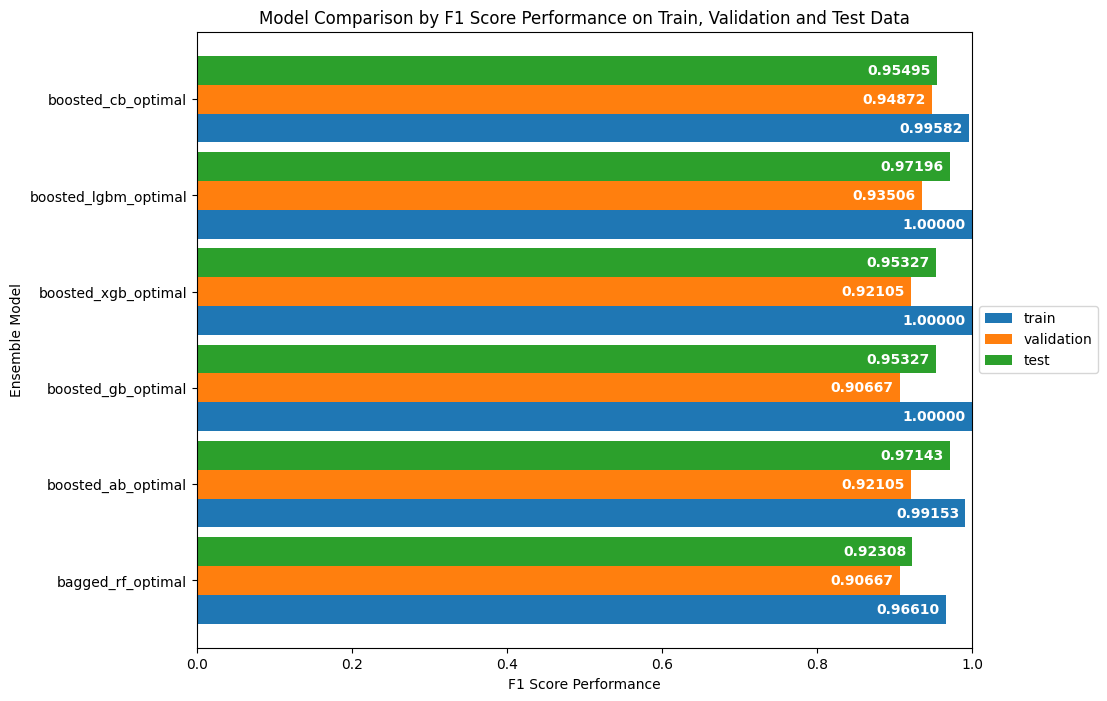

In [224]:
##################################
# Plotting all the F1 score
# model performance measures
# between train, validation and test sets
##################################
ensemble_overall_performance_F1_plot = ensemble_overall_performance_F1_plot.plot.barh(figsize=(10, 8), width=0.9)
ensemble_overall_performance_F1_plot.set_xlim(0.00,1.00)
ensemble_overall_performance_F1_plot.set_title("Model Comparison by F1 Score Performance on Train, Validation and Test Data")
ensemble_overall_performance_F1_plot.set_xlabel("F1 Score Performance")
ensemble_overall_performance_F1_plot.set_ylabel("Ensemble Model")
ensemble_overall_performance_F1_plot.grid(False)
ensemble_overall_performance_F1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ensemble_overall_performance_F1_plot.containers:
    ensemble_overall_performance_F1_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')

## 1.9. Model Monitoring using the NannyML Framework <a class="anchor" id="1.9"></a>

### 1.9.1 Baseline Control<a class="anchor" id="1.9.1"></a>

In [225]:
##################################
# Defining the global parameters
# for the post-model deployment scenario simulation
##################################
N_CHUNKS = 20
CHUNK_SIZE = 50
RANDOM_STATE = 987654321
TARGET_COL = 'diagnosis'
LABEL_MAP = {'B': 0, 'M': 1}
FEATURE_COLUMNS = [
'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',
'radius_se','texture_se','perimeter_se','area_se','smoothness_se',
'compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se',
'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'
]

In [226]:
##################################
# Creating the monitoring baseline control
# by combining both validation and test data together
##################################
breast_cancer_monitoring_baseline = pd.concat(
    [breast_cancer_validation, breast_cancer_test], 
    axis=0,            
    ignore_index=True
)

In [227]:
##################################
# Defining a function for generating
# a post-model data stream simulation
##################################
def make_stream_from_dataframe(df, n_chunks=N_CHUNKS, chunk_size=CHUNK_SIZE, random_state=RANDOM_STATE):
    """Creates a synthetic ordered stream (chunks) including at least one instance of both 'M' and 'B' classes."""
    # Initialiing a random number generator for reproducibility
    rng = np.random.RandomState(random_state)
    # Initializing an empty list to store each generated chunk
    rows = []

    # Splitting the dataframe into the two classes
    df_M = df[df[TARGET_COL] == "M"]
    df_B = df[df[TARGET_COL] == "B"]

    # Determining roughly balanced counts per chunk
    half_size = chunk_size // 2
    
    # Iterating through the desired number of chunks (simulated time intervals)
    for chunk_idx in range(n_chunks):
        # Sampling half of the chunk from each class (with replacement)
        sample_M = df_M.sample(
            n=half_size, replace=True, random_state=rng.randint(0, 2**31 - 1)
        )
        sample_B = df_B.sample(
            n=chunk_size - half_size, replace=True, random_state=rng.randint(0, 2**31 - 1)
        )

        # Combining, shuffling, and labeling with chunk/time index
        chunk = pd.concat([sample_M, sample_B], ignore_index=True).sample(
            frac=1, random_state=rng.randint(0, 2**31 - 1)
        )
        chunk["__chunk"] = chunk_idx
        chunk["__timestamp"] = chunk_idx

        rows.append(chunk)
    # Combining all chunks into a single DataFrame that represents a continuous data stream
    return pd.concat(rows, ignore_index=True)


In [228]:
##################################
# Defining a function for 
# computing model predictions and probabilities
# using the final selected model - categorical boosting model
##################################
def compute_preds_and_proba(pipeline, X):
    """Returns predicted labels and class 1 probabilities"""
    # Generating predicted class labels (0 or 1) using the trained model pipeline
    y_pred = pipeline.predict(X)
    try:
        # Obtaining the probability of the positive class (class 1)
        y_proba = pipeline.predict_proba(X)[:, 1]
    except Exception:
        # Computing the probability approximation if predict_proba is unavailable
        y_proba = 1 / (1 + np.exp(-pipeline.decision_function(X)))
    # Returning both predicted labels and corresponding class-1 probabilities
    return y_pred, y_proba


In [229]:
##################################
# Defining a function for fitting
# NannyML reference calculators
# on the baseline reference dataset
##################################
def fit_nannyml_reference(reference_df, boosted_cb_optimal):
    """
    Fit NannyML reference calculators (univariate drift + CBPE) on the baseline reference dataset.
    Returns a dictionary containing fitted NannyML objects.
    """
    # Extracting the feature matrix (X) and map target labels to numeric values
    X = reference_df[FEATURE_COLUMNS]
    y_true = reference_df[TARGET_COL].map(LABEL_MAP)

    # Computing model predictions and predicted probabilities for the reference data
    y_pred, y_proba = compute_preds_and_proba(boosted_cb_optimal, X)

    # Creating a working copy of the reference DataFrame with prediction columns added
    ref = reference_df.copy()
    ref['y_true'] = y_true
    ref['y_pred'] = y_pred
    ref['y_pred_proba'] = y_proba

    # Initializing and fitting a univariate drift calculator (e.g., KS-test, AD-test)
    uni = nml.UnivariateDriftCalculator(
        column_names=FEATURE_COLUMNS,
        chunk_size=CHUNK_SIZE
    ).fit(ref)

    # Initializing and fitting a CBPE (Confidence-Based Performance Estimation) object
    cbpe = nml.CBPE(
        y_true='y_true',
        y_pred='y_pred',
        y_pred_proba='y_pred_proba',
        problem_type='classification_binary',
        metrics=['roc_auc']
    ).fit(ref)

    # Returning both fitted objects inside a dictionary
    return {'ref': ref, 'uni': uni, 'cbpe': cbpe}


In [230]:
##################################
# Defining a function for assessing
# a simulated monitoring scenario 
# using fitted NannyML reference models
##################################
def assess_scenario(name, reference_fit, scenario_df, boosted_cb_optimal):
    """
    Assess a simulated monitoring scenario using fitted NannyML reference models.
    Computes drift and performance estimates, and compares with true AUC per chunk.
    """
    # Creating a copy of the scenario data to avoid mutating the original
    df = scenario_df.copy()

    # Mapping the categorical target labels ('B', 'M') to numeric form (0, 1)
    df['y_true'] = df[TARGET_COL].map(LABEL_MAP)

    # Extracting feature columns for prediction
    X = df[FEATURE_COLUMNS]

    # Computing model predictions and predicted probabilities for this scenario
    y_pred, y_proba = compute_preds_and_proba(boosted_cb_optimal, X)

    # Storing predictions in the dataframe
    df['y_pred'] = y_pred
    df['y_pred_proba'] = y_proba

    # Using the fitted reference univariate drift calculator on this monitoring data
    uni_res = reference_fit['uni'].calculate(df)

    # Using the fitted reference CBPE performance estimator to estimate metrics without labels
    cbpe_res = reference_fit['cbpe'].estimate(df)

    # Computing the true AUC per chunk (only when labels are available)
    aucs = df.groupby('__chunk').apply(
        lambda g: roc_auc_score(g['y_true'], g['y_pred_proba'])
        if len(np.unique(g['y_true'])) > 1 else np.nan
    )

    # Printing the mean true AUC across all chunks for quick diagnostic comparison
    print(f"\nScenario {name}: Mean true AUC = {aucs.mean():.3f}")

    # Returning results in a dictionary for structured access
    return {
        'data': df,       # full scenario dataframe with predictions
        'uni': uni_res,   # univariate drift results
        'cbpe': cbpe_res, # CBPE performance estimates
        'true_auc': aucs  # actual AUC per chunk
    }


In [231]:
##################################
# Defining a function for visualizing
# the distribution drift of an identified feature
##################################
def plot_feature_drift(df_ref, df_scenario, feature):
    """
    Visualize the distribution drift of a specific feature 
    between reference and scenario datasets.
    """
    # Creating a figure with a defined size
    plt.figure(figsize=(8, 4))
    
    # Plotting the histogram of the reference feature distribution
    plt.hist(df_ref[feature], bins=30, alpha=0.5, label='Reference')
    
    # Plot the histogram of the scenario (drifted) feature distribution
    plt.hist(df_scenario[feature], bins=30, alpha=0.5, label='Scenario')
    
    # Adding a title indicating which feature is being visualized
    plt.title(f"Feature Distribution Drift: {feature}")
    
    # Adding a legend to distinguish the reference and scenario plots
    plt.legend()
    
    # Displaying the resulting histogram comparison
    plt.show()
    

In [232]:
##################################
# Defining a function for comparing
# the true model performance
# and NannyML’s estimated performance (CBPE)
##################################
def plot_true_vs_estimated_performance(true_auc_series, cbpe_results):
    """
    Compare true model performance (AUC) vs. NannyML’s estimated performance (CBPE).
    """
    # Extracting the CBPE-estimated AUC values
    if hasattr(cbpe_results, "to_df"):
        cbpe_df = cbpe_results.to_df()
    else:
        cbpe_df = cbpe_results

    # Flattening MultiIndex columns if present
    if isinstance(cbpe_df.columns, pd.MultiIndex):
        cbpe_df.columns = ['_'.join(col).strip() for col in cbpe_df.columns.values]

    # Inspecting possible column names for chunk info
    possible_chunk_cols = [c for c in cbpe_df.columns if 'chunk' in c.lower() or 'key' in c.lower()]
    if not possible_chunk_cols:
        print("\nAvailable columns in cbpe_df:\n", cbpe_df.columns)
        raise KeyError("No column containing 'chunk' or 'key' found in CBPE results. Inspect cbpe_df.columns.")
    chunk_col = possible_chunk_cols[0] 
    
    # Choosing the first matching column
    chunk_col = possible_chunk_cols[0]  

    # Detecting metric-value columns
    possible_value_cols = [c for c in cbpe_df.columns if 'value' in c.lower()]
    value_col = possible_value_cols[0] if possible_value_cols else cbpe_df.columns[-1]
    
    # Filtering for the ROC AUC metric
    if 'metric' in cbpe_df.columns:
        cbpe_df = cbpe_df[cbpe_df['metric'] == 'roc_auc']
    else:
        metric_like_cols = [col for col in cbpe_df.columns if 'roc_auc' in col.lower()]
        keep_cols = list({chunk_col, *metric_like_cols, value_col})
        cbpe_df = cbpe_df.loc[:, [c for c in keep_cols if c in cbpe_df.columns]]

    # Handling the renamed columns
    if chunk_col not in cbpe_df.columns:
        alt_chunk_cols = [c for c in cbpe_df.columns if 'chunk' in c.lower() or 'key' in c.lower()]
        if alt_chunk_cols:
            chunk_col = alt_chunk_cols[0]
        else:
            print("\nColumns available after filtering:\n", cbpe_df.columns)
            raise KeyError("Chunk column missing after filtering. Inspect cbpe_df.columns.")
    
    # Creating a new figure for visualization
    plt.figure(figsize=(20, 5))
    
    # Plotting the true AUC values per chunk (ground truth)
    plt.plot(true_auc_series.index, true_auc_series.values, '-o', label='True AUC')
    
    # Plotting the CBPE-estimated AUC values per chunk
    plt.plot(cbpe_df[chunk_col].values, cbpe_df[value_col].values, '-x', label='CBPE-Estimated AUC')
    
    # Labeling the x-axis as 'Chunk' (representing time or batch index)
    plt.xlabel('Chunk')
    
    # Labeling the y-axis as'AUC' (performance metric)
    plt.ylabel('AUC')
    
    # Adding an informative title
    plt.title('True vs Estimated AUC per Chunk')
    
    # Displaying the legend to distinguish between true and estimated values
    plt.legend()
    
    # Rendering the line plot
    plt.show()
    

In [233]:
##################################
# Defining a function for visualizing
# the number of drift alerts triggered per feature
##################################
def plot_alert_counts(uni_results):
    """
    Visualize the number of drift alerts triggered per feature 
    using NannyML's Univariate Drift Calculator results.
    """
    # Ranking features by the number of alerts detected
    ranked = nml.AlertCountRanker().rank(uni_results)
    
    # Creating a figure for bar chart visualization
    plt.figure(figsize=(15, 5))
    
    # Plotting a bar chart of features vs. number of drift alerts
    plt.bar(ranked['column_name'], ranked['number_of_alerts'])
    
    # Rotating the x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Adding a descriptive title to the chart
    plt.title('Feature Alert Count Ranking')
    
    # Adjusting layout to prevent label overlap
    plt.tight_layout()
    
    # Showing the resulting bar chart
    plt.show()
    

In [234]:
##################################
# Defining a function for 
# simulating the baseline control
##################################
def simulate_P1_baseline(df):
    # Creating a time-ordered synthetic stream of data chunks
    return make_stream_from_dataframe(df)

In [235]:
##################################
# Defining a function for 
# executing the NannyML monitoring
# for Scenario 1: Baseline Control
##################################
def run_nannyml_baseline_control(reference_df, boosted_cb_optimal):
    """
    Run the complete NannyML monitoring workflow for the baseline scenario (P1).
    """

    # Fitting the NannyML reference models (baseline reference period)
    ref_fit = fit_nannyml_reference(reference_df, boosted_cb_optimal)

    # Simulating baseline (no drift) scenario
    p1 = simulate_P1_baseline(reference_df)

    # Assessing scenario 1 using fitted reference and trained model
    r1 = assess_scenario('P1_baseline', ref_fit, p1, boosted_cb_optimal)

    # Plotting the comparison between true and estimated AUC per chunk
    plot_true_vs_estimated_performance(r1['true_auc'], r1['cbpe'])

    # Visualizing drift alert counts per feature
    plot_alert_counts(r1['uni'])
    

In [236]:
##################################
# Defining a function for 
# plotting chunk-based boxplots for selected features
# for baseline control
##################################
sns.set(style="whitegrid", context="notebook")

def plot_baseline_feature_boxplot(df_base, features, scenario_name="Baseline"):
    """Chunk-based boxplots for selected features in baseline."""
    n_features = len(features)
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 3 * n_features), sharex=True)
    if n_features == 1:
        axes = [axes]
    for ax, f in zip(axes, features):
        sns.boxplot(
            data=df_base,
            x="__chunk", y=f, ax=ax, showfliers=False, color="#4C72B0"
        )
        ax.set_title(f"Chunk-wise {f}: {scenario_name}")
        ax.set_xlabel("Chunk Index (Simulated Time)")
        ax.set_ylabel(f)
        ax.set_xticks(range(20))
    plt.tight_layout()
    plt.show()


In [237]:
##################################
# Defining a function for 
# plotting feature mean per chunk
# for baseline control
##################################
def plot_baseline_feature_mean_line(df_base, features, scenario_name="Baseline"):
    """Plots per-feature mean values over chunks (one chart per feature)."""
    mean_values = df_base.groupby('__chunk')[features].mean()
    
    n_features = len(features)
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 3 * n_features), sharex=True)
    if n_features == 1:
        axes = [axes]

    for ax, f in zip(axes, features):
        sns.lineplot(x=mean_values.index, y=mean_values[f], color="#4C72B0", ax=ax)
        ax.set_title(f"Chunk-wise Mean of {f} ({scenario_name})", fontsize=11)
        ax.set_xlabel("Chunk Index")
        ax.set_ylabel("Mean Value")
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(20))
    
    plt.tight_layout()
    plt.show()



In [238]:
##################################
# Defining a function for 
# plotting class proportion ('M' vs 'B') across chunks
# for baseline control
##################################
def plot_baseline_class_proportion(df_base, scenario_name="Baseline"):
    """Class proportion ('M' vs 'B') across chunks for baseline."""
    prop = df_base.groupby('__chunk')['diagnosis'].value_counts(normalize=True).unstack().fillna(0)
    fig, ax = plt.subplots(figsize=(14, 3))
    sns.lineplot(data=prop['M'], label="Proportion of 'M'", color="#4C72B0", ax=ax)
    ax.set_title(f"Class Proportion per Chunk: {scenario_name}")
    ax.set_xlabel("Chunk Index")
    ax.set_ylabel("Proportion of 'M'")
    ax.set_xticks(range(20))
    plt.show()


In [239]:
##################################
# Defining a function for 
# plotting missing fraction per chunk
# for baseline control
##################################
def plot_baseline_missingness(df_base, features, scenario_name="Baseline"):
    """Missing fraction per chunk for selected features, one plot per feature."""
    miss = df_base.groupby('__chunk')[features].apply(lambda x: x.isna().mean())
    
    n_features = len(features)
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 3 * n_features), sharex=True)
    if n_features == 1:
        axes = [axes]

    for ax, f in zip(axes, features):
        sns.lineplot(x=miss.index, y=miss[f], color="#4C72B0", ax=ax)
        ax.set_title(f"Missingness over Time: {f} ({scenario_name})", fontsize=11)
        ax.set_xlabel("Chunk Index")
        ax.set_ylabel("Missing Fraction")
        ax.set_ylim(-0.1, 1)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

    

In [240]:
##################################
# Simulating post-deployment data drift scenario 1 = baseline control
##################################
p1 = simulate_P1_baseline(breast_cancer_monitoring_baseline)


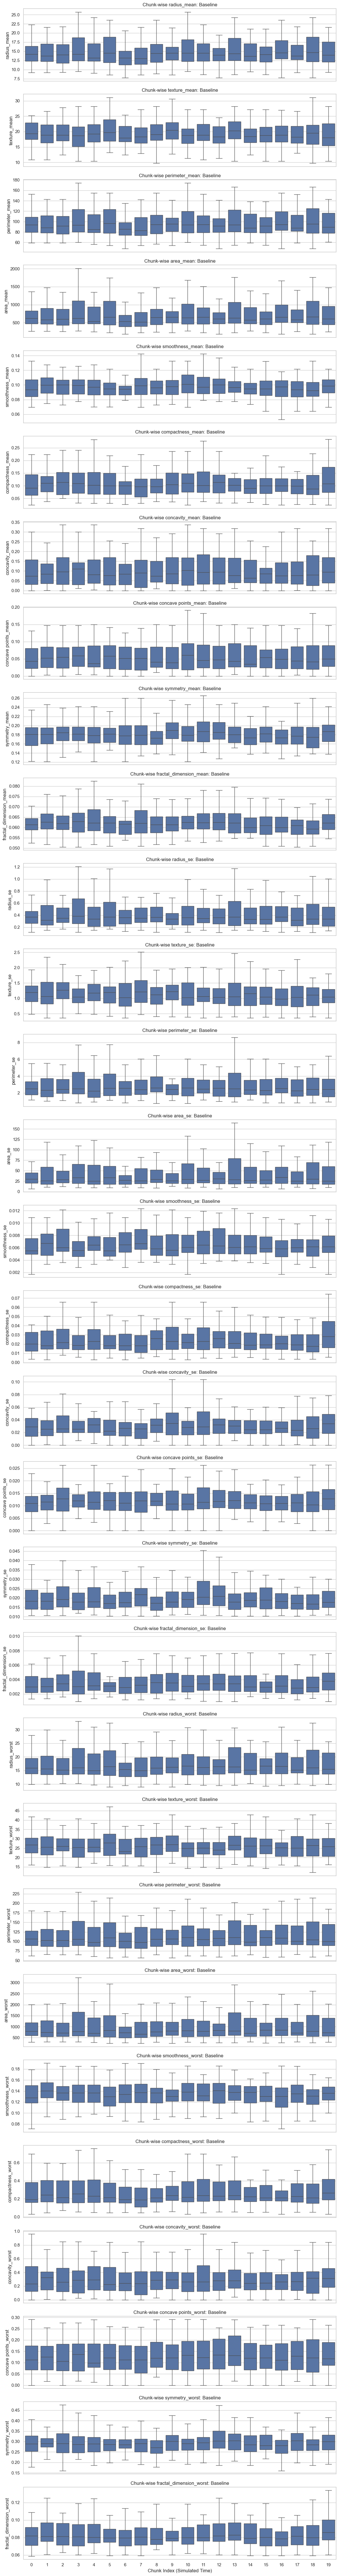

In [241]:
##################################
# Visualizing feature variability
# for baseline control
##################################
plot_baseline_feature_boxplot(p1, FEATURE_COLUMNS)


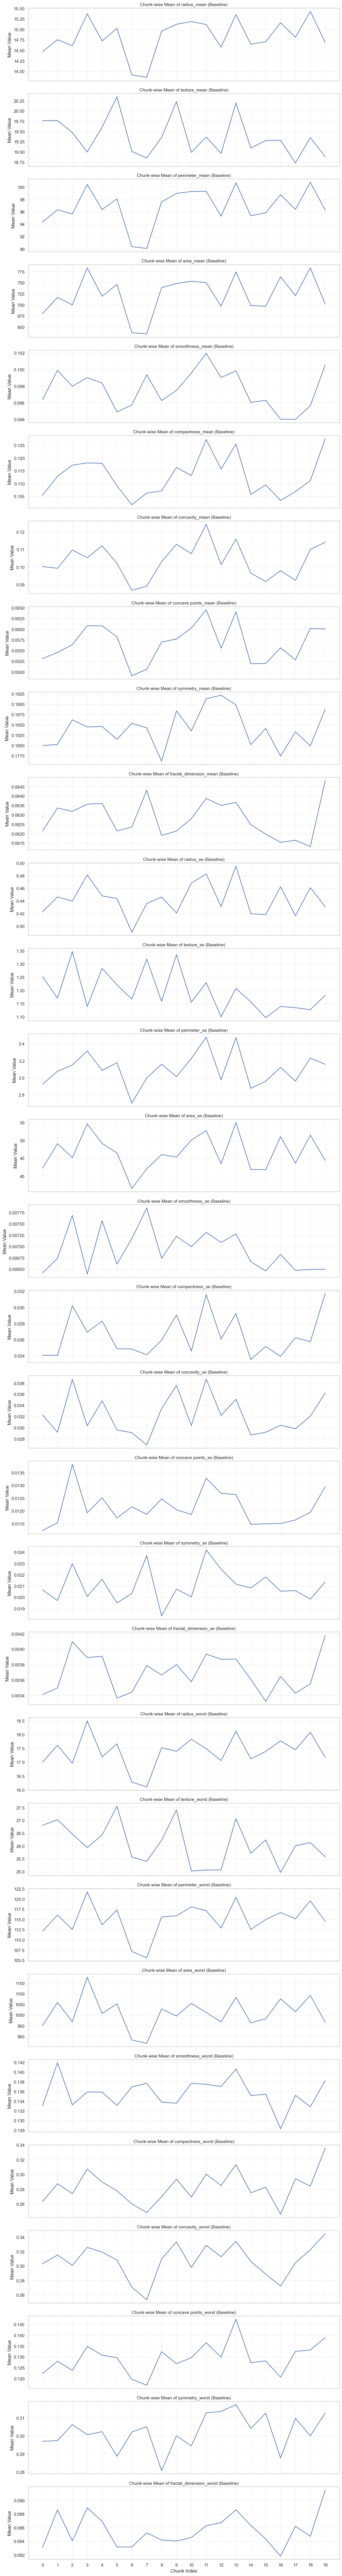

In [242]:
##################################
# Visualizing feature variability
# for baseline control
##################################
plot_baseline_feature_mean_line(p1, FEATURE_COLUMNS)


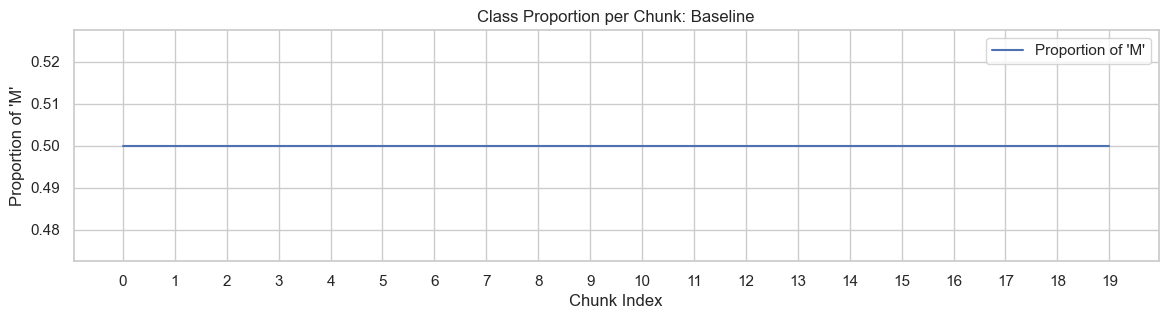

In [243]:
##################################
# Inspecting baseline class balance stability
# for baseline control
##################################
plot_baseline_class_proportion(p1)


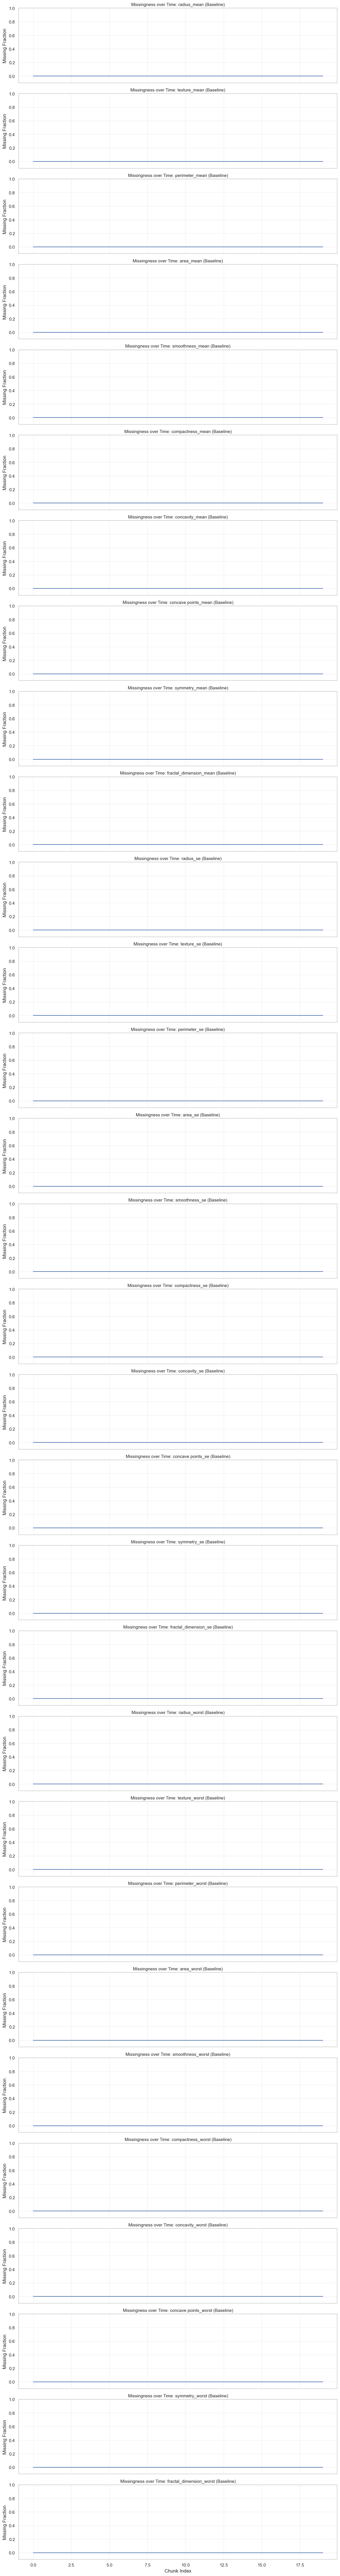

In [244]:
##################################
# Evaluating baseline missingness
# for baseline control
##################################
plot_baseline_missingness(p1, FEATURE_COLUMNS)


### 1.9.2 Simulated Covariate Drift<a class="anchor" id="1.9.2"></a>

In [245]:
##################################
# Defining the covariate drift-specific parameters
# for the post-model deployment scenario simulation
##################################
COVARIATE_DRIFT_FEATURES = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
COVARIATE_DRIFT_DELTA = 0.5
COVARIATE_DRIFT_SCALE = 1.5
COVARIATE_DRIFT_RAMP = 15

In [246]:
##################################
# Defining a function for 
# simulating covariate drift
##################################
def simulate_P2_covariate_drift(df):
    # Creating a time-ordered synthetic stream of data chunks
    stream = make_stream_from_dataframe(df)
    # Computing standard deviations of selected features to scale drift magnitudes appropriately
    stds = df[COVARIATE_DRIFT_FEATURES].std()
    # Looping through each simulated chunk (time step)
    for chunk_idx in range(N_CHUNKS):
        # Computing the progression fraction (0 → 1) of the drift ramp over time
        frac = min(1, (chunk_idx+1)/COVARIATE_DRIFT_RAMP)
        # Applying a Boolean mask to isolate current chunk’s samples
        mask = stream['__chunk'] == chunk_idx
        # Applying drift to each feature selected for covariate drift
        for f in COVARIATE_DRIFT_FEATURES:
            # Applying an additive mean shift proportional to standard deviation and drift fraction
            add = COVARIATE_DRIFT_DELTA * stds[f] * frac
            # Applying a multiplicative scale shift proportional to drift progression
            scale = 1 + (COVARIATE_DRIFT_SCALE - 1) * frac
            # Apply both mean and scale shifts to current chunk’s feature values
            stream.loc[mask, f] = stream.loc[mask, f] * scale + add
    # Returning the modified data stream containing simulated covariate drift
    return stream


In [247]:
##################################
# Defining a function for 
# visualizing the boxplot comparison chart
# for both the simulated and baseline control
##################################
def plot_feature_boxplot_comparison(df_base, df_drift, features, scenario_name):
    """Chunk-based boxplots for selected features for Baseline vs Scenario."""
    # Determining the number of features to plot
    n_features = len(features)
    # Creating a vertically stacked subplot layout (one plot per feature)
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 3 * n_features), sharex=True)
    # Ensuring axes is iterable even if there’s only one feature
    if n_features == 1:
        axes = [axes]
    # Iterating through each feature and its corresponding subplot axis
    for ax, f in zip(axes, features):
        # Creating a boxplot showing the distribution of the feature across chunks
        sns.boxplot(
            data=pd.concat([
                df_base.assign(scenario='Baseline'),
                df_drift.assign(scenario=scenario_name)
            ]),
            x="__chunk", y=f, hue="scenario", ax=ax, showfliers=False
        )
        ax.set_title(f"Chunk-wise {f}: {scenario_name} vs Baseline")
        ax.set_xlabel("Chunk Index (Simulated Time)")
        ax.set_ylabel(f)
        ax.set_xticks(range(20))
    plt.tight_layout()
    plt.show()
    

In [248]:
##################################
# Defining a function for 
# visualizing the mean line comparison chart
# for both the simulated and baseline control
##################################
def plot_feature_mean_line(df_base, df_drift, features, scenario_name):
    """Plots per-feature mean values over chunks (one chart per feature) for Baseline vs Scenario."""
    # Computing the chunk-wise mean per feature for both datasets
    base_means = df_base.groupby('__chunk')[features].mean().assign(scenario='Baseline')
    drift_means = df_drift.groupby('__chunk')[features].mean().assign(scenario=scenario_name)
    combined = pd.concat([base_means, drift_means])
    melted = combined.reset_index().melt(
        id_vars=['__chunk', 'scenario'],
        var_name='feature',
        value_name='mean_value'
    )

    # Preparing the subplots (one row per feature)
    n_features = len(features)
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 3 * n_features), sharex=True)
    if n_features == 1:
        axes = [axes]

    # Plotting the lineplots for each feature
    for ax, f in zip(axes, features):
        subset = melted[melted['feature'] == f]
        sns.lineplot(
            data=subset,
            x='__chunk',
            y='mean_value',
            hue='scenario',
            ax=ax
        )
        ax.set_title(f"Chunk-wise Mean of {f}: {scenario_name} vs Baseline", fontsize=11)
        ax.set_xlabel("Chunk Index")
        ax.set_ylabel("Mean Value")
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(20))
        ax.legend(loc='best')

    plt.tight_layout()
    plt.show()


In [249]:
##################################
# Simulating post-deployment data drift scenario 2 = covariate drift
##################################
p2 = simulate_P2_covariate_drift(breast_cancer_monitoring_baseline)


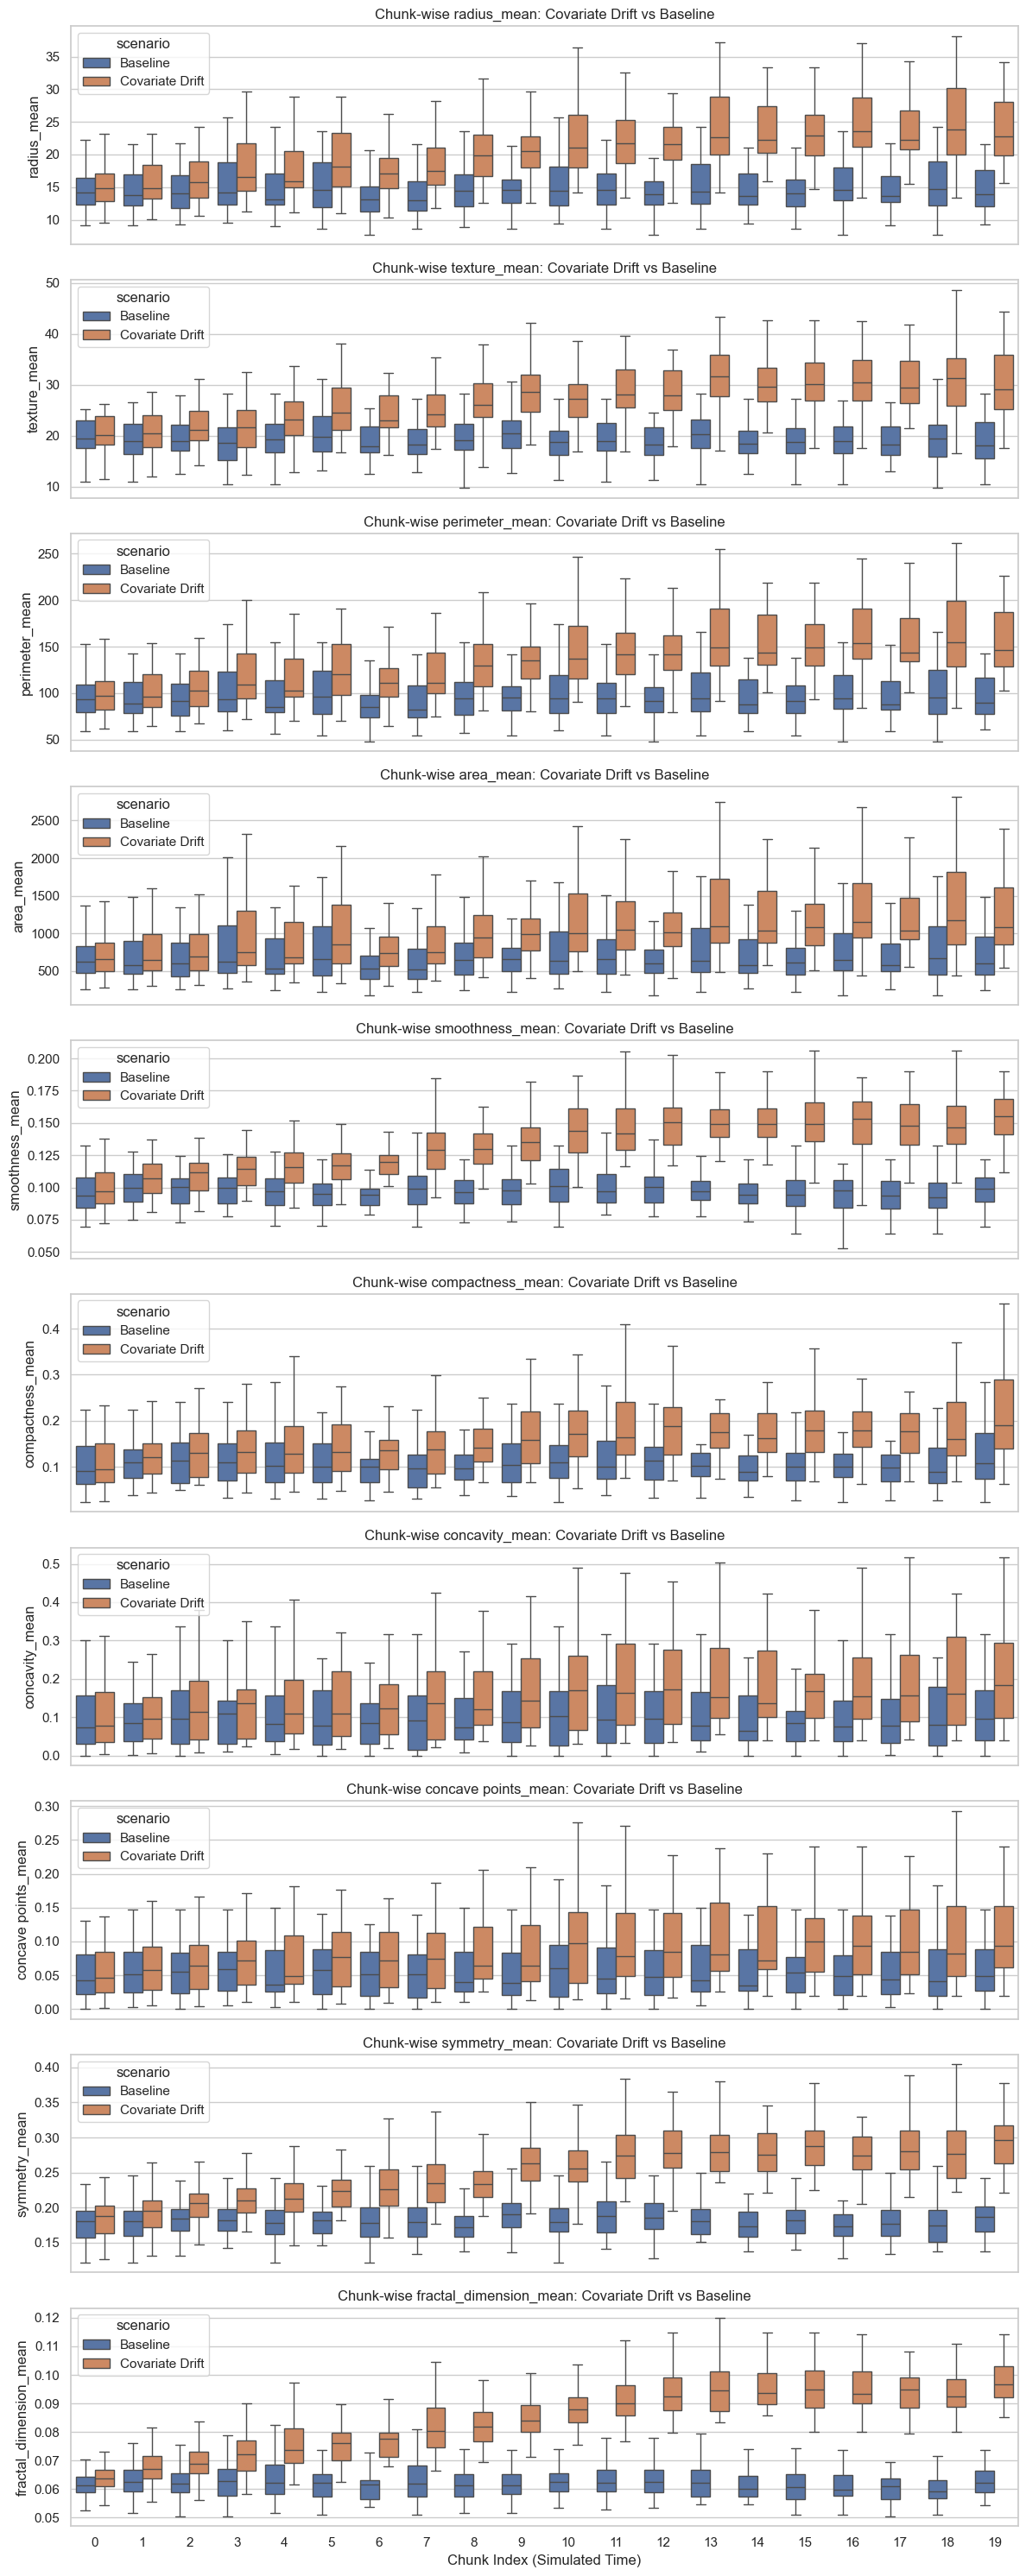

In [250]:
##################################
# Visualizing baseline feature variability
# for the simulated covariate shift scenario
# and baseline control
##################################
plot_feature_boxplot_comparison(p1, p2, COVARIATE_DRIFT_FEATURES, "Covariate Drift")


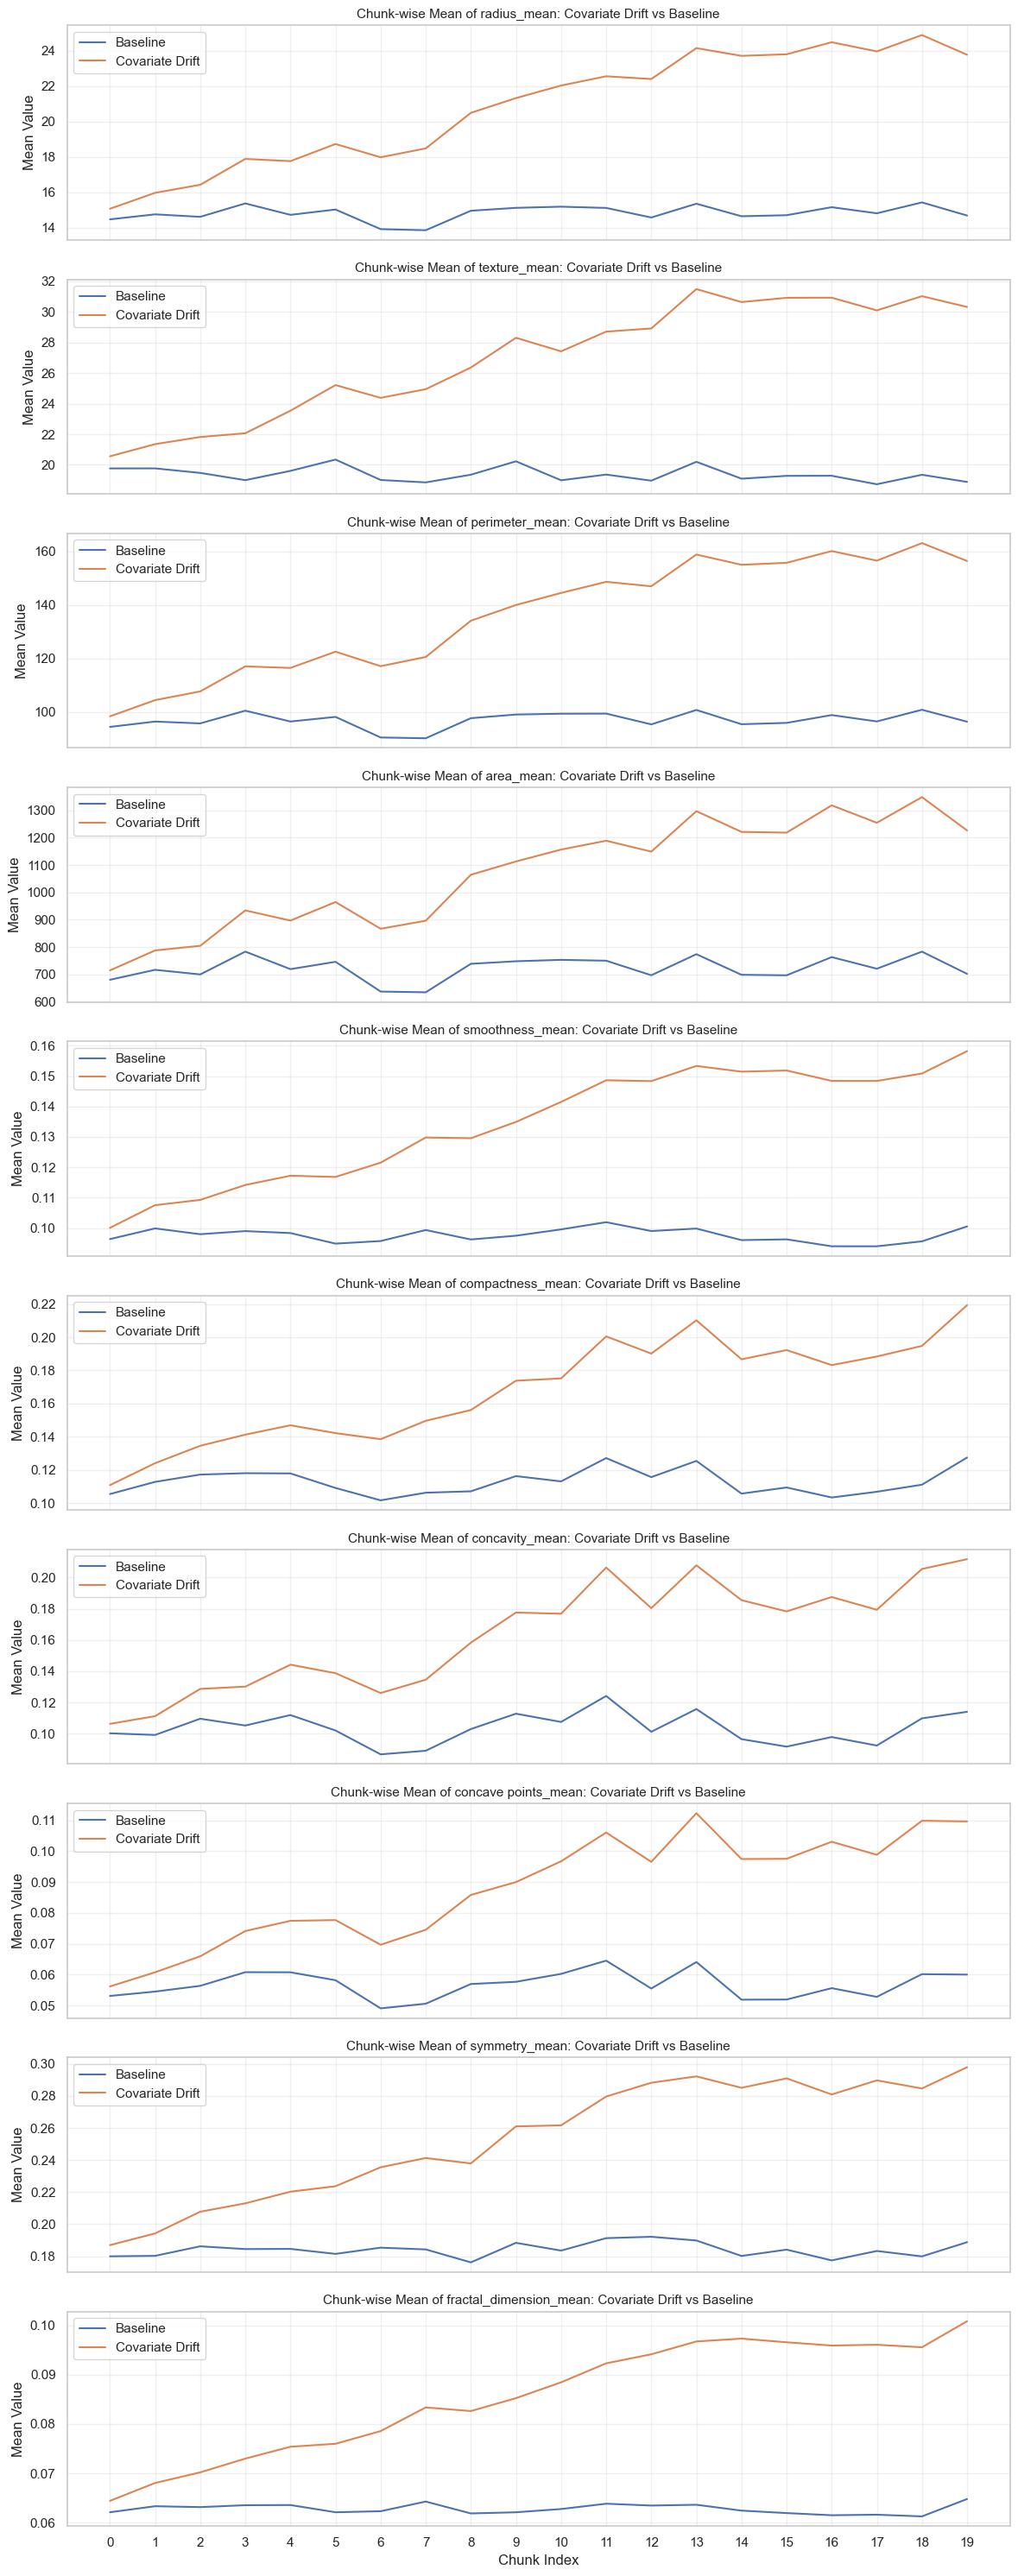

In [251]:
##################################
# Visualizing baseline feature variability
# for the simulated covariate shift scenario
# and baseline control
##################################
plot_feature_mean_line(p1, p2, COVARIATE_DRIFT_FEATURES, "Covariate Drift")


### 1.9.3 Simulated Prior Shift<a class="anchor" id="1.9.3"></a>

In [252]:
##################################
# Defining the prior-shift parameters
# for the post-model deployment scenario simulation
##################################
PRIOR_SHIFT_START_P = 0.37
PRIOR_SHIFT_END_P = 0.80
PRIOR_SHIFT_RAMP = 15

In [253]:
##################################
# Defining a function for 
# simulating prior shift
##################################
def simulate_P3_prior_shift(df):
    # Initialiing a random number generator for reproducibility
    rng = np.random.RandomState(RANDOM_STATE)
    # Separating the dataset into positive (M) and negative (B) subsets
    df_pos = df[df[TARGET_COL].map(LABEL_MAP)==1]
    df_neg = df[df[TARGET_COL].map(LABEL_MAP)==0]
    # Creating an empty list to collect chunked DataFrames
    chunks = []
    # Iterating over each simulated monitoring chunk
    for c in range(N_CHUNKS):
        # Calculating the current progression fraction (0 → 1)
        frac = min(1, (c+1)/PRIOR_SHIFT_RAMP)
        # Gradually changing the class prevalence (probability of positives)
        p = PRIOR_SHIFT_START_P + (PRIOR_SHIFT_END_P - PRIOR_SHIFT_START_P) * frac
        # Determining the number of positive and negative samples in the particular chunk
        n_pos = int(CHUNK_SIZE * p)
        n_neg = CHUNK_SIZE - n_pos
        # Sampling from positive and negative pools with replacement
        pos = df_pos.sample(n=n_pos, replace=True, random_state=rng.randint(0,2**31 -1))
        neg = df_neg.sample(n=n_neg, replace=True, random_state=rng.randint(0,2**31 -1))
        # Combining and shuffling the sampled data to avoid order bias
        chunk = pd.concat([pos, neg]).sample(frac=1, random_state=rng.randint(0,2**31 -1))
        # Assigning synthetic time and chunk identifiers
        chunk['__chunk']=c; 
        chunk['__timestamp']=c
        # Store the chunk in the list
        chunks.append(chunk)
    # Concatenating all chunks into a single DataFrame for analysis    
    return pd.concat(chunks, ignore_index=True)


In [254]:
##################################
# Defining a function for 
# plotting class proportion ('M' vs 'B') across chunks
# for both the simulated and baseline control
##################################
def plot_class_proportion(df_base, df_shift, scenario_name):
    def prop(df):
        return df.groupby('__chunk')['diagnosis'].value_counts(normalize=True).unstack().fillna(0)
    base_prop = prop(df_base)
    shift_prop = prop(df_shift)
    fig, ax = plt.subplots(figsize=(14, 3))
    sns.lineplot(data=base_prop['M'], label='Baseline M', ax=ax)
    sns.lineplot(data=shift_prop['M'], label=f'{scenario_name} M', ax=ax)
    ax.set_title(f"Proportion of Malignant (M) per Chunk: {scenario_name} vs Baseline")
    ax.set_xlabel("Chunk Index")
    ax.set_ylabel("Proportion of 'M'")
    ax.set_xticks(range(20))
    ax.legend()
    plt.show()
    

In [255]:
##################################
# Simulating post-deployment data drift scenario 3 = prior shift
##################################
p3 = simulate_P3_prior_shift(breast_cancer_monitoring_baseline)


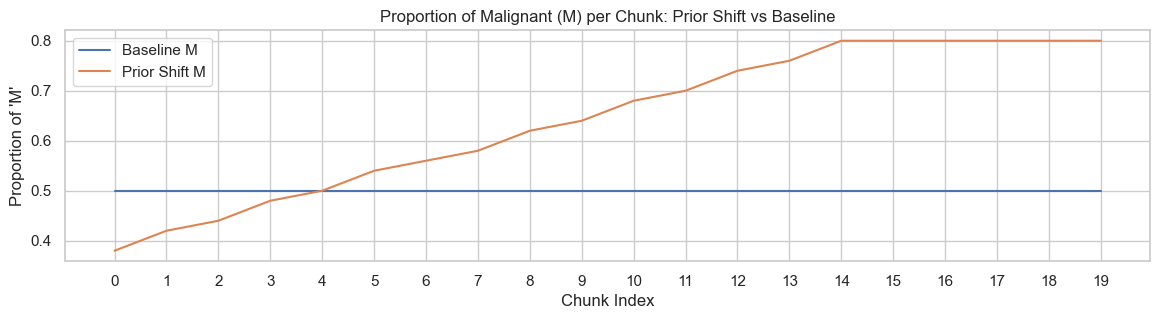

In [256]:
##################################
# Inspecting class balance stability
# for the simulated prior shift scenario
# and baseline control
##################################
plot_class_proportion(p1, p3, "Prior Shift")


### 1.9.4 Simulated Concept Drift<a class="anchor" id="1.9.4"></a>

In [257]:
##################################
# Defining the concept drift-specific parameters
# for the post-model deployment scenario simulation
##################################
CONCEPT_DRIFT_SLICE_FEATURES = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
CONCEPT_DRIFT_SLICE_THRESHOLD_QUANTILE = 0.8
CONCEPT_DRIFT_FLIP_FRACTION = 1.0
CONCEPT_DRIFT_RAMP = 15

In [258]:
##################################
# Defining a function for 
# simulating concept drift
##################################
def simulate_P4_concept_drift(df):
    # Initializing a random number generator for reproducibility
    rng = np.random.RandomState(RANDOM_STATE)
    # Creating a time-ordered synthetic stream of data chunks
    stream = make_stream_from_dataframe(df)
    # Iterating through each feature defined to induce localized concept drift
    for feat in CONCEPT_DRIFT_SLICE_FEATURES:
        # Determining a threshold (quantile-based) to define the region affected by concept drift
        thr = df[feat].quantile(CONCEPT_DRIFT_SLICE_THRESHOLD_QUANTILE)
        # Looping through each synthetic chunk (simulated monitoring time)
        for c in range(N_CHUNKS):
            # Computing progression of concept drift (0 → 1) across ramp duration
            frac = min(1.0, (c+1)/CONCEPT_DRIFT_RAMP)
            # Identifying data points within the current chunk and above the feature threshold
            mask = (stream['__chunk']==c) & (stream[feat]>=thr)
            # Extracting indices of samples eligible for label flipping
            idxs = stream[mask].index
            # Computing number of samples to flip based on drift fraction and configured flip rate
            n_flip = int(len(idxs) * CONCEPT_DRIFT_FLIP_FRACTION * frac)
            # Performing label flipping only if there are samples to modify
            if n_flip>0:
                flip = rng.choice(idxs, n_flip, replace=False)
                # Swapping labels: 'B' becomes 'M', and 'M' becomes 'B'
                stream.loc[flip, TARGET_COL] = stream.loc[flip, TARGET_COL].map({'B':'M','M':'B'})
    # Returning the modified data stream containing simulated concept drift
    return stream


In [259]:
##################################
# Simulating post-deployment data drift scenario 4 = concept drift
##################################
p4 = simulate_P4_concept_drift(breast_cancer_monitoring_baseline)


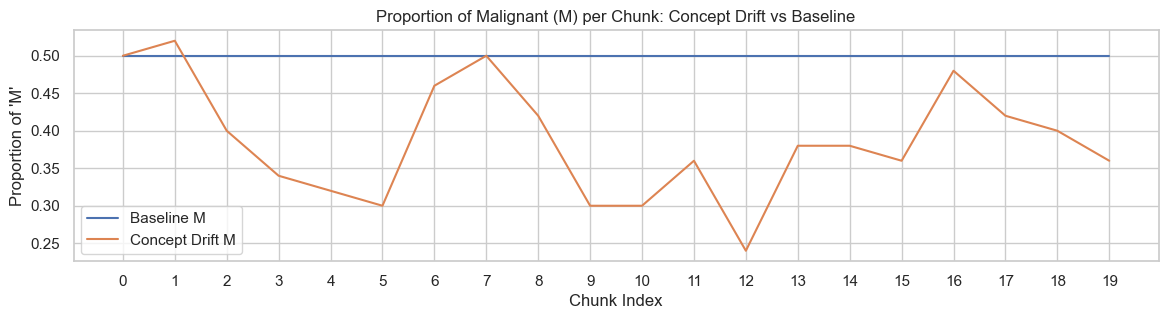

In [260]:
##################################
# Inspecting class balance stability
# for the simulated concept drift scenario
# and baseline control
##################################
plot_class_proportion(p1, p4, "Concept Drift")


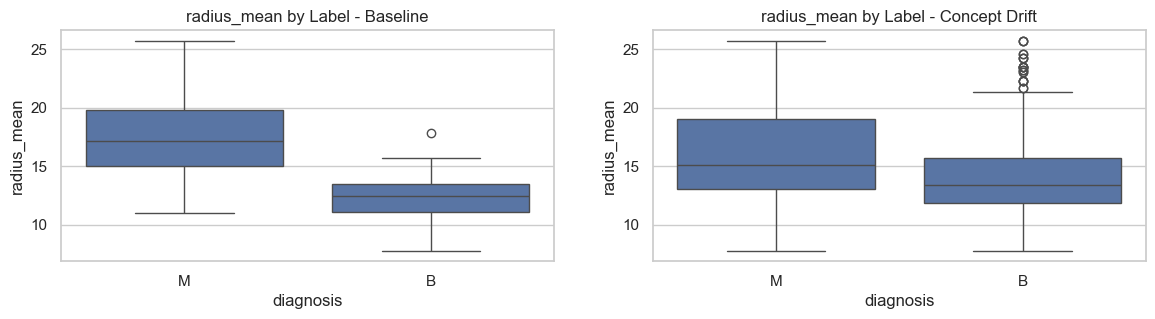

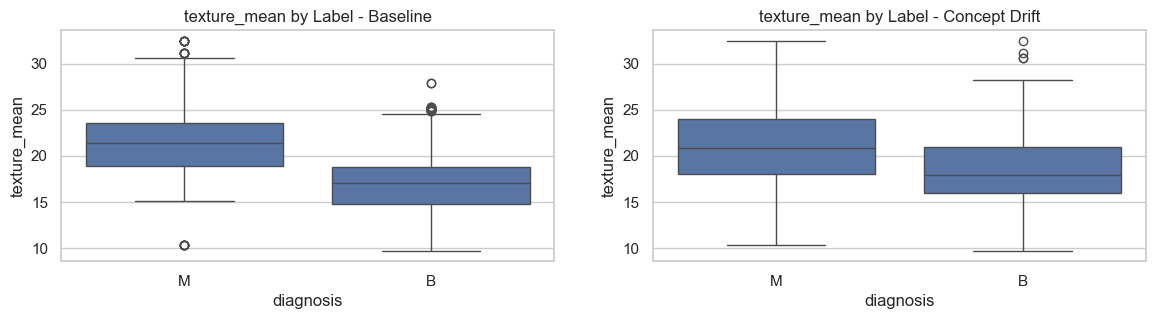

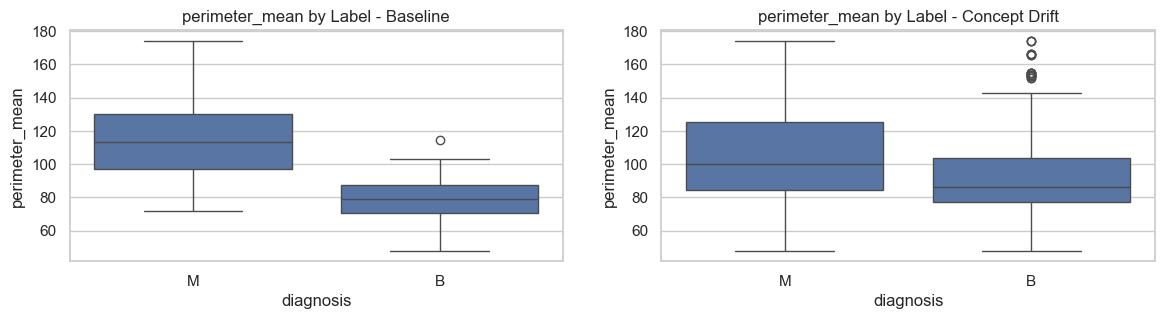

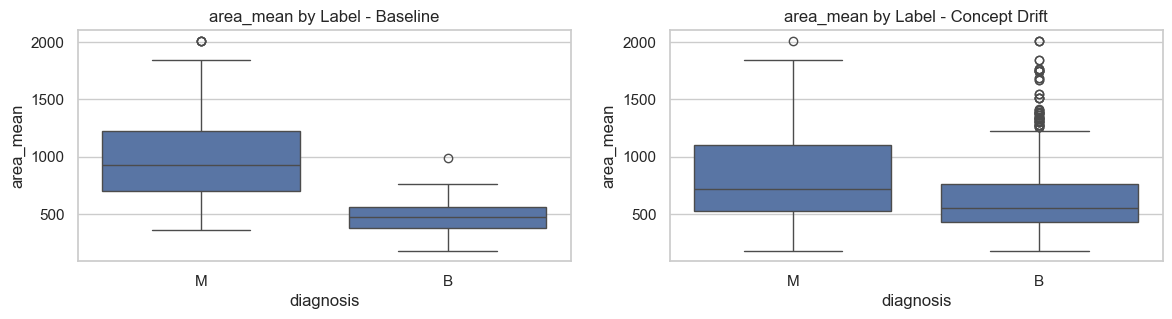

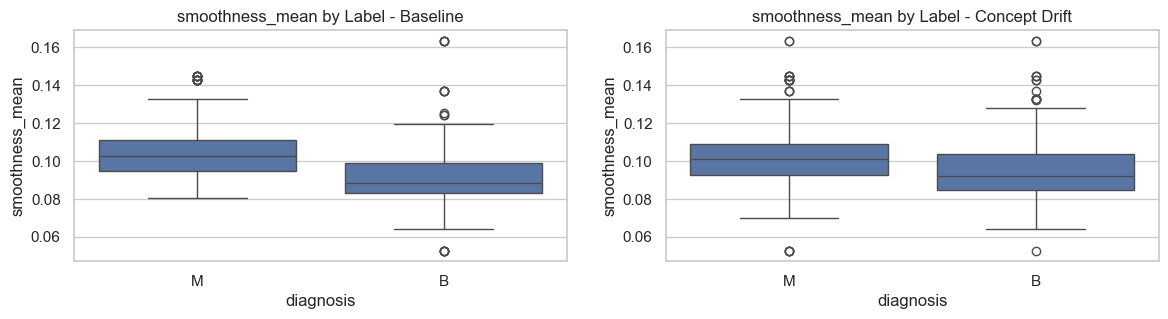

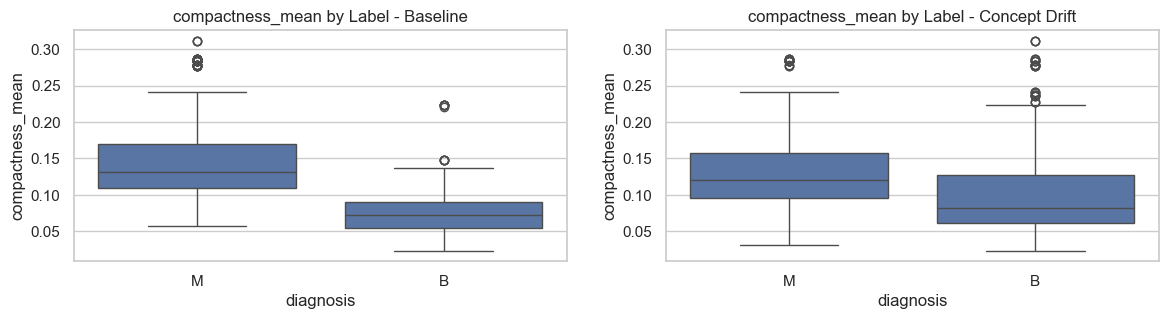

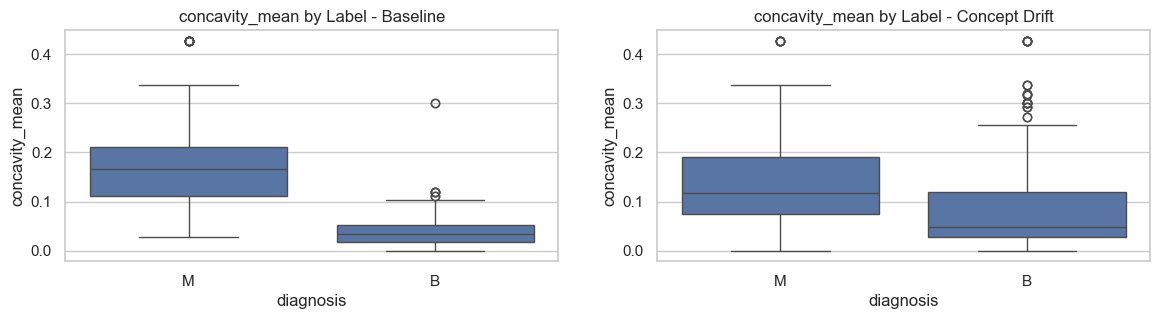

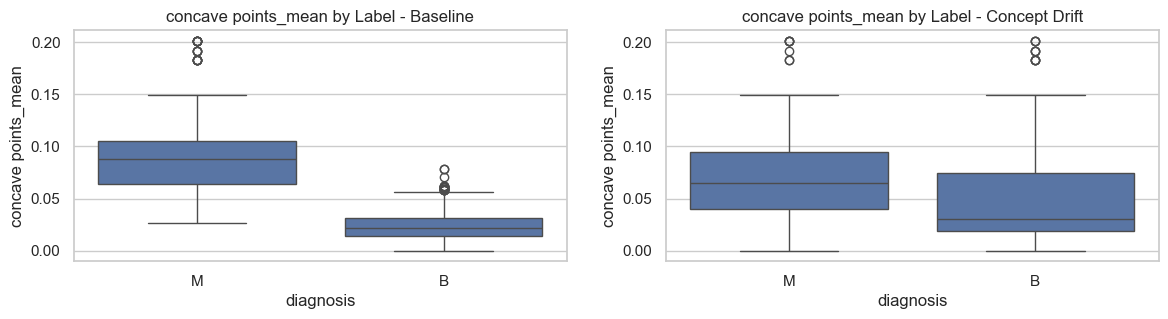

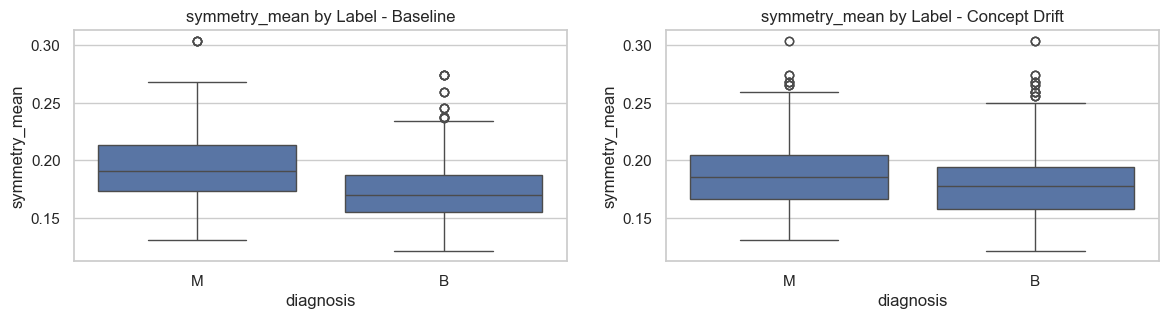

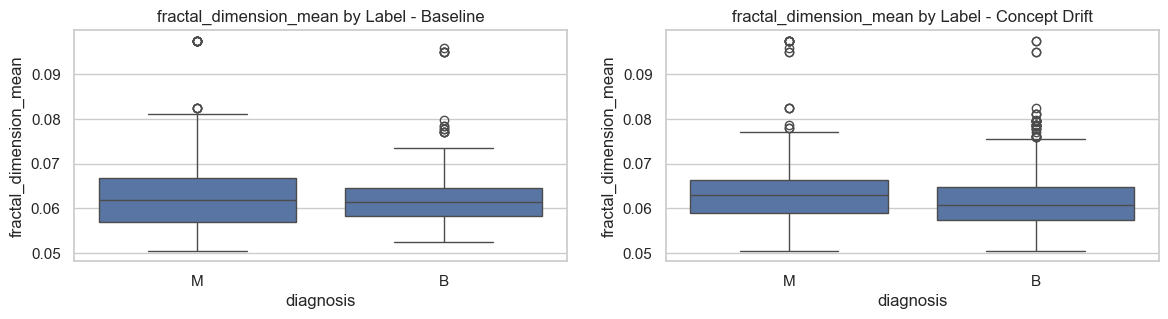

In [261]:
##################################
# Inspecting class distribution
# for the simulated concept drift scenario
# and baseline control
##################################
for feat in CONCEPT_DRIFT_SLICE_FEATURES:
    fig, ax = plt.subplots(1, 2, figsize=(14, 3))
    sns.boxplot(x="diagnosis", y=feat, data=p1, ax=ax[0])
    ax[0].set_title(f"{feat} by Label - Baseline")
    sns.boxplot(x="diagnosis", y=feat, data=p4, ax=ax[1])
    ax[1].set_title(f"{feat} by Label - Concept Drift")
    plt.show()
    

### 1.9.5 Simulated Missingness Spike<a class="anchor" id="1.9.5"></a>

In [262]:
##################################
# Defining the missingness spike-specific parameters
# for the post-model deployment scenario simulation
##################################
MCAR_FEATURES = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean','concavity_mean']
MAR_FEATURES = ['compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
MISSINGNESS_SPIKE_FEATURES = list(dict.fromkeys(MCAR_FEATURES + MAR_FEATURES))
MISSINGNESS_SPIKE_INTENSITY = 0.6
MISSINGNESS_SPIKE_LENGTH = 4
MISSINGNESS_PROLONGED_INCREASE = 0.15
MISSINGNESS_PROLONGED_LENGTH = 5

In [263]:
##################################
# Defining a function for 
# simulating missingness spike
##################################
def simulate_P5_missingness_spike(df):
    # Initializing RNG for reproducibility
    rng = np.random.RandomState(RANDOM_STATE)

    # Creating time-ordered synthetic stream of data chunks
    stream = make_stream_from_dataframe(df)

    # Defining MCAR spike window
    spike_start, spike_end = N_CHUNKS // 3, N_CHUNKS // 3 + MISSINGNESS_SPIKE_LENGTH

    # Simulating MCAR (Missing Completely At Random)
    for c in range(spike_start, spike_end):
        # Identifing rows belonging to the current chunk
        mask = stream['__chunk'] == c

        for f in MCAR_FEATURES:
            # Skipping if feature not present in data
            if f not in stream.columns:
                continue

            # Indices of rows in this chunk
            idx = stream[mask].index

            # Randomly selecting a fraction of rows to make missing
            n_missing = int(len(idx) * MISSINGNESS_SPIKE_INTENSITY)
            if n_missing == 0:
                continue

            miss = rng.choice(idx, n_missing, replace=False)

            # Apply missingness
            stream.loc[miss, f] = np.nan

    # Simulating MAR (Missing At Random) based on a reference feature
    for c in range(N_CHUNKS):
        mask = stream['__chunk'] == c

        # Proceeding only if the predictor feature exists
        if 'area_mean' not in stream.columns:
            continue

        # Identify high values of 'area_mean' (top 20%)
        high_area = stream.loc[mask & (stream['area_mean'] > stream['area_mean'].quantile(0.8))].index
        if len(high_area) == 0:
            continue

        # Applying MAR missingness to multiple MAR features
        for f in MAR_FEATURES:
            if f not in stream.columns:
                continue

            n_mar = int(len(high_area) * 0.2)
            if n_mar == 0:
                continue

            miss = rng.choice(high_area, n_mar, replace=False)
            stream.loc[miss, f] = np.nan

    # Simulating Prolonged missingness pattern after spikes 
    for c in range(spike_end, spike_end + MISSINGNESS_PROLONGED_LENGTH):
        mask = stream['__chunk'] == c
        for f in MCAR_FEATURES:
            if f not in stream.columns:
                continue
            idx = stream[mask].index
            n_missing = int(len(idx) * MISSINGNESS_PROLONGED_INCREASE)
            if n_missing == 0:
                continue
            miss = rng.choice(idx, n_missing, replace=False)
            stream.loc[miss, f] = np.nan

    # Returning the modified stream with simulated missingness
    return stream


In [264]:
##################################
# Defining a function for 
# plotting missing fraction per chunk
# for both the simulated and baseline control
##################################
def plot_missingness(df_base, df_missing, features, scenario_name):
    # Computing the missing fraction per chunk
    def missing_rate(df):
        return df.groupby('__chunk')[features].apply(lambda x: x.isna().mean())

    # Computing missingness for baseline and simulated datasets
    miss_base = missing_rate(df_base)
    miss_sim = missing_rate(df_missing)

    # Creating a subplot per feature
    n_features = len(features)
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 3 * n_features), sharex=True)
    if n_features == 1:
        axes = [axes]

    # Looping through features and plot both Baseline and Scenario
    for ax, f in zip(axes, features):
        # Plotting baseline missingness
        sns.lineplot(x=miss_base.index, y=miss_base[f], color="#4C72B0", label="Baseline", ax=ax)
        # Plotting simulated scenario missingness
        sns.lineplot(x=miss_sim.index, y=miss_sim[f], color="#DD8452", label=scenario_name, ax=ax)

        ax.set_title(f"Missingness over Time: {f} ({scenario_name} vs Baseline)", fontsize=11)
        ax.set_xlabel("Chunk Index")
        ax.set_ylabel("Missing Fraction")
        ax.set_ylim(-0.1, 1)
        ax.set_xticks(range(20))
        ax.grid(True, alpha=0.3)
        ax.legend(loc="best")

    plt.tight_layout()
    plt.show()

    

In [265]:
##################################
# Simulating post-deployment data drift scenario 5 = missingness spike
##################################
p5 = simulate_P5_missingness_spike(breast_cancer_monitoring_baseline)


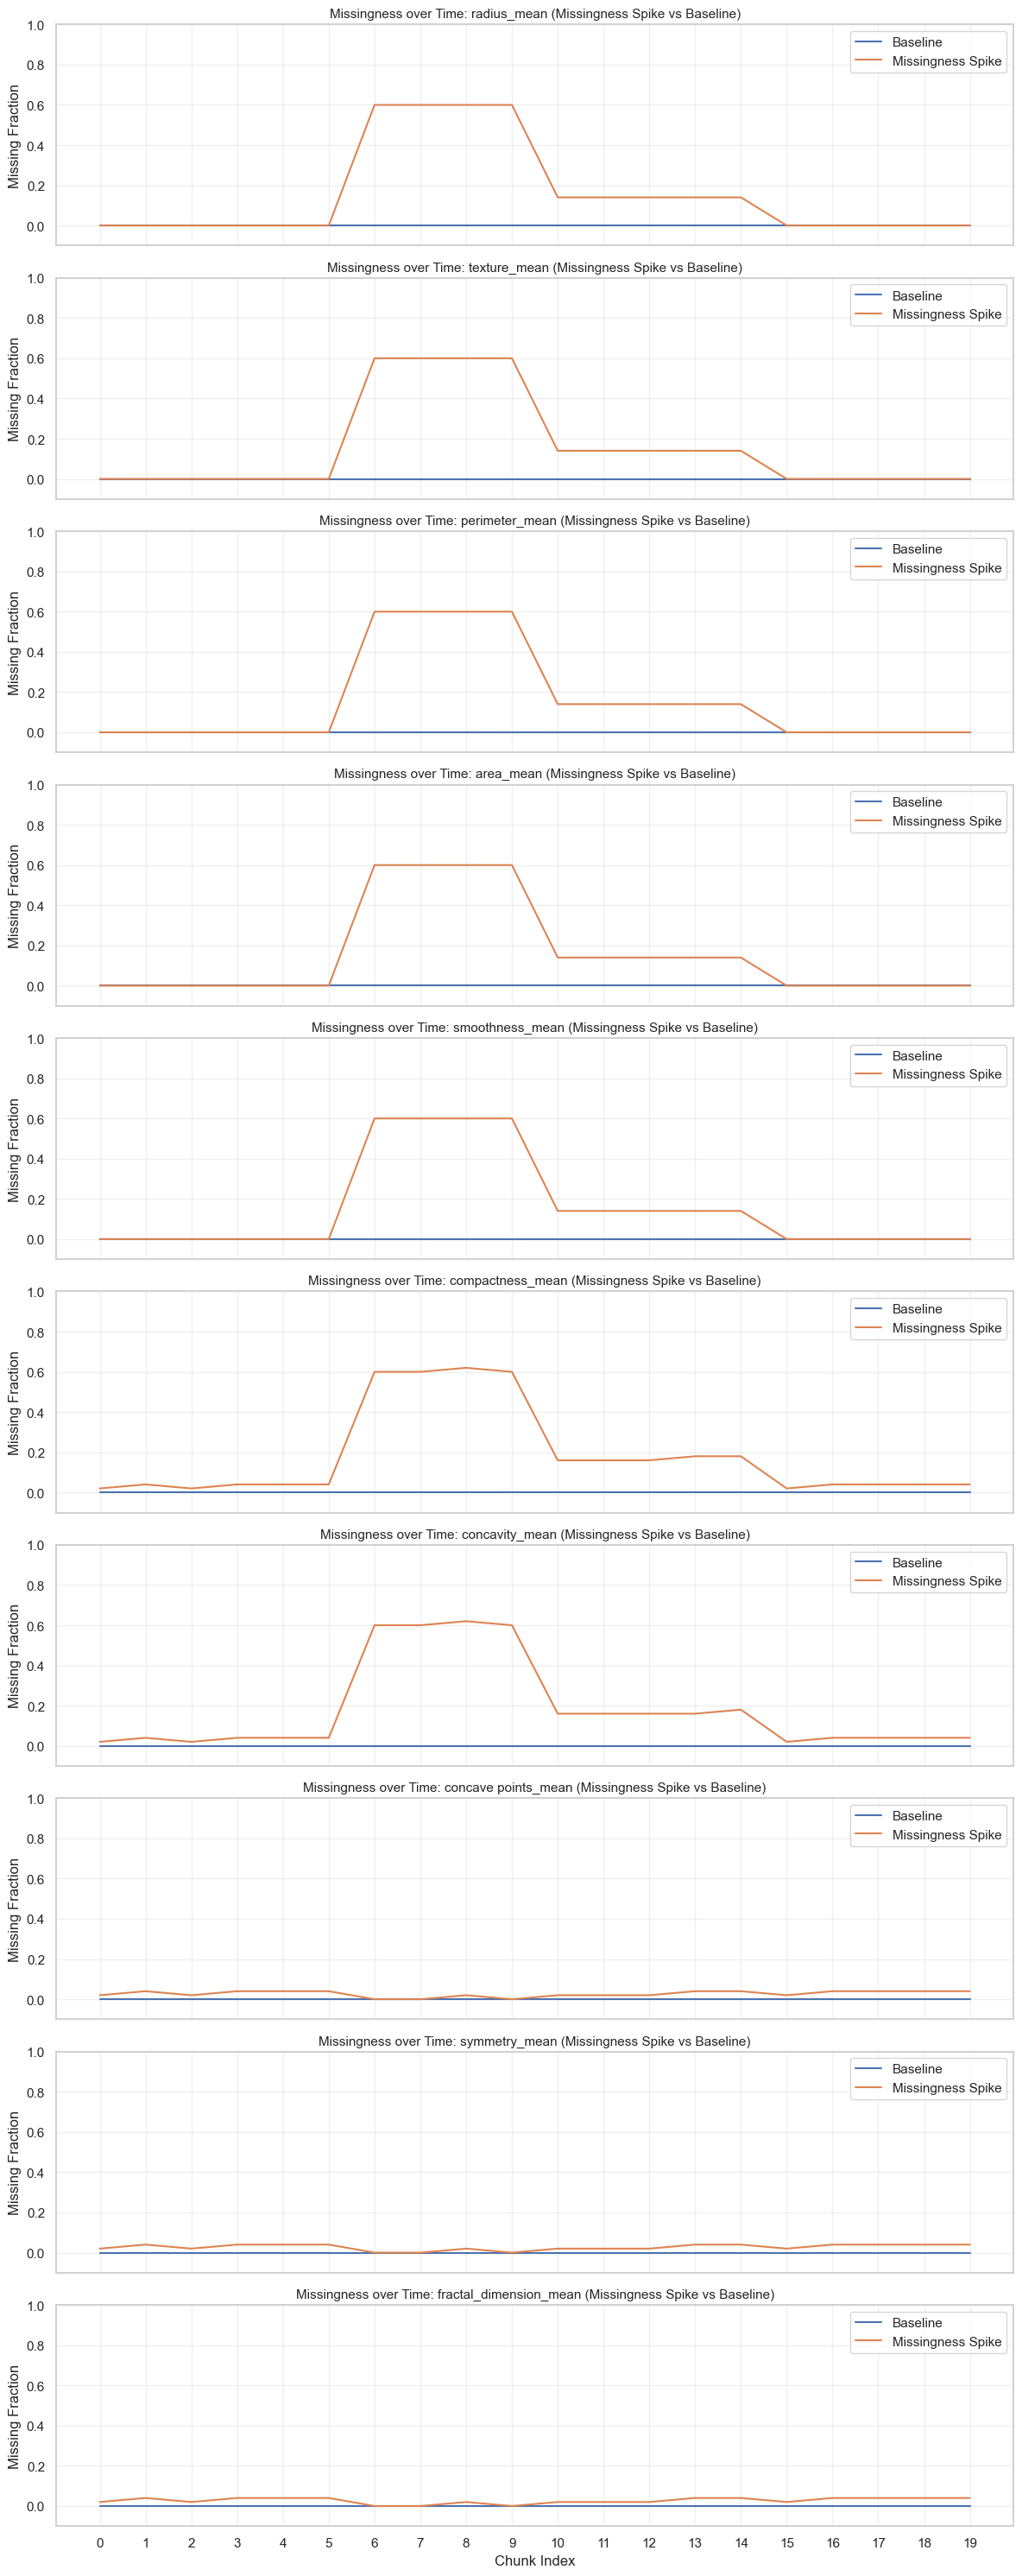

In [266]:
##################################
# Evaluating baseline missingness
# of the simulated missingness spike scenario
# and the baseline control
##################################
plot_missingness(p1, p5, MISSINGNESS_SPIKE_FEATURES, "Missingness Spike")


### 1.9.6 Simulated Seasonal Pattern<a class="anchor" id="1.9.6"></a>

In [267]:
##################################
# Defining the seasonal pattern-specific parameters
# for the post-model deployment scenario simulation
##################################
SEASONAL_PATTERN_FEATURES = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
SEASONAL_AMPLITUDE_SIGMAS = 0.5
SEASONAL_PERIOD = 10

In [268]:
##################################
# Defining a function for 
# simulating seasonal pattern
##################################
def simulate_P6_seasonal(df):
    # Creating a time-ordered synthetic stream of data chunks
    stream = make_stream_from_dataframe(df)
    # Computing standard deviations of seasonal features (used to scale amplitude)
    stds = df[SEASONAL_PATTERN_FEATURES].std()
    # Looping through each chunk (simulated time window)
    for c in range(N_CHUNKS):
        # Identifying the subset of rows belonging to the current chunk
        mask = stream['__chunk']==c
        # Applying sinusoidal seasonal pattern to each selected feature
        for f in SEASONAL_PATTERN_FEATURES:
            # Defining the amplitude of the seasonal signal (A = SEASONAL_AMPLITUDE_SIGMAS × feature std)
            amp = SEASONAL_AMPLITUDE_SIGMAS * stds[f]
            # Applying sinusoidal variation based on the chunk index (acting as a proxy for time)
            stream.loc[mask, f] += amp * np.sin(2 * np.pi * c / SEASONAL_PERIOD)
    # Returning the modified data stream with simulated seasonality
    return stream


In [269]:
##################################
# Simulating post-deployment data drift scenario 6 = seasonal pattern
##################################
p6 = simulate_P6_seasonal(breast_cancer_monitoring_baseline)


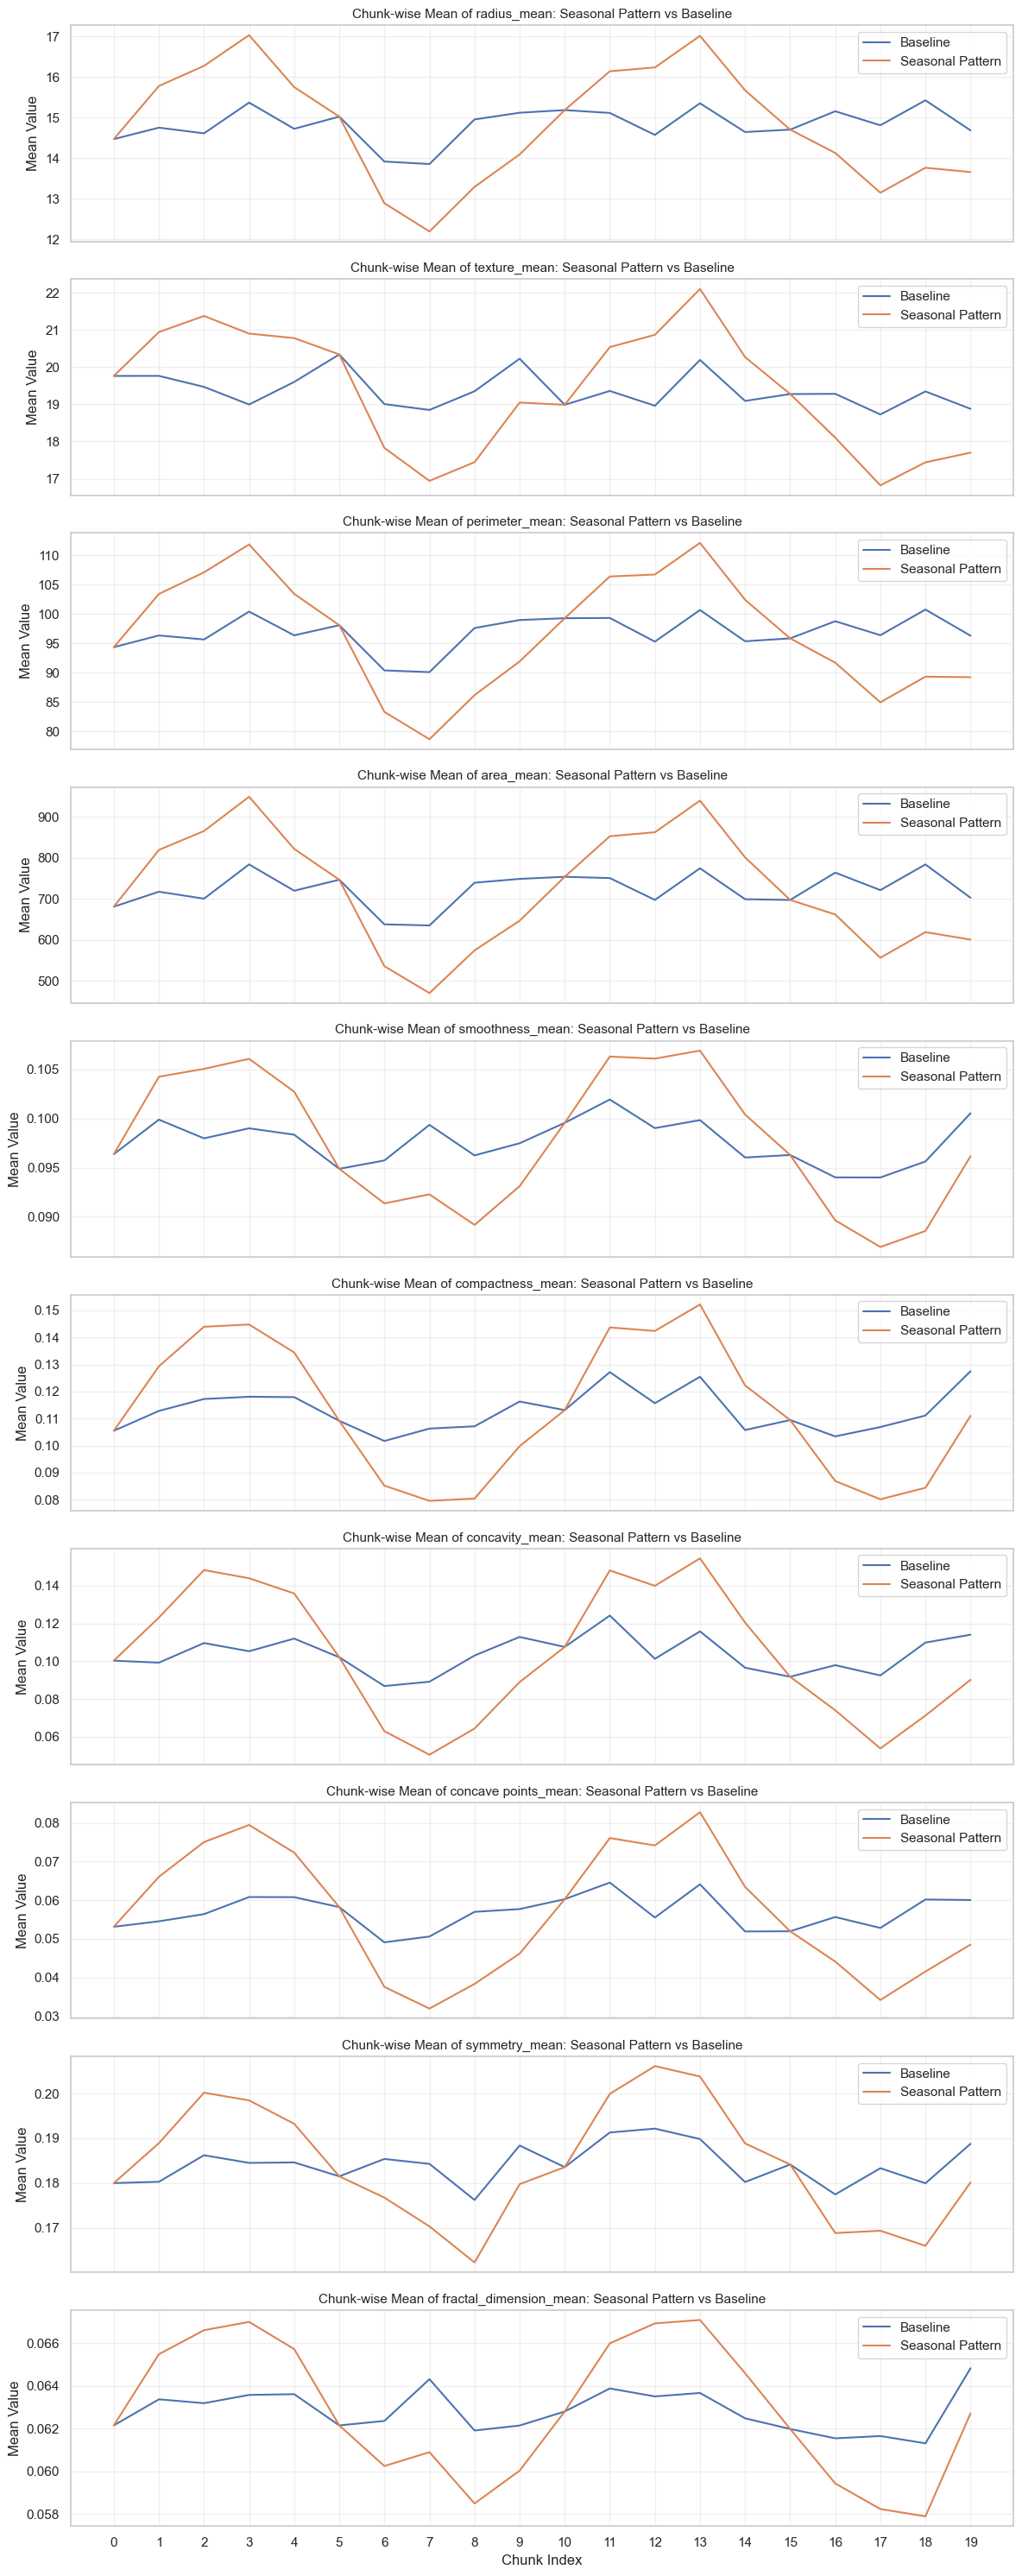

In [270]:
##################################
# Visualizing baseline feature variability
# of the simulated seasonal pattern scenario
# and the baseline control
##################################
plot_feature_mean_line(p1, p6, SEASONAL_PATTERN_FEATURES, "Seasonal Pattern")


## 1.10. Consolidated Findings <a class="anchor" id="1.10"></a>

# 2. Summary <a class="anchor" id="Summary"></a>

# 3. References <a class="anchor" id="References"></a>

* **[Book]** [Reliable Machine Learning](https://www.oreilly.com/library/view/reliable-machine-learning/9781098106218/) by Cathy Chen, Niall Richard Murphy, Kranti Parisa, D. Sculley and Todd Underwood
* **[Book]** [Designing Machine Learning Systems](https://www.oreilly.com/library/view/designing-machine-learning/9781098107956/) by Chip Huyen
* **[Book]** [Machine Learning Design Patterns](https://www.oreilly.com/library/view/machine-learning-design/9781098115777/) by Valliappa Lakshmanan, Sara Robinson and Michael Munn
* **[Book]** [Machine Learning Engineering](https://www.mlebook.com/wiki/doku.php) by Andriy Burkov
* **[Book]** [Engineering MLOps](https://www.oreilly.com/library/view/engineering-mlops/9781800562882/) by Emmanuel Raj
* **[Book]** [Introducing MLOps](https://www.oreilly.com/library/view/introducing-mlops/9781492083283/) by Mark Treveil, Nicolas Omont, Clément Stenac, Kenji Lefevre, Du Phan, Joachim Zentici, Adrien Lavoillotte, Makoto Miyazaki and Lynn Heidmann
* **[Book]** [Practical MLOps](https://www.oreilly.com/library/view/practical-mlops/9781098103002/) by Noah Gift and Alfredo Deza
* **[Book]** [Data Science on AWS](https://www.oreilly.com/library/view/data-science-on/9781492079385/) by Chris Fregly and Antje Barth
* **[Book]** [Ensemble Methods for Machine Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning) by Gautam Kunapuli
* **[Book]** [Applied Predictive Modeling](http://appliedpredictivemodeling.com/) by Max Kuhn and Kjell Johnson
* **[Book]** [An Introduction to Statistical Learning](https://www.statlearning.com/) by Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani
* **[Book]** [Ensemble Methods: Foundations and Algorithms](https://www.taylorfrancis.com/books/mono/10.1201/b12207/ensemble-methods-zhi-hua-zhou) by Zhi-Hua Zhou
* **[Book]** [Effective XGBoost: Optimizing, Tuning, Understanding, and Deploying Classification Models (Treading on Python)](https://www.taylorfrancis.com/books/mono/10.1201/b12207/ensemble-methods-zhi-hua-zhou) by Matt Harrison, Edward Krueger, Alex Rook, Ronald Legere and Bojan Tunguz
* **[Python Library API]** [nannyML](https://www.nannyml.com/) by NannyML Team
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Python Library API]** [sklearn.tree](https://scikit-learn.org/stable/modules/tree.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Python Library API]** [xgboost](https://xgboost.readthedocs.io/en/stable/python/index.html) by XGBoost Team
* **[Python Library API]** [lightgbm](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) by LightGBM Team
* **[Python Library API]** [catboost](https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier) by CatBoost Team
* **[Python Library API]** [StatsModels](https://www.statsmodels.org/stable/index.html) by StatsModels Team
* **[Python Library API]** [SciPy](https://scipy.org/) by SciPy Team
* **[Article]** [Comprehensive Comparison of ML Model Monitoring Tools: Evidently AI, Alibi Detect, NannyML, WhyLabs, and Fiddler AI](https://medium.com/@tanish.kandivlikar1412/comprehensive-comparison-of-ml-model-monitoring-tools-evidently-ai-alibi-detect-nannyml-a016d7dd8219) by Tanish Kandivlikar (Medium)
* **[Article]** [Monitoring AI in Production: Introduction to NannyML](https://adnankarol.medium.com/monitoring-ai-in-production-75f1260260cb) by Adnan Karol (Medium)
* **[Article]** [Data Drift Explainability: Interpretable Shift Detection with NannyML](https://towardsdatascience.com/data-drift-explainability-interpretable-shift-detection-with-nannyml-83421319d05f/) by Marco Cerliani (Towards Data Science)
* **[Article]** [An End-to-End ML Model Monitoring Workflow with NannyML in Python](https://www.datacamp.com/tutorial/model-monitoring-with-nannyml-in-python) by Bex Tuychiyev (DataCamp)
* **[Article]** [Detecting Concept Drift: Impact on Machine Learning Performance](https://www.nannyml.com/blog/concept-drift) by Michal Oleszak (NannyML.Com)
* **[Article]** [Estimating Model Performance Without Labels](https://www.nannyml.com/blog/machine-learning-performance-estimation) by Jakub Białek (NannyML.Com)
* **[Article]** [Monitoring Workflow for Machine Learning Systems](https://www.nannyml.com/blog/machine-learning-monitoring-workflow) by Santiago Víquez (NannyML.Com)
* **[Article]** [Don’t Let Yourself Be Fooled by Data Drift](https://www.nannyml.com/blog/when-data-drift-does-not-affect-performance-machine-learning-models) by Santiago Víquez (NannyML.Com)
* **[Article]** [Understanding Data Drift: Impact on Machine Learning Model Performance](https://www.nannyml.com/blog/types-of-data-shift) by Jakub Białek (NannyML.Com)
* **[Article]** [NannyML’s Guide to Data Quality and Covariate Shift](https://www.nannyml.com/blog/guide-data-quality-covariate-shift) by Magdalena Kowalczuk (NannyML.Com)
* **[Article]** [From Reactive to Proactive: Shift your ML Monitoring Approach](https://www.nannyml.com/blog/proactive-ml-monitoring-workflow) by Qiamo (Luca) Zheng (NannyML.Com)
* **[Article]** [How to Detect Under-Performing Segments in ML Models](https://www.nannyml.com/blog/detecting-underpeforming--segments-in-ml-models) by Kavita Rana (NannyML.Com)
* **[Article]** [Building Custom Metrics for Predictive Maintenance](https://www.nannyml.com/blog/custom-metrics-predictive-maintenance) by Kavita Rana(NannyML.Com)
* **[Article]** [3 Custom Metrics for Your Forecasting Models](https://www.nannyml.com/blog/custom-metrics-for-demand-forecasting-models) by Kavita Rana (NannyML.Com)
* **[Article]** [There's Data Drift, But Does It Matter?](https://www.nannyml.com/blog/data-drift-does-it-matter) by Santiago Víquez (NannyML.Com)
* **[Article]** [Monitoring Custom Metrics without Ground Truth](https://www.nannyml.com/blog/monitoring-custom-metrics-without-ground-truth) by Kavita Rana (NannyML.Com)
* **[Article]** [Which Multivariate Drift Detection Method Is Right for You: Comparing DRE and DC](https://www.nannyml.com/blog/dre-vs-dc) by Miles Weberman (NannyML.Com)
* **[Article]** [Prevent Failure of Product Defect Detection Models: A Post-Deployment Guide](https://www.nannyml.com/blog/prevent-failure-of-product-defect-detection-models) by Kavita Rana (NannyML.Com)
* **[Article]** [Common Pitfalls in Monitoring Default Prediction Models and How to Fix Them](https://www.nannyml.com/blog/monitor-default-prediction-models) by Miles Weberman (NannyML.Com)
* **[Article]** [Why Relying on Training Data for ML Monitoring Can Trick You](https://www.nannyml.com/blog/choose-reference-dataset) by Kavita Rana (NannyML.Com)
* **[Article]** [Estimating Model Performance Without Labels](https://www.nannyml.com/blog/machine-learning-performance-estimation) by Jakub Białek (NannyML.Com)
* **[Article]** [Using Concept Drift as a Model Retraining Trigger](https://www.nannyml.com/blog/concept-drift-retraining-trigger) by Taliya Weinstein (NannyML.Com)
* **[Article]** [Retraining is Not All You Need](https://www.nannyml.com/blog/retraining-is-not-all-you-need) by Miles Weberman (NannyML.Com)
* **[Article]** [A Comprehensive Guide to Univariate Drift Detection Methods](https://www.nannyml.com/blog/comprehensive-guide-univariate-methods) by Kavita Rana (NannyML.Com)
* **[Article]** [Stress-free Monitoring of Predictive Maintenance Models](https://www.nannyml.com/blog/monitor-predictive-maintenance-models-stress-free) by Kavita Rana (NannyML.Com)
* **[Article]** [Effective ML Monitoring: A Hands-on Example](https://www.nannyml.com/blog/ml-monitoring-workflow-hands-on) by Miles Weberman (NannyML.Com)
* **[Article]** [Don’t Drift Away with Your Data: Monitoring Data Drift from Setup to Cloud](https://www.nannyml.com/blog/monitoring-data-drift) by Taliya Weinstein (NannyML.Com)
* **[Article]** [Comparing Multivariate Drift Detection Algorithms on Real-World Data](https://www.nannyml.com/blog/tutorial-multivariate-drift-comparison) by Kavita Rana (NannyML.Com)
* **[Article]** [Detect Data Drift Using Domain Classifier in Python](https://www.nannyml.com/blog/data-drift-domain-classifier) by Miles Weberman (NannyML.Com)
* **[Article]** [Guide: How to evaluate if NannyML is the right monitoring tool for you](https://www.nannyml.com/blog/evaluate-nannyml) by Santiago Víquez (NannyML.Com)
* **[Article]** [How To Monitor ML models with NannyML SageMaker Algorithms](https://www.nannyml.com/blog/how-to-monitor-ml-models-with-nannyml-sagemaker-algorithms) by Wiljan Cools (NannyML.Com)
* **[Article]** [Tutorial: Monitoring Missing and Unseen values with NannyML](https://www.nannyml.com/blog/monitoring-missing-values-tutorial) by Santiago Víquez (NannyML.Com)
* **[Article]** [Monitoring Machine Learning Models: A Fundamental Practice for Data Scientists and Machine Learning Engineers](https://medium.com/data-science/monitoring-machine-learning-models-a-tried-and-true-cure-for-a-data-scientists-insomnia-c45b0979a878) by Saurav Pawar (Medium)
* **[Article]** [Failure Is Not an Option: How to Prevent Your ML Model From Degradation](https://medium.com/nannyml/failure-is-not-an-option-how-to-prevent-your-ml-model-from-degradation-nannyml-4473898af34a) by Maciej Balawejder (Medium)
* **[Article]** [Managing Data Drift and Data Distribution Shifts in the MLOps Lifecycle for Machine Learning Models](https://abhishek-reddy.medium.com/detecting-and-managing-data-distribution-shifts-in-the-mlops-lifecycle-for-machine-learning-models-1ea33ce84c3c) by Abhishek Reddy (Medium)
* **[Article]** [“You Can’t Predict the Errors of Your Model”… Or Can You?](https://medium.com/data-science/you-cant-predict-the-errors-of-your-model-or-can-you-1a2e4a1f38a0) by Samuele Mazzanti (Medium)
* **[Article]** [Understanding Concept Drift: A Simple Guide](https://medium.com/data-science/understanding-concept-drift-a-simple-guide-b2cf4e09deae) by Vitor Cerqueira (Medium)
* **[Article]** [Detecting Covariate Shift: A Guide to the Multivariate Approach](https://medium.com/data-science/detecting-covariate-shift-a-guide-to-the-multivariate-approach-c099bd1891b9) by Michał Oleszak (Medium)
* **[Article]** [Data Drift vs. Concept Drift: Differences and How to Detect and Address Them](https://dataheroes.ai/blog/data-drift-vs-concept-drift/) by DataHeroes Team (DataHeroes.AI)
* **[Article]** [An Introduction to Machine Learning Engineering for Production /MLOps — Concept and Data Drifts](https://medium.com/data-science/an-introduction-to-machine-learning-engineering-for-production-part-1-2247bbca8a61) by Praatibh Surana (Medium)
* **[Article]** [Concept Drift and Model Decay in Machine Learning](https://medium.com/data-science/concept-drift-and-model-decay-in-machine-learning-a98a809ea8d4) by Ashok Chilakapati (Medium)
* **[Article]** [Data Drift: Types of Data Drift](https://medium.com/data-science/data-drift-part-1-types-of-data-drift-16b3eb175006) by Numal Jayawardena (Medium)
* **[Article]** [Monitoring Machine Learning models](https://medium.com/data-science/monitoring-machine-learning-models-62d5833c7ecc) by Jacques Verre (Medium)
* **[Article]** [Data drift: It Can Come At You From Anywhere](https://medium.com/data-science/data-drift-it-can-come-at-you-from-anywhere-b78eb186855) by Tirthajyoti Sarkar (Medium)
* **[Article]** [Drift in Machine Learning](https://medium.com/data-science/drift-in-machine-learning-e49df46803a) by Piotr (Peter) Mardziel (Medium)
* **[Article]** [Understanding Dataset Shift](https://medium.com/data-science/understanding-dataset-shift-f2a5a262a766) by Matthew Stewart (Medium)
* **[Article]** [Calculating Data Drift in Machine Learning using Python](https://medium.com/data-science/calculating-data-drift-in-machine-learning-53676ff5646b) by Vatsal (Medium)
* **[Article]** [91% of ML Models Degrade in Time](https://medium.com/data-science/91-of-ml-models-degrade-in-time-cfd467905615) by Santiago Víquez (Medium)
* **[Article]** [Model Drift in Machine Learning](https://medium.com/data-science/model-drift-in-machine-learning-8023e3d08217) by Kurtis Pykes (Medium)
* **[Article]** [Production Machine Learning Monitoring: Outliers, Drift, Explainers & Statistical Performance](https://medium.com/data-science/production-machine-learning-monitoring-outliers-drift-explainers-statistical-performance-d9b1d02ac158) by Alejandro Saucedo (Medium)
* **[Article]** [How to Detect Model Drift in MLOps Monitoring](https://medium.com/data-science/how-to-detect-model-drift-in-mlops-monitoring-7a039c22eaf9) by Amit Paka (Medium)
* **[Article]** [“My data drifted. What’s next?” How to handle ML model drift in production.](https://medium.com/data-science/my-data-drifted-whats-next-how-to-handle-ml-model-drift-in-production-78719ef007b1) by Elena Samuylova (Medium)
* **[Article]** [Machine Learning Model Drift](https://medium.com/data-science/machine-learning-model-drift-9cc43ad530d6) by Sophia Yang (Medium)
* **[Article]** [Estimating the Performance of an ML Model in the Absence of Ground Truth](https://medium.com/data-science/estimating-the-performance-of-an-ml-model-in-the-absence-of-ground-truth-cc87dbf6e57) by Eryk Lewinson (Medium)
* **[Article]** [Ensemble: Boosting, Bagging, and Stacking Machine Learning](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [Stacking Machine Learning: Everything You Need to Know](https://www.machinelearningpro.org/stacking-machine-learning/) by Ada Parker (MachineLearningPro.Org)
* **[Article]** [Ensemble Learning: Bagging, Boosting and Stacking](https://duchesnay.github.io/pystatsml/machine_learning/ensemble_learning.html) by Edouard Duchesnay, Tommy Lofstedt and Feki Younes (Duchesnay.GitHub.IO)
* **[Article]** [Stack Machine Learning Models: Get Better Results](https://developer.ibm.com/articles/stack-machine-learning-models-get-better-results/) by Casper Hansen (Developer.IBM.Com)
* **[Article]** [GradientBoosting vs AdaBoost vs XGBoost vs CatBoost vs LightGBM](https://www.geeksforgeeks.org/gradientboosting-vs-adaboost-vs-xgboost-vs-catboost-vs-lightgbm/) by Geeks for Geeks Team (GeeksForGeeks.Org)
* **[Article]** [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [The Ultimate Guide to AdaBoost Algorithm | What is AdaBoost Algorithm?](https://www.mygreatlearning.com/blog/adaboost-algorithm/) by Ashish Kumar (MyGreatLearning.Com)
* **[Article]** [A Gentle Introduction to Ensemble Learning Algorithms](https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [Ensemble Methods: Elegant Techniques to Produce Improved Machine Learning Results](https://www.toptal.com/machine-learning/ensemble-methods-machine-learning) by Necati Demir (Toptal.Com)
* **[Article]** [The Essential Guide to Ensemble Learning](https://www.v7labs.com/blog/ensemble-learning-guide) by Rohit Kundu (V7Labs.Com)
* **[Article]** [Develop an Intuition for How Ensemble Learning Works](https://machinelearningmastery.com/how-ensemble-learning-works/) by by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Mastering Ensemble Techniques in Machine Learning: Bagging, Boosting, Bayes Optimal Classifier, and Stacking](https://rahuljain788.medium.com/mastering-ensemble-techniques-in-machine-learning-bagging-boosting-bayes-optimal-classifier-and-c1dd8052f53f) by Rahul Jain (Medium)
* **[Article]** [Ensemble Learning: Bagging, Boosting, Stacking](https://ai.plainenglish.io/ml-tutorial-19-ensemble-learning-bagging-boosting-stacking-5a926db20ec5) by Ayşe Kübra Kuyucu (Medium)
* **[Article]** [Ensemble: Boosting, Bagging, and Stacking Machine Learning](https://medium.com/@senozanAleyna/ensemble-boosting-bagging-and-stacking-machine-learning-6a09c31breast_cancer778) by Aleyna Şenozan (Medium)
* **[Article]** [Boosting, Stacking, and Bagging for Ensemble Models for Time Series Analysis with Python](https://medium.com/@kylejones_47003/boosting-stacking-and-bagging-for-ensemble-models-for-time-series-analysis-with-python-d74ab9026782) by Kyle Jones (Medium)
* **[Article]** [Different types of Ensemble Techniques — Bagging, Boosting, Stacking, Voting, Blending](https://medium.com/@abhishekjainindore24/different-types-of-ensemble-techniques-bagging-boosting-stacking-voting-blending-b04355a03c93) by Abhishek Jain (Medium)
* **[Article]** [Mastering Ensemble Techniques in Machine Learning: Bagging, Boosting, Bayes Optimal Classifier, and Stacking](https://rahuljain788.medium.com/mastering-ensemble-techniques-in-machine-learning-bagging-boosting-bayes-optimal-classifier-and-c1dd8052f53f) by Rahul Jain (Medium)
* **[Article]** [Understanding Ensemble Methods: Bagging, Boosting, and Stacking](https://divyabhagat.medium.com/understanding-ensemble-methods-bagging-boosting-and-stacking-7683c493ac19) by Divya bhagat (Medium)
* **[Video Tutorial]** [Concept Drift Detection with NannyML | Webinar](https://www.youtube.com/watch?v=kBTty6JTW9Q) by NannyML (YouTube)
* **[Video Tutorial]** [Fooled by Data Drift: How to Monitor ML Without False Positives](https://www.youtube.com/watch?v=71vlPelFVs0) by NannyML (YouTube)
* **[Video Tutorial]** [Monitoring Custom Metrics Without Access to Targets](https://www.youtube.com/watch?v=tqPoaA0STHs) by NannyML (YouTube)
* **[Video Tutorial]** [Analyzing Your Model's Performance in Production](https://www.youtube.com/watch?v=qDufIIduw5M) by NannyML (YouTube)
* **[Video Tutorial]** [How to Monitor Predictive Maintenance Models | Webinar Replay](https://www.youtube.com/watch?v=VuEYjEKUkWA) by NannyML (YouTube)
* **[Video Tutorial]** [Machine Learning Monitoring Workflow [Webinar]](https://www.youtube.com/watch?v=aXyc9TSl_u8) by NannyML (YouTube)
* **[Video Tutorial]** [Monitoring Machine Learning Models on AWS | Webinar](https://www.youtube.com/watch?v=82NAJG8m5r0) by NannyML (YouTube)
* **[Video Tutorial]** [Root Cause Analysis for ML Model Failure](https://www.youtube.com/watch?v=f-15Ri8MFAM) by NannyML (YouTube)
* **[Video Tutorial]** [Quantifying the Impact of Data Drift on Machine Learning Model Performance | Webinar](https://www.youtube.com/watch?v=pZJQCxt0aus) by NannyML (YouTube)
* **[Video Tutorial]** [How to Detect Drift and Resolve Issues in Your Machine Learning Models?](https://www.youtube.com/watch?v=zkWDb2URdIQ) by NannyML (YouTube)
* **[Video Tutorial]** [Notebooks to Containers: Setting up Continuous (ML) Model Monitoring in Production](https://www.youtube.com/watch?v=00MJ-gvpRkI) by NannyML (YouTube)
* **[Video Tutorial]** [Performance Estimation using NannyML | Tutorial in Jupyter Notebook](https://www.youtube.com/watch?v=fo0ejdQFcT0) by NannyML (YouTube)
* **[Video Tutorial]** [What Is NannyML? Introducing Our Open Source Python Library](https://www.youtube.com/watch?v=HgZm2JdE5Fo) by NannyML (YouTube)
* **[Video Tutorial]** [How to Automatically Retrain Your Models with Concept Drift Detection?](https://www.youtube.com/watch?v=QoymE--4sPM) by NannyML (YouTube)
* **[Video Tutorial]** [How to Use NannyML? Two Modes of Running Our Library](https://www.youtube.com/watch?v=ATKJXo6lTls) by NannyML (YouTube)
* **[Video Tutorial]** [How to Integrate NannyML in Production? | Tutorial](https://www.youtube.com/watch?v=zdiM2ZFD__w) by NannyML (YouTube)
* **[Video Tutorial]** [Bringing Your Machine Learning Model to Production | Overview](https://www.youtube.com/watch?v=XH_4X6oo8hI) by NannyML (YouTube)
* **[Video Tutorial]** [Notebooks to Containers: Setting Up Continuous (ML) Model Monitoring in Production](https://www.youtube.com/watch?v=00MJ-gvpRkI) by NannyML (YouTube)
* **[Video Tutorial]** [ML Performance without Labels: Comparing Performance Estimation Methods (Webinar Replay)](https://www.youtube.com/watch?v=CKCSC9Srgnc) by NannyML (YouTube)
* **[Course]** [DataCamp Python Data Analyst Certificate](https://app.datacamp.com/learn/career-tracks/data-analyst-with-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Associate Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/associate-data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Machine Learning Engineer Certificate](https://app.datacamp.com/learn/career-tracks/machine-learning-engineer) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Machine Learning Scientist Certificate](https://app.datacamp.com/learn/career-tracks/machine-learning-scientist-with-python) by DataCamp Team (DataCamp)
* **[Course]** [IBM Data Analyst Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-analyst) by IBM Team (Coursera)
* **[Course]** [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science) by IBM Team (Coursera)
* **[Course]** [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning) by IBM Team (Coursera)